# IMPORT LIBRARIES

In [126]:
import json 
from pathlib import Path

import pandas as pd
import numpy as np
import networkx as nx

# EDA

## Data Loading

In [127]:
DATA_PATH = Path("/Users/daviderizzello/Documents/Uni/VisualAnalytics/Progetto/Data/MC2/mc2.json")

In [128]:
with DATA_PATH.open() as f:
    raw_graph = json.load(f)


## Inspection

In [129]:
raw_graph.keys()

dict_keys(['directed', 'multigraph', 'graph', 'nodes', 'links'])

In [130]:
raw_graph["links"][:5]

[{'type': 'Event.TransportEvent.TransponderPing',
  'time': '2035-09-16T04:06:48.185987',
  'dwell': 115074.790577,
  '_last_edited_by': 'Olokun Daramola',
  '_date_added': '2035-09-16T00:59:46.300100',
  '_last_edited_date': '2035-09-16T00:59:46.300100',
  '_raw_source': 'Oceanus Vessel Locator System',
  '_algorithm': 'OVLS-Catch&Hook',
  'source': 'City of Haacklee',
  'target': 'perchplundererbc0',
  'key': 0},
 {'type': 'Event.TransportEvent.TransponderPing',
  'time': '2035-09-20T05:21:33.678120',
  'dwell': 412706.32188,
  '_last_edited_by': 'Melinda Manning',
  '_date_added': '2035-09-22T02:37:37.400986',
  '_last_edited_date': '2035-09-22T02:37:37.400986',
  '_raw_source': 'Oceanus Vessel Locator System',
  '_algorithm': 'OVLS-Catch&Hook',
  'source': 'City of Haacklee',
  'target': 'perchplundererbc0',
  'key': 1},
 {'type': 'Event.TransportEvent.TransponderPing',
  'time': '2035-09-28T04:31:47.118191',
  'dwell': 286092.881809,
  '_last_edited_by': 'Olokun Daramola',
  '_dat

In [131]:
raw_graph["nodes"][:5]

[{'type': 'Entity.Commodity.Fish',
  '_last_edited_by': 'Clepper Jessen',
  '_date_added': '2033-09-04T00:00:00',
  '_last_edited_date': '2035-01-25T00:00:00',
  '_raw_source': '',
  '_algorithm': '',
  'name': 'Cod/Gadus n.specificatae',
  'id': 'gadusnspecificatae4ba'},
 {'type': 'Entity.Commodity.Fish',
  '_last_edited_by': 'Clepper Jessen',
  '_date_added': '2034-01-21T00:00:00',
  '_last_edited_date': '2035-01-04T00:00:00',
  '_raw_source': '',
  '_algorithm': '',
  'name': 'Birdseye/Pisces frigus',
  'id': 'piscesfrigus900'},
 {'type': 'Entity.Commodity.Fish',
  '_last_edited_by': 'Haenyeo Hyun-Ki',
  '_date_added': '2033-06-22T00:00:00',
  '_last_edited_date': '2035-01-14T00:00:00',
  '_raw_source': '',
  '_algorithm': '',
  'name': 'Sockfish/Pisces foetida',
  'id': 'piscesfoetidaae7'},
 {'type': 'Entity.Commodity.Fish',
  '_last_edited_by': 'Haenyeo Hyun-Ki',
  '_date_added': '2033-11-24T00:00:00',
  '_last_edited_date': '2035-01-14T00:00:00',
  '_raw_source': '',
  '_algorith

In [132]:
raw_graph

{'directed': True,
 'multigraph': True,
 'graph': {},
 'nodes': [{'type': 'Entity.Commodity.Fish',
   '_last_edited_by': 'Clepper Jessen',
   '_date_added': '2033-09-04T00:00:00',
   '_last_edited_date': '2035-01-25T00:00:00',
   '_raw_source': '',
   '_algorithm': '',
   'name': 'Cod/Gadus n.specificatae',
   'id': 'gadusnspecificatae4ba'},
  {'type': 'Entity.Commodity.Fish',
   '_last_edited_by': 'Clepper Jessen',
   '_date_added': '2034-01-21T00:00:00',
   '_last_edited_date': '2035-01-04T00:00:00',
   '_raw_source': '',
   '_algorithm': '',
   'name': 'Birdseye/Pisces frigus',
   'id': 'piscesfrigus900'},
  {'type': 'Entity.Commodity.Fish',
   '_last_edited_by': 'Haenyeo Hyun-Ki',
   '_date_added': '2033-06-22T00:00:00',
   '_last_edited_date': '2035-01-14T00:00:00',
   '_raw_source': '',
   '_algorithm': '',
   'name': 'Sockfish/Pisces foetida',
   'id': 'piscesfoetidaae7'},
  {'type': 'Entity.Commodity.Fish',
   '_last_edited_by': 'Haenyeo Hyun-Ki',
   '_date_added': '2033-11-24T

In [133]:
nodes_df = pd.DataFrame(raw_graph["nodes"])
links_df = pd.DataFrame(raw_graph["links"])

In [134]:
print(nodes_df["type"].value_counts())
print(links_df["type"].value_counts())

type
Entity.Document.DeliveryReport    5307
Entity.Vessel.FishingVessel        178
Entity.Vessel.CargoVessel          100
Entity.Location.Point               12
Entity.Commodity.Fish               10
Entity.Location.City                 6
Entity.Vessel.Tour                   6
Entity.Location.Region               6
Entity.Vessel.Other                  5
Entity.Vessel.Ferry.Passenger        3
Entity.Vessel.Ferry.Cargo            2
Entity.Vessel.Research               2
Name: count, dtype: int64
type
Event.TransportEvent.TransponderPing    258542
Event.Transaction                        10614
Event.HarborReport                        2487
Name: count, dtype: int64


In [135]:
nodes_df[nodes_df["type"].str.contains("Delivery", na=False)].head()

type  _last_edited_by _date_added  \
15  Entity.Document.DeliveryReport   Junior Shurdlu  2035-11-04   
16  Entity.Document.DeliveryReport     Harvey Janus  2035-08-17   
17  Entity.Document.DeliveryReport   Junior Shurdlu  2035-08-21   
18  Entity.Document.DeliveryReport  Melinda Manning  2035-11-07   
19  Entity.Document.DeliveryReport     Harvey Janus  2035-08-24   

   _last_edited_date               _raw_source                   _algorithm  \
15        2035-11-06  Tuna Shelf/egress report  CatchMate ('arrrr' edition)   
16        2035-08-19  Tuna Shelf/egress report  CatchMate ('arrrr' edition)   
17        2035-08-23  Tuna Shelf/egress report  CatchMate ('arrrr' edition)   
18        2035-11-09  Tuna Shelf/egress report  CatchMate ('arrrr' edition)   
19        2035-08-25  Tuna Shelf/egress report  CatchMate ('arrrr' edition)   

   name                   id Name Description Activities kind  qty_tons  \
15  NaN  cargo_2035_2394778c  NaN         NaN        NaN  NaN    24.375   
16  NaN  cargo_2035_23956ba0  NaN         NaN        NaN  NaN    18.125   
17  NaN  cargo_2035_23957cfd  NaN         NaN        NaN  NaN    20.625   
18  NaN  cargo_2035_23958501  NaN         NaN        NaN  NaN    13.125   
19  NaN  cargo_2035_23959ab6  NaN         NaN        NaN  NaN    13.125   

          date flag_country company  tonnage  length_overall style  \
15  2035-11-03          NaN     NaN      NaN             NaN   NaN   
16  2035-08-16          NaN     NaN      NaN             NaN   NaN   
17  2035-08-20          NaN     NaN      NaN             NaN   NaN   
18  2035-11-07          NaN     NaN      NaN             NaN   NaN   
19  2035-08-24          NaN     NaN      NaN             NaN   NaN   

   fish_species_present  
15                  NaN  
16                  NaN  
17                  NaN  
18                  NaN  
19                  NaN

In [136]:
nodes_df[nodes_df["type"].str.contains("CargoVessel", na=False)].head()

type  _last_edited_by _date_added  \
5335  Entity.Vessel.CargoVessel   Junior Shurdlu  2035-01-01   
5338  Entity.Vessel.CargoVessel  Melinda Manning  2035-02-01   
5359  Entity.Vessel.CargoVessel  Olokun Daramola  2034-10-26   
5364  Entity.Vessel.CargoVessel     Harvey Janus  2035-02-20   
5366  Entity.Vessel.CargoVessel  Olokun Daramola  2035-01-26   

     _last_edited_date                    _raw_source       _algorithm name  \
5335        2035-01-16  Oceanus Vessel Locator System  OVLS-Catch&Hook  NaN   
5338        2035-02-17  Oceanus Vessel Locator System  OVLS-Catch&Hook  NaN   
5359        2034-11-07  Oceanus Vessel Locator System  OVLS-Catch&Hook  NaN   
5364        2035-03-03  Oceanus Vessel Locator System  OVLS-Catch&Hook  NaN   
5366        2035-02-15  Oceanus Vessel Locator System  OVLS-Catch&Hook  NaN   

                        id                Name Description Activities kind  \
5335       seawaysavvy9847      Seaway Savvy 9         NaN        NaN  NaN   
5338  maritimemaelstromc5d  Maritime Maelstrom         NaN        NaN  NaN   
5359      oceanicoracle9da      Oceanic Oracle         NaN        NaN  NaN   
5364      harborharmonyfc9      Harbor Harmony         NaN        NaN  NaN   
5366      nauticalnomada36      Nautical Nomad         NaN        NaN  NaN   

      qty_tons date flag_country                           company  tonnage  \
5335       NaN  NaN   Osterivaro                               NaN   2100.0   
5338       NaN  NaN     Helvoris                               NaN  76300.0   
5359       NaN  NaN     Ariuzima                               NaN   2300.0   
5364       NaN  NaN    Alverovia                               NaN  71000.0   
5366       NaN  NaN   Oceanterra  Saltwater Sisters Company Marine  14300.0   

      length_overall style fish_species_present  
5335            90.0   NaN                  NaN  
5338           230.0   NaN                  NaN  
5359            90.0   NaN                  NaN  
5364           150.0   NaN                  NaN  
5366            90.0   NaN                  NaN

In [137]:
nodes_df[nodes_df["type"].str.contains("Tour", na=False)].head()

type _last_edited_by _date_added _last_edited_date  \
5415  Entity.Vessel.Tour  Junior Shurdlu  2034-07-01        2034-11-09   
5416  Entity.Vessel.Tour  Junior Shurdlu  2034-11-28        2035-04-06   
5418  Entity.Vessel.Tour  Clepper Jessen  2034-10-01        2035-02-19   
5455  Entity.Vessel.Tour  Clepper Jessen  2033-09-20        2033-11-11   
5485  Entity.Vessel.Tour  Clepper Jessen  2034-07-27        2034-10-11   

                        _raw_source       _algorithm name                  id  \
5415  Oceanus Vessel Locator System  OVLS-Catch&Hook  NaN      himarkroyal032   
5416  Oceanus Vessel Locator System  OVLS-Catch&Hook  NaN            mrray9c4   
5418  Oceanus Vessel Locator System  OVLS-Catch&Hook  NaN         manatee17ea   
5455  Oceanus Vessel Locator System  OVLS-Catch&Hook  NaN        clownfishe3d   
5485  Oceanus Vessel Locator System  OVLS-Catch&Hook  NaN  spiritofoceanus404   

                   Name Description Activities kind  qty_tons date  \
5415       Himark Royal         NaN        NaN  NaN       NaN  NaN   
5416            Mr. Ray         NaN        NaN  NaN       NaN  NaN   
5418          Manatee 1         NaN        NaN  NaN       NaN  NaN   
5455         Clown Fish         NaN        NaN  NaN       NaN  NaN   
5485  Spirit of Oceanus         NaN        NaN  NaN       NaN  NaN   

     flag_country company  tonnage  length_overall      style  \
5415      Oceanus     NaN      NaN             NaN        NaN   
5416      Oceanus     NaN      NaN             NaN  hydrofoil   
5418      Oceanus     NaN      NaN             NaN        NaN   
5455      Oceanus     NaN      NaN             NaN  hydrofoil   
5485      Oceanus     NaN      NaN             NaN        NaN   

     fish_species_present  
5415                  NaN  
5416                  NaN  
5418                  NaN  
5455                  NaN  
5485                  NaN

In [138]:
nodes_df[nodes_df["type"].str.contains("Ferry.Cargo", na=False)].head()

type   _last_edited_by _date_added  \
5341  Entity.Vessel.Ferry.Cargo  juniorshurdlu794  2033-11-22   
5360  Entity.Vessel.Ferry.Cargo  juniorshurdlu794  2033-12-03   

     _last_edited_date                    _raw_source       _algorithm name  \
5341        2034-04-20  Oceanus Vessel Locator System  OVLS-Catch&Hook  NaN   
5360        2034-01-04  Oceanus Vessel Locator System  OVLS-Catch&Hook  NaN   

             id    Name Description Activities kind  qty_tons date  \
5341  sturdyd7f  Sturdy         NaN        NaN  NaN       NaN  NaN   
5360   stout369   Stout         NaN        NaN  NaN       NaN  NaN   

     flag_country company  tonnage  length_overall style fish_species_present  
5341      Oceanus     NaN      NaN             NaN   NaN                  NaN  
5360      Oceanus     NaN      NaN             NaN   NaN                  NaN

In [139]:
nodes_df[nodes_df["type"].str.contains("Vessel.Other", na=False)].head()

type   _last_edited_by _date_added _last_edited_date  \
5324  Entity.Vessel.Other  juniorshurdlu794  2034-07-30        2034-08-16   
5409  Entity.Vessel.Other  juniorshurdlu794  2034-07-30        2034-11-06   
5419  Entity.Vessel.Other  juniorshurdlu794  2035-01-03        2035-05-18   
5459  Entity.Vessel.Other  juniorshurdlu794  2033-07-21        2033-08-20   
5539  Entity.Vessel.Other  juniorshurdlu794  2034-07-03        2034-11-30   

                        _raw_source       _algorithm name             id  \
5324  Oceanus Vessel Locator System  OVLS-Catch&Hook  NaN    webigailba7   
5409  Oceanus Vessel Locator System  OVLS-Catch&Hook  NaN       dewie961   
5419  Oceanus Vessel Locator System  OVLS-Catch&Hook  NaN       hewey2ef   
5459  Oceanus Vessel Locator System  OVLS-Catch&Hook  NaN  louietheii3e0   
5539  Oceanus Vessel Locator System  OVLS-Catch&Hook  NaN       louieda4   

              Name Description Activities kind  qty_tons date flag_country  \
5324      Webigail         NaN        NaN  NaN       NaN  NaN      Oceanus   
5409         Dewie         NaN        NaN  NaN       NaN  NaN      Oceanus   
5419         Hewey         NaN        NaN  NaN       NaN  NaN      Oceanus   
5459  Louie the II         NaN        NaN  NaN       NaN  NaN      Oceanus   
5539         Louie         NaN        NaN  NaN       NaN  NaN      Oceanus   

     company  tonnage  length_overall style fish_species_present  
5324     NaN      NaN            50.0   NaN                  NaN  
5409     NaN      NaN            75.0   NaN                  NaN  
5419     NaN      NaN            75.0   NaN                  NaN  
5459     NaN      NaN            75.0   NaN                  NaN  
5539     NaN      NaN            75.0   NaN                  NaN

In [140]:
nodes_df[nodes_df["type"].str.contains("Ferry.Pass", na=False)].head()

type   _last_edited_by _date_added  \
5331  Entity.Vessel.Ferry.Passenger  juniorshurdlu794  2034-04-17   
5451  Entity.Vessel.Ferry.Passenger  juniorshurdlu794  2033-08-12   
5483  Entity.Vessel.Ferry.Passenger  juniorshurdlu794  2034-03-02   

     _last_edited_date                    _raw_source       _algorithm name  \
5331        2034-05-19  Oceanus Vessel Locator System  OVLS-Catch&Hook  NaN   
5451        2033-10-09  Oceanus Vessel Locator System  OVLS-Catch&Hook  NaN   
5483        2034-06-26  Oceanus Vessel Locator System  OVLS-Catch&Hook  NaN   

                  id         Name Description Activities kind  qty_tons date  \
5331    venerable89c    Venerable         NaN        NaN  NaN       NaN  NaN   
5451    honorablea6e    Honorable         NaN        NaN  NaN       NaN  NaN   
5483  respectable717  Respectable         NaN        NaN  NaN       NaN  NaN   

     flag_country company  tonnage  length_overall style fish_species_present  
5331      Oceanus     NaN      NaN             NaN   NaN                  NaN  
5451      Oceanus     NaN      NaN             NaN   NaN                  NaN  
5483      Oceanus     NaN      NaN             NaN   NaN                  NaN

In [141]:
links_df[links_df["type"]=="Event.HarborReport"]

type time  dwell  _last_edited_by _date_added  \
33288  Event.HarborReport  NaN    NaN   Junior Shurdlu  2035-09-21   
33289  Event.HarborReport  NaN    NaN  Haenyeo Hyun-Ki  2035-08-20   
33290  Event.HarborReport  NaN    NaN   Junior Shurdlu  2035-09-18   
33291  Event.HarborReport  NaN    NaN  Haenyeo Hyun-Ki  2035-08-16   
33292  Event.HarborReport  NaN    NaN  Haenyeo Hyun-Ki  2035-09-26   
...                   ...  ...    ...              ...         ...   
37914  Event.HarborReport  NaN    NaN   Junior Shurdlu  2035-04-16   
37915  Event.HarborReport  NaN    NaN  Haenyeo Hyun-Ki  2035-04-06   
37916  Event.HarborReport  NaN    NaN   Junior Shurdlu  2035-07-27   
37917  Event.HarborReport  NaN    NaN  Haenyeo Hyun-Ki  2035-07-29   
37918  Event.HarborReport  NaN    NaN  Haenyeo Hyun-Ki  2035-05-29   

      _last_edited_date              _raw_source               _algorithm  \
33288        2035-09-28  Haacklee harbor reports  HarborReportMaster 3.11   
33289        2035-08-22  Haacklee harbor reports  HarborReportMaster 3.11   
33290        2035-09-24  Haacklee harbor reports  HarborReportMaster 3.11   
33291        2035-08-23    Himark harbor reports  HarborReportMaster 3.11   
33292        2035-10-02    Himark harbor reports  HarborReportMaster 3.11   
...                 ...                      ...                      ...   
37914        2035-04-25    Lomark harbor reports  HarborReportMaster 3.11   
37915        2035-04-12    Lomark harbor reports  HarborReportMaster 3.11   
37916        2035-07-31  Haacklee harbor reports  HarborReportMaster 3.11   
37917        2035-08-02  Haacklee harbor reports  HarborReportMaster 3.11   
37918        2035-06-05  Haacklee harbor reports  HarborReportMaster 3.11   

                     source            target  key        date  \
33288       wavewranglerc2d  City of Haacklee    0  2035-09-14   
33289       wavewranglerc2d  City of Haacklee    1  2035-08-20   
33290       wavewranglerc2d  City of Haacklee    2  2035-09-17   
33291       wavewranglerc2d    City of Himark    0  2035-08-16   
33292       wavewranglerc2d    City of Himark    1  2035-09-21   
...                     ...               ...  ...         ...   
37914  maritimemagnitude2e9    City of Lomark    0  2035-04-07   
37915  maritimemagnitude2e9    City of Lomark    1  2035-04-06   
37916  maritimemagnitude2e9  City of Haacklee    0  2035-07-24   
37917  maritimemagnitude2e9  City of Haacklee    1  2035-07-24   
37918  maritimemagnitude2e9  City of Haacklee    2  2035-05-26   

                  data_author  \
33288  Portmaster of Haacklee   
33289  Portmaster of Haacklee   
33290  Portmaster of Haacklee   
33291    Portmaster of Himark   
33292    Portmaster of Himark   
...                       ...   
37914    Portmaster of Lomark   
37915    Portmaster of Lomark   
37916  Portmaster of Haacklee   
37917  Portmaster of Haacklee   
37918  Portmaster of Haacklee   

                                                aphorism  \
33288  The sea-shore is a sort of neutral ground, a m...   
33289               Island life is life without corners.   
33290          An island is not a place, it's a feeling.   
33291                            Beach more, worry less.   
33292       The waves of the sea help me get back to me.   
...                                                  ...   
37914  Island life is a treasure, don't rush to find it.   
37915                                                NaN   
37916                      Life is better on the island.   
37917                      Life is better on the island.   
37918                      Life is better on the island.   

                                        holiday_greeting  \
33288  What are you doing for Saw Appreciation Day th...   
33289                    Wow, its Anoia's Cleaning again   
33290                        Wow, its Offler Snack again   
33291               Merry Day of Future Hope to you all!   
33292                                       

In [142]:
links_df[links_df["type"]=="Event.Transaction"]

type time  dwell  _last_edited_by _date_added  \
22674  Event.Transaction  NaN    NaN   Junior Shurdlu  2035-11-04   
22675  Event.Transaction  NaN    NaN   Junior Shurdlu  2035-11-04   
22676  Event.Transaction  NaN    NaN  Melinda Manning  2035-08-17   
22677  Event.Transaction  NaN    NaN  Melinda Manning  2035-08-17   
22678  Event.Transaction  NaN    NaN  Olokun Daramola  2035-08-21   
...                  ...  ...    ...              ...         ...   
33283  Event.Transaction  NaN    NaN  Olokun Daramola  2035-08-28   
33284  Event.Transaction  NaN    NaN  Olokun Daramola  2035-08-31   
33285  Event.Transaction  NaN    NaN  Olokun Daramola  2035-08-31   
33286  Event.Transaction  NaN    NaN   Junior Shurdlu  2035-09-02   
33287  Event.Transaction  NaN    NaN   Junior Shurdlu  2035-09-02   

      _last_edited_date                                        _raw_source  \
22674        2035-11-06  Oceanus Centralized Export/Import Archive and ...   
22675        2035-11-06  Oceanus Centralized Export/Import Archive and ...   
22676        2035-08-19  Oceanus Centralized Export/Import Archive and ...   
22677        2035-08-19  Oceanus Centralized Export/Import Archive and ...   
22678        2035-08-23  Oceanus Centralized Export/Import Archive and ...   
...                 ...                                                ...   
33283        2035-08-28  Oceanus Centralized Export/Import Archive and ...   
33284        2035-08-31  Oceanus Centralized Export/Import Archive and ...   
33285        2035-08-31  Oceanus Centralized Export/Import Archive and ...   
33286        2035-09-03  Oceanus Centralized Export/Import Archive and ...   
33287        2035-09-03  Oceanus Centralized Export/Import Archive and ...   

                        _algorithm               source  \
22674  CatchMate ('arrrr' edition)  cargo_2035_2394778c   
22675  CatchMate ('arrrr' edition)  cargo_2035_2394778c   
22676  CatchMate ('arrrr' edition)  cargo_2035_23956ba0   
22677  CatchMate ('arrrr' edition)  cargo_2035_23956ba0   
22678  CatchMate ('arrrr' edition)  cargo_2035_23957cfd   
...                            ...                  ...   
33283  CatchMate ('arrrr' edition)  cargo_2035_3119237c   
33284  CatchMate ('arrrr' edition)  cargo_2035_311936c4   
33285  CatchMate ('arrrr' edition)  cargo_2035_311936c4   
33286  CatchMate ('arrrr' edition)  cargo_2035_31194d62   
33287  CatchMate ('arrrr' edition)  cargo_2035_31194d62   

                        target  key        date data_author aphorism  \
22674    gadusnspecificatae4ba    0  2035-11-03         NaN      NaN   
22675  City of South Paackland    0  2035-11-03         NaN      NaN   
22676    gadusnspecificatae4ba    0  2035-08-16         NaN      NaN   
22677  City of South Paackland    0  2035-08-16         NaN      NaN   
22678    gadusnspecificatae4ba    0  2035-08-20         NaN      NaN   
...                        ...  ...         ...         ...      ...   
33283        City of Paackland    0  2035-08-28         NaN      NaN   
33284          habeaspisces4eb    0  2035-08-30         NaN      NaN   
33285        City of Paackland    0  2035-08-30         NaN      NaN   
33286          habeaspisces4eb    0  2035-09-01         NaN      NaN   
33287        City of Paackland    0  2035-09-01         NaN      NaN   

      holiday_greeting wisdom saying of the sea  
22674              NaN    NaN               NaN  
22675              NaN    NaN               NaN  
22676              NaN    NaN               NaN  
22677              NaN    NaN               NaN  
22678              NaN    NaN               NaN  
...                ...    ...               ...  
33283              NaN    NaN               NaN  
33284              NaN    NaN               NaN  
33285              NaN    NaN               NaN  
33286              NaN    NaN               NaN  
33287              NaN    NaN               NaN  

[10614 rows x 17 columns]

In [143]:
nodes_df.tail()

type   _last_edited_by _date_added _last_edited_date  \
5632  Entity.Location.Region     Kristin Baker  2034-11-25        2035-04-11   
5633  Entity.Location.Region     Urashima Tarō  2034-12-21        2035-06-02   
5634  Entity.Location.Region     Kristin Baker  2034-12-12        2035-04-05   
5635  Entity.Location.Region  Greta Grass-Hill  2034-10-18        2035-04-27   
5636  Entity.Location.Region     Kristin Baker  2034-11-03        2035-05-10   

                   _raw_source _algorithm name                   id  \
5632  Oceanus: Geography Notes             NaN       Ghoti Preserve   
5633  Oceanus: Geography Notes             NaN          Wrasse Beds   
5634  Oceanus: Geography Notes             NaN            Nemo Reef   
5635  Oceanus: Geography Notes             NaN  Don Limpet Preserve   
5636  Oceanus: Geography Notes             NaN           Tuna Shelf   

                     Name Description                           Activities  \
5632       Ghoti Preserve                  [Research, Tourism, Recreation]   
5633          Wrasse Beds                             [Commercial fishing]   
5634            Nemo Reef                            [Recreation, Tourism]   
5635  Don Limpet Preserve                            [Recreation, Tourism]   
5636           Tuna Shelf              [Commercial fishing, Sport fishing]   

                     kind  qty_tons date flag_country company  tonnage  \
5632  Ecological Preserve       NaN  NaN          NaN     NaN      NaN   
5633       Fishing Ground       NaN  NaN          NaN     NaN      NaN   
5634  Ecological Preserve       NaN  NaN          NaN     NaN      NaN   
5635  Ecological Preserve       NaN  NaN          NaN     NaN      NaN   
5636       Fishing Ground       NaN  NaN          NaN     NaN      NaN   

      length_overall style                               fish_species_present  
5632             NaN   NaN  [Wrasse/Labridae n.refert, Beauvoir/Habeas pis...  
5633             NaN   NaN  [Wrasse/Labridae n.refert, Birdseye/Pisces fri...  
5634             NaN   NaN  [Wrasse/Labridae n.refert, Tuna/Thunnini n.ver...  
5635             NaN   NaN  [Tuna/Thunnini n.vera, Birdseye/Pisces frigus,...  
5636             NaN   NaN  [Tuna/Thunnini n.vera, Birdseye/Pisces frigus,...

In [144]:
links_df.head()

type                        time  \
0  Event.TransportEvent.TransponderPing  2035-09-16T04:06:48.185987   
1  Event.TransportEvent.TransponderPing  2035-09-20T05:21:33.678120   
2  Event.TransportEvent.TransponderPing  2035-09-28T04:31:47.118191   
3  Event.TransportEvent.TransponderPing  2035-10-04T04:59:36.052683   
4  Event.TransportEvent.TransponderPing  2035-10-15T04:26:14.647650   

           dwell  _last_edited_by                 _date_added  \
0  115074.790577  Olokun Daramola  2035-09-16T00:59:46.300100   
1  412706.321880  Melinda Manning  2035-09-22T02:37:37.400986   
2  286092.881809  Olokun Daramola  2035-09-29T02:28:52.095772   
3  327623.947317        Jack Inch  2035-10-06T00:38:06.075769   
4  243225.352350        Jack Inch  2035-10-16T04:26:14.647650   

            _last_edited_date                    _raw_source       _algorithm  \
0  2035-09-16T00:59:46.300100  Oceanus Vessel Locator System  OVLS-Catch&Hook   
1  2035-09-22T02:37:37.400986  Oceanus Vessel Locator System  OVLS-Catch&Hook   
2  2035-10-01T02:28:52.095772  Oceanus Vessel Locator System  OVLS-Catch&Hook   
3  2035-10-06T00:38:06.075769  Oceanus Vessel Locator System  OVLS-Catch&Hook   
4  2035-10-16T04:26:14.647650  Oceanus Vessel Locator System  OVLS-Catch&Hook   

             source             target  key date data_author aphorism  \
0  City of Haacklee  perchplundererbc0    0  NaN         NaN      NaN   
1  City of Haacklee  perchplundererbc0    1  NaN         NaN      NaN   
2  City of Haacklee  perchplundererbc0    2  NaN         NaN      NaN   
3  City of Haacklee  perchplundererbc0    3  NaN         NaN      NaN   
4  City of Haacklee  perchplundererbc0    4  NaN         NaN      NaN   

  holiday_greeting wisdom saying of the sea  
0              NaN    NaN               NaN  
1              NaN    NaN               NaN  
2              NaN    NaN               NaN  
3              NaN    NaN               NaN  
4              NaN    NaN               NaN

In [145]:
links_df.tail()

type                        time  \
271638  Event.TransportEvent.TransponderPing  2035-09-20T23:27:08.743682   
271639  Event.TransportEvent.TransponderPing         2035-10-18T00:30:00   
271640  Event.TransportEvent.TransponderPing  2035-08-24T11:43:28.130654   
271641  Event.TransportEvent.TransponderPing         2035-08-29T14:30:00   
271642  Event.TransportEvent.TransponderPing  2035-11-12T02:52:42.477318   

              dwell  _last_edited_by                 _date_added  \
271638  6776.912594  Olokun Daramola  2035-09-21T23:27:08.743682   
271639  5374.090976     Harvey Janus         2035-10-19T00:30:00   
271640  7722.914478  Melinda Manning         2035-08-25T04:30:00   
271641  5363.302441        Jack Inch         2035-08-30T11:00:00   
271642  7496.179929  Melinda Manning  2035-11-12T01:37:49.161960   

                 _last_edited_date                    _raw_source  \
271638  2035-09-23T23:27:08.743682  Oceanus Vessel Locator System   
271639         2035-10-21T00:30:00  Oceanus Vessel Locator System   
271640         2035-08-27T04:30:00  Oceanus Vessel Locator System   
271641         2035-08-31T11:00:00  Oceanus Vessel Locator System   
271642  2035-11-14T01:37:49.161960  Oceanus Vessel Locator System   

             _algorithm      source             target  key date data_author  \
271638  OVLS-Catch&Hook  Tuna Shelf  vesselvanguardbf2    1  NaN         NaN   
271639  OVLS-Catch&Hook  Tuna Shelf  vesselvanguardbf2    2  NaN         NaN   
271640  OVLS-Catch&Hook  Tuna Shelf     seawaysavvy102    0  NaN         NaN   
271641  OVLS-Catch&Hook  Tuna Shelf     seawaysurgeb1c    0  NaN         NaN   
271642  OVLS-Catch&Hook  Tuna Shelf     seawaysurgeb1c    1  NaN         NaN   

       aphorism holiday_greeting wisdom saying of the sea  
271638      NaN              NaN    NaN               NaN  
271639      NaN              NaN    NaN               NaN  
271640      NaN              NaN    NaN               NaN  
271641      NaN              NaN    NaN               NaN  
271642      NaN              NaN    NaN               NaN

In [146]:
nodes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5637 entries, 0 to 5636
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  5637 non-null   object 
 1   _last_edited_by       5637 non-null   object 
 2   _date_added           5637 non-null   object 
 3   _last_edited_date     5637 non-null   object 
 4   _raw_source           5637 non-null   object 
 5   _algorithm            5637 non-null   object 
 6   name                  10 non-null     object 
 7   id                    5637 non-null   object 
 8   Name                  320 non-null    object 
 9   Description           14 non-null     object 
 10  Activities            24 non-null     object 
 11  kind                  24 non-null     object 
 12  qty_tons              5307 non-null   float64
 13  date                  5307 non-null   object 
 14  flag_country          296 non-null    object 
 15  company              

In [147]:
links_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271643 entries, 0 to 271642
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   type               271643 non-null  object 
 1   time               258542 non-null  object 
 2   dwell              258542 non-null  float64
 3   _last_edited_by    271643 non-null  object 
 4   _date_added        271643 non-null  object 
 5   _last_edited_date  271643 non-null  object 
 6   _raw_source        271643 non-null  object 
 7   _algorithm         271643 non-null  object 
 8   source             271643 non-null  object 
 9   target             271643 non-null  object 
 10  key                271643 non-null  int64  
 11  date               13101 non-null   object 
 12  data_author        2487 non-null    object 
 13  aphorism           1974 non-null    object 
 14  holiday_greeting   1004 non-null    object 
 15  wisdom             1924 non-null    object 
 16  sa

In [148]:
"""
The graph format is a JSON format generated by Python’s network.node_link_data() function. 
It can likewise be loaded to a networkx object using the corresponding node_link_graph() function. 
The root-level JSON object consists of graph-level properties specifying that it is directed and a multigraph, 
a “nodes” key which holds the list of nodes, and a “links” key which holds the list of edges.
"""
G = nx.node_link_graph(raw_graph, directed=True, multigraph=True)

/Users/daviderizzello/.pyenv/versions/env_geo_2/lib/python3.13/site-packages/networkx/readwrite/json_graph/node_link.py:290: FutureWarning: 
The default value will be changed to `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_graph(data, edges="links") to preserve current behavior, or
  nx.node_link_graph(data, edges="edges") for forward compatibility.
  warnings.warn(


In [149]:
Path("data_clean").mkdir(exist_ok=True)

In [150]:
nodes = nodes_df.copy()
links = links_df.copy()


In [151]:
nodes["main_type"] = nodes["type"].str.extract(r"Entity\.([A-Za-z]+)")
links["main_type"] = links["type"].str.extract(r"Event\.([A-Za-z]+)")

In [152]:
nodes["main_type"].value_counts()

main_type
Document     5307
Vessel        296
Location       24
Commodity      10
Name: count, dtype: int64

In [153]:
for col in ["Name", "name"]:
    if col in nodes:
        nodes[col] = nodes[col].astype(str).str.strip().replace("nan", np.nan)


In [154]:
nodes["entity_name"] = nodes["Name"].combine_first(nodes["name"])
nodes.drop(columns=["Name", "name"], inplace=True, errors="ignore")

In [155]:
date_cols = ["_date_added", "_last_edited_date", "date"]
for c in date_cols:
    if c in nodes:
        nodes[c] = pd.to_datetime(nodes[c], errors="coerce")

for c in ["date", "time"]:
    if c in links:
        links[c] = pd.to_datetime(links[c], errors="coerce")


In [156]:
nodes["_date_added"].dtype

dtype('<M8[ns]')

In [157]:
nodes["_date_added"].head(3)

0   2033-09-04
1   2034-01-21
2   2033-06-22
Name: _date_added, dtype: datetime64[ns]

## Nodes

### Deliveries - Locations - Vessels - Fish

In [158]:
# ---- Vessels ----
vessels = nodes[nodes["type"].str.contains("Vessel", na=False)].copy()
for col in ["company", "flag_country"]:
    vessels[col] = vessels[col].fillna("Unknown")
vessels[["tonnage", "length_overall"]] = vessels[["tonnage", "length_overall"]].fillna(0)

# ---- Locations ----
locations = nodes[nodes["type"].str.contains("Location", na=False)].copy()
for col in ["kind", "Activities", "fish_species_present"]:
    locations[col] = locations[col].fillna("Unknown")

# ---- Delivery Reports ----
deliveries = nodes[nodes["type"].str.contains("DeliveryReport", na=False)].copy()
deliveries["qty_tons"] = deliveries["qty_tons"].fillna(0)
deliveries["date"] = pd.to_datetime(deliveries["date"], errors="coerce")
deliveries = deliveries.dropna(subset=["date"])

# ---- Fish ----
fish = nodes[nodes["type"].str.contains("Commodity.Fish", na=False)].copy()
fish = fish.fillna("Unknown")


# ---- Links cleaning ----
links["dwell"] = links["dwell"].fillna(0)

In [159]:
list_of_nodes = [vessels, locations, deliveries, fish]

In [160]:
for i in list_of_nodes:
    print(i.head())
    i.info()

                             type   _last_edited_by _date_added  \
5322  Entity.Vessel.FishingVessel   Olokun Daramola         NaT   
5323  Entity.Vessel.FishingVessel      Harvey Janus         NaT   
5324          Entity.Vessel.Other  juniorshurdlu794         NaT   
5325  Entity.Vessel.FishingVessel      Harvey Janus         NaT   
5326  Entity.Vessel.FishingVessel      Harvey Janus         NaT   

     _last_edited_date                    _raw_source       _algorithm  \
5322               NaT  Oceanus Vessel Locator System  OVLS-Catch&Hook   
5323               NaT  Oceanus Vessel Locator System  OVLS-Catch&Hook   
5324               NaT  Oceanus Vessel Locator System  OVLS-Catch&Hook   
5325               NaT  Oceanus Vessel Locator System  OVLS-Catch&Hook   
5326               NaT  Oceanus Vessel Locator System  OVLS-Catch&Hook   

                           id Description Activities kind  qty_tons date  \
5322          wavewranglerc2d         NaN        NaN  NaN       NaN  NaT   


In [161]:
for i in list_of_nodes:
    i.dropna(axis=1, how="any", inplace=True)

In [162]:
for i in list_of_nodes:
    i.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 5322 to 5618
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   type             296 non-null    object 
 1   _last_edited_by  296 non-null    object 
 2   _raw_source      296 non-null    object 
 3   _algorithm       296 non-null    object 
 4   id               296 non-null    object 
 5   flag_country     296 non-null    object 
 6   company          296 non-null    object 
 7   tonnage          296 non-null    float64
 8   length_overall   296 non-null    float64
 9   main_type        296 non-null    object 
 10  entity_name      296 non-null    object 
dtypes: float64(2), object(9)
memory usage: 27.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 10 to 5636
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   type                  24 non-null     o

In [163]:
drop_cols = ["_algorithm", "_last_edited_by", "_raw_source", "_date_added", "_last_edited_date"]
nodes.drop(columns=drop_cols, errors="ignore", inplace=True)


In [164]:
vessels.drop(columns=drop_cols, errors="ignore", inplace=True)

In [165]:
vessels.rename(columns={"entity_name": "vessel_name", "id":"vessel_id"}, inplace=True)

In [166]:
print(vessels.shape)
vessels = vessels[vessels["tonnage"]>0]


(296, 8)


In [167]:
print(vessels.shape)

(278, 8)


In [168]:
vessels

type                vessel_id flag_country  \
5322  Entity.Vessel.FishingVessel          wavewranglerc2d      Oceanus   
5323  Entity.Vessel.FishingVessel    yellowfintunataker08b      Oceanus   
5325  Entity.Vessel.FishingVessel  arcticgraylingangler094      Oceanus   
5326  Entity.Vessel.FishingVessel      anchovyassaulterb1c      Oceanus   
5327  Entity.Vessel.FishingVessel           oceanreaper44a      Oceanus   
...                           ...                      ...          ...   
5613    Entity.Vessel.CargoVessel        seawayspectrumca2     Kethanor   
5614    Entity.Vessel.CargoVessel     oceanicomnipotenta4a  Playa Solis   
5616    Entity.Vessel.CargoVessel            seawaysage5ce     Coralada   
5617    Entity.Vessel.CargoVessel     nauticalnucleus107c4    Zawalinda   
5618    Entity.Vessel.CargoVessel     maritimemagnitude2e9    Gavanovia   

                      company  tonnage  length_overall main_type  \
5322   Roth, Logan and Moreno    700.0           110.0    Vessel   
5323               Brown-Haas   4500.0           110.0    Vessel   
5325  Smith, Davis and Acosta   1500.0            80.0    Vessel   
5326           Cisneros-Meyer    400.0            60.0    Vessel   
5327  FlounderLeska Marine BV    300.0            50.0    Vessel   
...                       ...      ...             ...       ...   
5613                  Unknown   2600.0           100.0    Vessel   
5614                  Unknown  76300.0           210.0    Vessel   
5616                  Unknown   2100.0           100.0    Vessel   
5617                  Unknown   2100.0           100.0    Vessel   
5618                  Unknown   2100.0            90.0    Vessel   

                 vessel_name  
5322           Wave Wrangler  
5323    Yellowfin Tuna Taker  
5325  Arctic Grayling Angler  
5326       Anchovy Assaulter  
5327            Ocean Reaper  
...                      ...  
5613         Seaway Spectrum  
5614      Oceanic Omnipotent  
5616             Seaway Sage  
5617     Nautical Nucleus 10  
5618      Maritime Magnitude  

[278 rows x 8 columns]

In [169]:
vessels[vessels["length_overall"] <= 0].shape

(0, 8)

In [170]:
fish.drop(columns=drop_cols, errors="ignore", inplace=True)

In [171]:
fish = fish[["id","entity_name" ]]
fish.head()

id               entity_name
0  gadusnspecificatae4ba  Cod/Gadus n.specificatae
1        piscesfrigus900    Birdseye/Pisces frigus
2       piscesfoetidaae7   Sockfish/Pisces foetida
3     labridaenrefert9be  Wrasse/Labridae n.refert
4        habeaspisces4eb    Beauvoir/Habeas pisces

In [172]:
deliveries.drop(columns=drop_cols, errors="ignore", inplace=True)

In [173]:
deliveries.rename(columns={"id": "delivery_cargo_id"}, inplace=True)

In [174]:
deliveries = deliveries[deliveries["qty_tons"] > 0].copy()

In [175]:
deliveries.head()

type    delivery_cargo_id  qty_tons       date  \
15  Entity.Document.DeliveryReport  cargo_2035_2394778c    24.375 2035-11-03   
16  Entity.Document.DeliveryReport  cargo_2035_23956ba0    18.125 2035-08-16   
17  Entity.Document.DeliveryReport  cargo_2035_23957cfd    20.625 2035-08-20   
18  Entity.Document.DeliveryReport  cargo_2035_23958501    13.125 2035-11-07   
19  Entity.Document.DeliveryReport  cargo_2035_23959ab6    13.125 2035-08-24   

   main_type  
15  Document  
16  Document  
17  Document  
18  Document  
19  Document

In [176]:
locations.drop(columns=drop_cols, errors="ignore", inplace=True)

In [177]:
locations.rename(columns={"entity_name": "location_name", "id":"location_id"}, inplace=True)

In [178]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 10 to 5636
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   type                  24 non-null     object
 1   location_id           24 non-null     object
 2   Activities            24 non-null     object
 3   kind                  24 non-null     object
 4   fish_species_present  24 non-null     object
 5   main_type             24 non-null     object
 6   location_name         24 non-null     object
dtypes: object(7)
memory usage: 1.5+ KB


## Links

In [179]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271643 entries, 0 to 271642
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   type               271643 non-null  object        
 1   time               240710 non-null  datetime64[ns]
 2   dwell              271643 non-null  float64       
 3   _last_edited_by    271643 non-null  object        
 4   _date_added        271643 non-null  object        
 5   _last_edited_date  271643 non-null  object        
 6   _raw_source        271643 non-null  object        
 7   _algorithm         271643 non-null  object        
 8   source             271643 non-null  object        
 9   target             271643 non-null  object        
 10  key                271643 non-null  int64         
 11  date               13101 non-null   datetime64[ns]
 12  data_author        2487 non-null    object        
 13  aphorism           1974 non-null    object  

In [180]:
# Rimuovi archi con source=target e duplicati
links = links[links["source"] != links["target"]]
links = links.drop_duplicates(subset=["source", "target", "type", "time"])

# Verifica consistenza con ID validi
valid_ids = set(nodes["id"])
links = links[links["source"].isin(valid_ids) & links["target"].isin(valid_ids)]


In [181]:
links.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254237 entries, 0 to 271642
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   type               254237 non-null  object        
 1   time               240710 non-null  datetime64[ns]
 2   dwell              254237 non-null  float64       
 3   _last_edited_by    254237 non-null  object        
 4   _date_added        254237 non-null  object        
 5   _last_edited_date  254237 non-null  object        
 6   _raw_source        254237 non-null  object        
 7   _algorithm         254237 non-null  object        
 8   source             254237 non-null  object        
 9   target             254237 non-null  object        
 10  key                254237 non-null  int64         
 11  date               11508 non-null   datetime64[ns]
 12  data_author        894 non-null     object        
 13  aphorism           749 non-null     object       

In [182]:
links.drop(columns=drop_cols, errors="ignore", inplace=True)

In [183]:
links.drop(columns=["data_author", "aphorism", "holiday_greeting", "wisdom", "saying of the sea"], errors="ignore", inplace=True)

In [184]:
links[links["date"].isna()]

type                       time  \
0       Event.TransportEvent.TransponderPing 2035-09-16 04:06:48.185987   
1       Event.TransportEvent.TransponderPing 2035-09-20 05:21:33.678120   
2       Event.TransportEvent.TransponderPing 2035-09-28 04:31:47.118191   
3       Event.TransportEvent.TransponderPing 2035-10-04 04:59:36.052683   
4       Event.TransportEvent.TransponderPing 2035-10-15 04:26:14.647650   
...                                      ...                        ...   
271638  Event.TransportEvent.TransponderPing 2035-09-20 23:27:08.743682   
271639  Event.TransportEvent.TransponderPing                        NaT   
271640  Event.TransportEvent.TransponderPing 2035-08-24 11:43:28.130654   
271641  Event.TransportEvent.TransponderPing                        NaT   
271642  Event.TransportEvent.TransponderPing 2035-11-12 02:52:42.477318   

                dwell            source             target  key date  \
0       115074.790577  City of Haacklee  perchplundererbc0    0  NaT   
1       412706.321880  City of Haacklee  perchplundererbc0    1  NaT   
2       286092.881809  City of Haacklee  perchplundererbc0    2  NaT   
3       327623.947317  City of Haacklee  perchplundererbc0    3  NaT   
4       243225.352350  City of Haacklee  perchplundererbc0    4  NaT   
...               ...               ...                ...  ...  ...   
271638    6776.912594        Tuna Shelf  vesselvanguardbf2    1  NaT   
271639    5374.090976        Tuna Shelf  vesselvanguardbf2    2  NaT   
271640    7722.914478        Tuna Shelf     seawaysavvy102    0  NaT   
271641    5363.302441        Tuna Shelf     seawaysurgeb1c    0  NaT   
271642    7496.179929        Tuna Shelf     seawaysurgeb1c    1  NaT   

             main_type  
0       TransportEvent  
1       TransportEvent  
2       TransportEvent  
3       TransportEvent  
4       TransportEvent  
...                ...  
271638  TransportEvent  
271639  TransportEvent  
271640  TransportEvent  
271641  TransportEvent  
271642  TransportEvent  

[242729 rows x 8 columns]

In [185]:
links["time"].dtype

dtype('<M8[ns]')

In [186]:
links.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254237 entries, 0 to 271642
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   type       254237 non-null  object        
 1   time       240710 non-null  datetime64[ns]
 2   dwell      254237 non-null  float64       
 3   source     254237 non-null  object        
 4   target     254237 non-null  object        
 5   key        254237 non-null  int64         
 6   date       11508 non-null   datetime64[ns]
 7   main_type  254237 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 17.5+ MB


In [187]:
date_ts = pd.to_datetime(links["date"], errors="coerce")

mean_time = links.groupby("source")["time"].transform("mean")
time_of_day = (mean_time - mean_time.dt.floor("D")).fillna(pd.Timedelta(0))

mask = links["time"].isna() & date_ts.notna()
links.loc[mask, "time"] = date_ts.loc[mask].dt.floor("D") + time_of_day.loc[mask]


In [188]:
links.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254237 entries, 0 to 271642
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   type       254237 non-null  object        
 1   time       252218 non-null  datetime64[ns]
 2   dwell      254237 non-null  float64       
 3   source     254237 non-null  object        
 4   target     254237 non-null  object        
 5   key        254237 non-null  int64         
 6   date       11508 non-null   datetime64[ns]
 7   main_type  254237 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 17.5+ MB


In [189]:
print(254237 - 252218)

2019


In [190]:
links = links[~links["time"].isna()].copy()
links.shape

(252218, 8)

In [191]:
links.drop(columns=["date"], errors="ignore", inplace=True)

In [192]:
links

type                       time  \
0       Event.TransportEvent.TransponderPing 2035-09-16 04:06:48.185987   
1       Event.TransportEvent.TransponderPing 2035-09-20 05:21:33.678120   
2       Event.TransportEvent.TransponderPing 2035-09-28 04:31:47.118191   
3       Event.TransportEvent.TransponderPing 2035-10-04 04:59:36.052683   
4       Event.TransportEvent.TransponderPing 2035-10-15 04:26:14.647650   
...                                      ...                        ...   
271636  Event.TransportEvent.TransponderPing 2035-11-09 16:10:38.373929   
271637  Event.TransportEvent.TransponderPing 2035-07-31 13:26:04.610993   
271638  Event.TransportEvent.TransponderPing 2035-09-20 23:27:08.743682   
271640  Event.TransportEvent.TransponderPing 2035-08-24 11:43:28.130654   
271642  Event.TransportEvent.TransponderPing 2035-11-12 02:52:42.477318   

                dwell            source               target  key  \
0       115074.790577  City of Haacklee    perchplundererbc0    0   
1       412706.321880  City of Haacklee    perchplundererbc0    1   
2       286092.881809  City of Haacklee    perchplundererbc0    2   
3       327623.947317  City of Haacklee    perchplundererbc0    3   
4       243225.352350  City of Haacklee    perchplundererbc0    4   
...               ...               ...                  ...  ...   
271636    3443.278261        Tuna Shelf  maritimemajesticeb7    2   
271637    7236.802726        Tuna Shelf    vesselvanguardbf2    0   
271638    6776.912594        Tuna Shelf    vesselvanguardbf2    1   
271640    7722.914478        Tuna Shelf       seawaysavvy102    0   
271642    7496.179929        Tuna Shelf       seawaysurgeb1c    1   

             main_type  
0       TransportEvent  
1       TransportEvent  
2       TransportEvent  
3       TransportEvent  
4       TransportEvent  
...                ...  
271636  TransportEvent  
271637  TransportEvent  
271638  TransportEvent  
271640  TransportEvent  
271642  TransportEvent  

[252218 rows x 7 columns]

In [193]:
def extract_week(df):
    if "time" in df and df["time"].notna().any():
        df["week"] = df["time"].dt.isocalendar().week
    elif "date" in df and df["date"].notna().any():
        df["week"] = df["date"].dt.isocalendar().week
    else:
        df["week"] = np.nan
    return df

links = extract_week(links)
deliveries = extract_week(deliveries)

In [194]:
def normalize_list_columns(df, cols):
    """Trasforma eventuali liste in stringhe, gestisce NaN."""
    for col in cols:
        if col in df.columns:
            df[col] = df[col].apply(
                lambda x: ", ".join(map(str, x))
                if isinstance(x, list)
                else ("Unknown" if pd.isna(x) else str(x))
            )
    return df

# Applica alle colonne potenzialmente miste
locations = normalize_list_columns(locations, ["fish_species_present", "Activities", "kind"])

In [195]:
vessels.to_parquet("data_clean/vessels.parquet", index=False, engine='fastparquet')
locations.to_parquet("data_clean/locations.parquet", index=False, engine='fastparquet')
deliveries.to_parquet("data_clean/deliveries.parquet", index=False, engine='fastparquet')
fish.to_parquet("data_clean/fish.parquet", index=False, engine='fastparquet')
links.to_parquet("data_clean/links.parquet", index=False, engine='fastparquet')

print("✅ Data preparation completata!")
print(f"Vessels: {len(vessels)} | Locations: {len(locations)} | Deliveries: {len(deliveries)} | Fish: {len(fish)} | Links: {len(links)}")


✅ Data preparation completata!
Vessels: 278 | Locations: 24 | Deliveries: 4992 | Fish: 10 | Links: 252218


In [196]:
locations["type"].unique()

array(['Entity.Location.City', 'Entity.Location.Point',
       'Entity.Location.Region'], dtype=object)

In [197]:
locations["secondary_type"] = locations["type"].str.extract(r"Location\.([^.]+)$")
locations["secondary_type"].value_counts()


secondary_type
Point     12
City       6
Region     6
Name: count, dtype: int64

In [198]:
fish.head()

id               entity_name
0  gadusnspecificatae4ba  Cod/Gadus n.specificatae
1        piscesfrigus900    Birdseye/Pisces frigus
2       piscesfoetidaae7   Sockfish/Pisces foetida
3     labridaenrefert9be  Wrasse/Labridae n.refert
4        habeaspisces4eb    Beauvoir/Habeas pisces

In [199]:
vessels.head()

type                vessel_id flag_country  \
5322  Entity.Vessel.FishingVessel          wavewranglerc2d      Oceanus   
5323  Entity.Vessel.FishingVessel    yellowfintunataker08b      Oceanus   
5325  Entity.Vessel.FishingVessel  arcticgraylingangler094      Oceanus   
5326  Entity.Vessel.FishingVessel      anchovyassaulterb1c      Oceanus   
5327  Entity.Vessel.FishingVessel           oceanreaper44a      Oceanus   

                      company  tonnage  length_overall main_type  \
5322   Roth, Logan and Moreno    700.0           110.0    Vessel   
5323               Brown-Haas   4500.0           110.0    Vessel   
5325  Smith, Davis and Acosta   1500.0            80.0    Vessel   
5326           Cisneros-Meyer    400.0            60.0    Vessel   
5327  FlounderLeska Marine BV    300.0            50.0    Vessel   

                 vessel_name  
5322           Wave Wrangler  
5323    Yellowfin Tuna Taker  
5325  Arctic Grayling Angler  
5326       Anchovy Assaulter  
5327            Ocean Reaper

In [200]:
vessels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, 5322 to 5618
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            278 non-null    object 
 1   vessel_id       278 non-null    object 
 2   flag_country    278 non-null    object 
 3   company         278 non-null    object 
 4   tonnage         278 non-null    float64
 5   length_overall  278 non-null    float64
 6   main_type       278 non-null    object 
 7   vessel_name     278 non-null    object 
dtypes: float64(2), object(6)
memory usage: 19.5+ KB


In [201]:
"""
Le navi (vessels) si collegano alle location attraverso i ping (TransponderPing).
Le location si collegano ai delivery report attraverso le transazioni (Transaction).
I delivery report rappresentano i carichi di pesce trasportati nei porti.
ping: Vessel ↔ Location
harbor: Vessel ↔ Location (via HarborReport)
trans: Location ↔ DeliveryReport
"""

'\nLe navi (vessels) si collegano alle location attraverso i ping (TransponderPing).\nLe location si collegano ai delivery report attraverso le transazioni (Transaction).\nI delivery report rappresentano i carichi di pesce trasportati nei porti.\nping: Vessel ↔ Location\nharbor: Vessel ↔ Location (via HarborReport)\ntrans: Location ↔ DeliveryReport\n'

In [119]:
links = pd.read_parquet("data_clean/links.parquet")
vessels = pd.read_parquet("data_clean/vessels.parquet")
locations = pd.read_parquet("data_clean/locations.parquet")
deliveries = pd.read_parquet("data_clean/deliveries.parquet")
fish = pd.read_parquet("data_clean/fish.parquet")

In [42]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254237 entries, 0 to 254236
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   type               254237 non-null  object        
 1   time               240710 non-null  datetime64[ns]
 2   dwell              254237 non-null  float64       
 3   source             254237 non-null  object        
 4   target             254237 non-null  object        
 5   key                254237 non-null  int64         
 6   date               11508 non-null   datetime64[ns]
 7   data_author        894 non-null     object        
 8   aphorism           749 non-null     object        
 9   holiday_greeting   393 non-null     object        
 10  wisdom             741 non-null     object        
 11  saying of the sea  727 non-null     object        
 12  main_type          254237 non-null  object        
 13  week               240710 non-null  UInt32  

In [43]:
links[links["type"]=="Event.HarborReport"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 894 entries, 32284 to 35164
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   type               894 non-null    object        
 1   time               0 non-null      datetime64[ns]
 2   dwell              894 non-null    float64       
 3   source             894 non-null    object        
 4   target             894 non-null    object        
 5   key                894 non-null    int64         
 6   date               894 non-null    datetime64[ns]
 7   data_author        894 non-null    object        
 8   aphorism           749 non-null    object        
 9   holiday_greeting   393 non-null    object        
 10  wisdom             741 non-null    object        
 11  saying of the sea  727 non-null    object        
 12  main_type          894 non-null    object        
 13  week               0 non-null      UInt32        
dtypes: UInt32

In [44]:
deliveries.head()

type  _last_edited_by _date_added  \
0  Entity.Document.DeliveryReport   Junior Shurdlu         NaT   
1  Entity.Document.DeliveryReport     Harvey Janus         NaT   
2  Entity.Document.DeliveryReport   Junior Shurdlu         NaT   
3  Entity.Document.DeliveryReport  Melinda Manning         NaT   
4  Entity.Document.DeliveryReport     Harvey Janus         NaT   

  _last_edited_date               _raw_source                   _algorithm  \
0               NaT  Tuna Shelf/egress report  CatchMate ('arrrr' edition)   
1               NaT  Tuna Shelf/egress report  CatchMate ('arrrr' edition)   
2               NaT  Tuna Shelf/egress report  CatchMate ('arrrr' edition)   
3               NaT  Tuna Shelf/egress report  CatchMate ('arrrr' edition)   
4               NaT  Tuna Shelf/egress report  CatchMate ('arrrr' edition)   

                    id Description Activities  kind  ...       date  \
0  cargo_2035_2394778c        None       None  None  ... 2035-11-03   
1  cargo_2035_23956ba0        None       None  None  ... 2035-08-16   
2  cargo_2035_23957cfd        None       None  None  ... 2035-08-20   
3  cargo_2035_23958501        None       None  None  ... 2035-11-07   
4  cargo_2035_23959ab6        None       None  None  ... 2035-08-24   

  flag_country company tonnage  length_overall  style fish_species_present  \
0         None    None     NaN             NaN   None                 None   
1         None    None     NaN             NaN   None                 None   
2         None    None     NaN             NaN   None                 None   
3         None    None     NaN             NaN   None                 None   
4         None    None     NaN             NaN   None                 None   

  main_type entity_name week  
0  Document        None   44  
1  Document        None   33  
2  Document        None   34  
3  Document        None   45  
4  Document        None   34  

[5 rows x 21 columns]

In [45]:
vessels.head()

type   _last_edited_by _date_added  \
0  Entity.Vessel.FishingVessel   Olokun Daramola         NaT   
1  Entity.Vessel.FishingVessel      Harvey Janus         NaT   
2          Entity.Vessel.Other  juniorshurdlu794         NaT   
3  Entity.Vessel.FishingVessel      Harvey Janus         NaT   
4  Entity.Vessel.FishingVessel      Harvey Janus         NaT   

  _last_edited_date                    _raw_source       _algorithm  \
0               NaT  Oceanus Vessel Locator System  OVLS-Catch&Hook   
1               NaT  Oceanus Vessel Locator System  OVLS-Catch&Hook   
2               NaT  Oceanus Vessel Locator System  OVLS-Catch&Hook   
3               NaT  Oceanus Vessel Locator System  OVLS-Catch&Hook   
4               NaT  Oceanus Vessel Locator System  OVLS-Catch&Hook   

                        id Description Activities  kind  qty_tons date  \
0          wavewranglerc2d        None       None  None       NaN  NaT   
1    yellowfintunataker08b        None       None  None       NaN  NaT   
2              webigailba7        None       None  None       NaN  NaT   
3  arcticgraylingangler094        None       None  None       NaN  NaT   
4      anchovyassaulterb1c        None       None  None       NaN  NaT   

  flag_country                  company  tonnage  length_overall style  \
0      Oceanus   Roth, Logan and Moreno    700.0           110.0  None   
1      Oceanus               Brown-Haas   4500.0           110.0  None   
2      Oceanus                  Unknown      0.0            50.0  None   
3      Oceanus  Smith, Davis and Acosta   1500.0            80.0  None   
4      Oceanus           Cisneros-Meyer    400.0            60.0  None   

  fish_species_present main_type             entity_name  
0                 None    Vessel           Wave Wrangler  
1                 None    Vessel    Yellowfin Tuna Taker  
2                 None    Vessel                Webigail  
3                 None    Vessel  Arctic Grayling Angler  
4                 None    Vessel       Anchovy Assaulter

In [46]:
fish.head()

type  _last_edited_by _date_added _last_edited_date  \
0  Entity.Commodity.Fish   Clepper Jessen  2033-09-04        2035-01-25   
1  Entity.Commodity.Fish   Clepper Jessen  2034-01-21        2035-01-04   
2  Entity.Commodity.Fish  Haenyeo Hyun-Ki  2033-06-22        2035-01-14   
3  Entity.Commodity.Fish  Haenyeo Hyun-Ki  2033-11-24        2035-01-14   
4  Entity.Commodity.Fish  Haenyeo Hyun-Ki  2033-09-13        2034-11-30   

  _raw_source _algorithm                     id Description Activities  \
0                         gadusnspecificatae4ba     Unknown    Unknown   
1                               piscesfrigus900     Unknown    Unknown   
2                              piscesfoetidaae7     Unknown    Unknown   
3                            labridaenrefert9be     Unknown    Unknown   
4                               habeaspisces4eb     Unknown    Unknown   

      kind qty_tons     date flag_country  company  tonnage length_overall  \
0  Unknown  Unknown  Unknown      Unknown  Unknown  Unknown        Unknown   
1  Unknown  Unknown  Unknown      Unknown  Unknown  Unknown        Unknown   
2  Unknown  Unknown  Unknown      Unknown  Unknown  Unknown        Unknown   
3  Unknown  Unknown  Unknown      Unknown  Unknown  Unknown        Unknown   
4  Unknown  Unknown  Unknown      Unknown  Unknown  Unknown        Unknown   

     style fish_species_present  main_type               entity_name  
0  Unknown              Unknown  Commodity  Cod/Gadus n.specificatae  
1  Unknown              Unknown  Commodity    Birdseye/Pisces frigus  
2  Unknown              Unknown  Commodity   Sockfish/Pisces foetida  
3  Unknown              Unknown  Commodity  Wrasse/Labridae n.refert  
4  Unknown              Unknown  Commodity    Beauvoir/Habeas pisces

In [47]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   type                  10 non-null     object        
 1   _last_edited_by       10 non-null     object        
 2   _date_added           10 non-null     datetime64[ns]
 3   _last_edited_date     10 non-null     datetime64[ns]
 4   _raw_source           10 non-null     object        
 5   _algorithm            10 non-null     object        
 6   id                    10 non-null     object        
 7   Description           10 non-null     object        
 8   Activities            10 non-null     object        
 9   kind                  10 non-null     object        
 10  qty_tons              10 non-null     object        
 11  date                  10 non-null     object        
 12  flag_country          10 non-null     object        
 13  company               1

In [48]:
deliveries.columns

Index(['type', '_last_edited_by', '_date_added', '_last_edited_date',
       '_raw_source', '_algorithm', 'id', 'Description', 'Activities', 'kind',
       'qty_tons', 'date', 'flag_country', 'company', 'tonnage',
       'length_overall', 'style', 'fish_species_present', 'main_type',
       'entity_name', 'week'],
      dtype='object')

In [49]:
locations.columns

Index(['type', '_last_edited_by', '_date_added', '_last_edited_date',
       '_raw_source', '_algorithm', 'id', 'Description', 'Activities', 'kind',
       'qty_tons', 'date', 'flag_country', 'company', 'tonnage',
       'length_overall', 'style', 'fish_species_present', 'main_type',
       'entity_name'],
      dtype='object')

In [50]:
vessels = vessels[["id", "company", "flag_country", "length_overall", "tonnage"]]
locations = locations[["id", "Activities", "Description", "fish_species_present", "kind"]]
fish = fish[["id","entity_name" ]]
deliveries = deliveries[["id", "date", "qty_tons"]]
links = links[["source", "target", "main_type", "time", "dwell", "week", "date"]]

In [54]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254237 entries, 0 to 254236
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   source     254237 non-null  object        
 1   target     254237 non-null  object        
 2   main_type  254237 non-null  object        
 3   time       240710 non-null  datetime64[ns]
 4   dwell      254237 non-null  float64       
 5   week       240710 non-null  UInt32        
 6   date       11508 non-null   datetime64[ns]
dtypes: UInt32(1), datetime64[ns](2), float64(1), object(3)
memory usage: 12.9+ MB


In [55]:
links.head()

source             target       main_type  \
0  City of Haacklee  perchplundererbc0  TransportEvent   
1  City of Haacklee  perchplundererbc0  TransportEvent   
2  City of Haacklee  perchplundererbc0  TransportEvent   
3  City of Haacklee  perchplundererbc0  TransportEvent   
4  City of Haacklee  perchplundererbc0  TransportEvent   

                        time          dwell  week date  
0 2035-09-16 04:06:48.185987  115074.790577    37  NaT  
1 2035-09-20 05:21:33.678120  412706.321880    38  NaT  
2 2035-09-28 04:31:47.118191  286092.881809    39  NaT  
3 2035-10-04 04:59:36.052683  327623.947317    40  NaT  
4 2035-10-15 04:26:14.647650  243225.352350    42  NaT

In [56]:
links.tail()

source             target       main_type  \
254232  Tuna Shelf  vesselvanguardbf2  TransportEvent   
254233  Tuna Shelf  vesselvanguardbf2  TransportEvent   
254234  Tuna Shelf     seawaysavvy102  TransportEvent   
254235  Tuna Shelf     seawaysurgeb1c  TransportEvent   
254236  Tuna Shelf     seawaysurgeb1c  TransportEvent   

                             time        dwell  week date  
254232 2035-09-20 23:27:08.743682  6776.912594    38  NaT  
254233                        NaT  5374.090976  <NA>  NaT  
254234 2035-08-24 11:43:28.130654  7722.914478    34  NaT  
254235                        NaT  5363.302441  <NA>  NaT  
254236 2035-11-12 02:52:42.477318  7496.179929    46  NaT

In [57]:
locations = locations.drop(columns=["Description"])

In [58]:
ping   = links[links["main_type"] == "TransportEvent"].copy()
harbor = links[links["main_type"] == "HarborReport"].copy()
trans  = links[links["main_type"] == "Transaction"].copy()

In [59]:
ping.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242729 entries, 0 to 254236
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   source     242729 non-null  object        
 1   target     242729 non-null  object        
 2   main_type  242729 non-null  object        
 3   time       240710 non-null  datetime64[ns]
 4   dwell      242729 non-null  float64       
 5   week       240710 non-null  UInt32        
 6   date       0 non-null       datetime64[ns]
dtypes: UInt32(1), datetime64[ns](2), float64(1), object(3)
memory usage: 14.1+ MB


In [60]:
ping[ping["date"].isna()]

source             target       main_type  \
0       City of Haacklee  perchplundererbc0  TransportEvent   
1       City of Haacklee  perchplundererbc0  TransportEvent   
2       City of Haacklee  perchplundererbc0  TransportEvent   
3       City of Haacklee  perchplundererbc0  TransportEvent   
4       City of Haacklee  perchplundererbc0  TransportEvent   
...                  ...                ...             ...   
254232        Tuna Shelf  vesselvanguardbf2  TransportEvent   
254233        Tuna Shelf  vesselvanguardbf2  TransportEvent   
254234        Tuna Shelf     seawaysavvy102  TransportEvent   
254235        Tuna Shelf     seawaysurgeb1c  TransportEvent   
254236        Tuna Shelf     seawaysurgeb1c  TransportEvent   

                             time          dwell  week date  
0      2035-09-16 04:06:48.185987  115074.790577    37  NaT  
1      2035-09-20 05:21:33.678120  412706.321880    38  NaT  
2      2035-09-28 04:31:47.118191  286092.881809    39  NaT  
3      2035-10-04 04:59:36.052683  327623.947317    40  NaT  
4      2035-10-15 04:26:14.647650  243225.352350    42  NaT  
...                           ...            ...   ...  ...  
254232 2035-09-20 23:27:08.743682    6776.912594    38  NaT  
254233                        NaT    5374.090976  <NA>  NaT  
254234 2035-08-24 11:43:28.130654    7722.914478    34  NaT  
254235                        NaT    5363.302441  <NA>  NaT  
254236 2035-11-12 02:52:42.477318    7496.179929    46  NaT  

[242729 rows x 7 columns]

In [61]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10614 entries, 21670 to 32283
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source     10614 non-null  object        
 1   target     10614 non-null  object        
 2   main_type  10614 non-null  object        
 3   time       0 non-null      datetime64[ns]
 4   dwell      10614 non-null  float64       
 5   week       0 non-null      UInt32        
 6   date       10614 non-null  datetime64[ns]
dtypes: UInt32(1), datetime64[ns](2), float64(1), object(3)
memory usage: 632.3+ KB


In [62]:
ping = ping.dropna(subset=['time'])


In [63]:
trans[trans["time"].isna()]

source                   target    main_type time  dwell  \
21670  cargo_2035_2394778c    gadusnspecificatae4ba  Transaction  NaT    0.0   
21671  cargo_2035_2394778c  City of South Paackland  Transaction  NaT    0.0   
21672  cargo_2035_23956ba0    gadusnspecificatae4ba  Transaction  NaT    0.0   
21673  cargo_2035_23956ba0  City of South Paackland  Transaction  NaT    0.0   
21674  cargo_2035_23957cfd    gadusnspecificatae4ba  Transaction  NaT    0.0   
...                    ...                      ...          ...  ...    ...   
32279  cargo_2035_3119237c        City of Paackland  Transaction  NaT    0.0   
32280  cargo_2035_311936c4          habeaspisces4eb  Transaction  NaT    0.0   
32281  cargo_2035_311936c4        City of Paackland  Transaction  NaT    0.0   
32282  cargo_2035_31194d62          habeaspisces4eb  Transaction  NaT    0.0   
32283  cargo_2035_31194d62        City of Paackland  Transaction  NaT    0.0   

       week       date  
21670  <NA> 2035-11-03  
21671  <NA> 2035-11-03  
21672  <NA> 2035-08-16  
21673  <NA> 2035-08-16  
21674  <NA> 2035-08-20  
...     ...        ...  
32279  <NA> 2035-08-28  
32280  <NA> 2035-08-30  
32281  <NA> 2035-08-30  
32282  <NA> 2035-09-01  
32283  <NA> 2035-09-01  

[10614 rows x 7 columns]

In [64]:
trans.head()

source                   target    main_type time  dwell  \
21670  cargo_2035_2394778c    gadusnspecificatae4ba  Transaction  NaT    0.0   
21671  cargo_2035_2394778c  City of South Paackland  Transaction  NaT    0.0   
21672  cargo_2035_23956ba0    gadusnspecificatae4ba  Transaction  NaT    0.0   
21673  cargo_2035_23956ba0  City of South Paackland  Transaction  NaT    0.0   
21674  cargo_2035_23957cfd    gadusnspecificatae4ba  Transaction  NaT    0.0   

       week       date  
21670  <NA> 2035-11-03  
21671  <NA> 2035-11-03  
21672  <NA> 2035-08-16  
21673  <NA> 2035-08-16  
21674  <NA> 2035-08-20

In [65]:
ping = ping.drop(columns=["date"])

In [66]:
vessels.head()

id                  company flag_country  \
0          wavewranglerc2d   Roth, Logan and Moreno      Oceanus   
1    yellowfintunataker08b               Brown-Haas      Oceanus   
2              webigailba7                  Unknown      Oceanus   
3  arcticgraylingangler094  Smith, Davis and Acosta      Oceanus   
4      anchovyassaulterb1c           Cisneros-Meyer      Oceanus   

   length_overall  tonnage  
0           110.0    700.0  
1           110.0   4500.0  
2            50.0      0.0  
3            80.0   1500.0  
4            60.0    400.0

In [67]:
locations.head()

id                                         Activities  \
0         City of Haacklee                            Tourism, Local shipping   
1           City of Lomark  Deep sea fishing, Commercial fishing, Tourism,...   
2           City of Himark                                Recreation, tourism   
3        City of Paackland  Industry, Fishing industry, Local shipping, To...   
4  City of South Paackland         Industry, Fishing industry, Local shipping   

  fish_species_present  kind  
0              Unknown  city  
1              Unknown  city  
2              Unknown  city  
3              Unknown  city  
4              Unknown  city

In [68]:
harbor.head()

source                   target     main_type time  \
32284        wavewranglerc2d         City of Haacklee  HarborReport  NaT   
32285        wavewranglerc2d           City of Himark  HarborReport  NaT   
32286        wavewranglerc2d           City of Lomark  HarborReport  NaT   
32287        wavewranglerc2d  City of South Paackland  HarborReport  NaT   
32288  yellowfintunataker08b         City of Haacklee  HarborReport  NaT   

       dwell  week       date  
32284    0.0  <NA> 2035-09-14  
32285    0.0  <NA> 2035-08-16  
32286    0.0  <NA> 2035-04-07  
32287    0.0  <NA> 2035-07-05  
32288    0.0  <NA> 2035-09-03

In [69]:
ping.head()

source             target       main_type  \
0  City of Haacklee  perchplundererbc0  TransportEvent   
1  City of Haacklee  perchplundererbc0  TransportEvent   
2  City of Haacklee  perchplundererbc0  TransportEvent   
3  City of Haacklee  perchplundererbc0  TransportEvent   
4  City of Haacklee  perchplundererbc0  TransportEvent   

                        time          dwell  week  
0 2035-09-16 04:06:48.185987  115074.790577    37  
1 2035-09-20 05:21:33.678120  412706.321880    38  
2 2035-09-28 04:31:47.118191  286092.881809    39  
3 2035-10-04 04:59:36.052683  327623.947317    40  
4 2035-10-15 04:26:14.647650  243225.352350    42

In [70]:
harbor["time"].notna().value_counts()

time
False    894
Name: count, dtype: int64

In [71]:
vessels = vessels.rename(columns={"id": "vessel_id"})
locations = locations.rename(columns={"id": "location_id"})

ping = ping.dropna(subset=["time"]).reset_index(drop=True)

ping = ping.merge(locations, left_on="source", right_on="location_id", how="left")
ping = ping.merge(vessels, left_on="target", right_on="vessel_id", how="left")

ping = ping[[
    "source", "target", "time", "dwell", "week",
    "company", "flag_country", "length_overall", "tonnage",
    "Activities", "fish_species_present", "kind"
]]

In [72]:
"Ti dice dove e quando le navi operano."
ping.head()

source             target                       time  \
0  City of Haacklee  perchplundererbc0 2035-09-16 04:06:48.185987   
1  City of Haacklee  perchplundererbc0 2035-09-20 05:21:33.678120   
2  City of Haacklee  perchplundererbc0 2035-09-28 04:31:47.118191   
3  City of Haacklee  perchplundererbc0 2035-10-04 04:59:36.052683   
4  City of Haacklee  perchplundererbc0 2035-10-15 04:26:14.647650   

           dwell  week                    company flag_country  \
0  115074.790577    37  Bennett, Jones and Miller      Oceanus   
1  412706.321880    38  Bennett, Jones and Miller      Oceanus   
2  286092.881809    39  Bennett, Jones and Miller      Oceanus   
3  327623.947317    40  Bennett, Jones and Miller      Oceanus   
4  243225.352350    42  Bennett, Jones and Miller      Oceanus   

   length_overall  tonnage               Activities fish_species_present  kind  
0            70.0    600.0  Tourism, Local shipping              Unknown  city  
1            70.0    600.0  Tourism, Local shipping              Unknown  city  
2            70.0    600.0  Tourism, Local shipping              Unknown  city  
3            70.0    600.0  Tourism, Local shipping              Unknown  city  
4            70.0    600.0  Tourism, Local shipping              Unknown  city

Ping ha time con alta granularità -> secondi (anche dwell)

In [73]:
# Porto = source, Nave = target
harbor = harbor.merge(vessels, left_on="source", right_on="vessel_id", how="left")
harbor = harbor.merge(locations, left_on="target", right_on="location_id", how="left")

harbor = harbor[[
    "source", "target", "time", "week", "date",
    "company", "flag_country", "length_overall", "tonnage",
    "Activities", "fish_species_present", "kind"
]]



In [74]:
harbor.head()

source                   target time  week       date  \
0        wavewranglerc2d         City of Haacklee  NaT  <NA> 2035-09-14   
1        wavewranglerc2d           City of Himark  NaT  <NA> 2035-08-16   
2        wavewranglerc2d           City of Lomark  NaT  <NA> 2035-04-07   
3        wavewranglerc2d  City of South Paackland  NaT  <NA> 2035-07-05   
4  yellowfintunataker08b         City of Haacklee  NaT  <NA> 2035-09-03   

                  company flag_country  length_overall  tonnage  \
0  Roth, Logan and Moreno      Oceanus           110.0    700.0   
1  Roth, Logan and Moreno      Oceanus           110.0    700.0   
2  Roth, Logan and Moreno      Oceanus           110.0    700.0   
3  Roth, Logan and Moreno      Oceanus           110.0    700.0   
4              Brown-Haas      Oceanus           110.0   4500.0   

                                          Activities fish_species_present  \
0                            Tourism, Local shipping              Unknown   
1                                Recreation, tourism              Unknown   
2  Deep sea fishing, Commercial fishing, Tourism,...              Unknown   
3         Industry, Fishing industry, Local shipping              Unknown   
4                            Tourism, Local shipping              Unknown   

   kind  
0  city  
1  city  
2  city  
3  city  
4  city

In [75]:
harbor.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   source                894 non-null    object        
 1   target                894 non-null    object        
 2   time                  0 non-null      datetime64[ns]
 3   week                  0 non-null      UInt32        
 4   date                  894 non-null    datetime64[ns]
 5   company               894 non-null    object        
 6   flag_country          894 non-null    object        
 7   length_overall        894 non-null    float64       
 8   tonnage               894 non-null    float64       
 9   Activities            894 non-null    object        
 10  fish_species_present  894 non-null    object        
 11  kind                  894 non-null    object        
dtypes: UInt32(1), datetime64[ns](2), float64(2), object(7)
memory usage: 81.3+ KB


In [76]:
trans["source"].value_counts()

source
cargo_2035_2394778c    2
cargo_2035_28783499    2
cargo_2035_28780089    2
cargo_2035_287793e7    2
cargo_2035_2877810c    2
                      ..
cargo_2035_26391468    2
cargo_2035_263845f1    2
cargo_2035_26379235    2
cargo_2035_2637834f    2
cargo_2035_31194d62    2
Name: count, Length: 5307, dtype: int64

In [77]:
trans.head()

source                   target    main_type time  dwell  \
21670  cargo_2035_2394778c    gadusnspecificatae4ba  Transaction  NaT    0.0   
21671  cargo_2035_2394778c  City of South Paackland  Transaction  NaT    0.0   
21672  cargo_2035_23956ba0    gadusnspecificatae4ba  Transaction  NaT    0.0   
21673  cargo_2035_23956ba0  City of South Paackland  Transaction  NaT    0.0   
21674  cargo_2035_23957cfd    gadusnspecificatae4ba  Transaction  NaT    0.0   

       week       date  
21670  <NA> 2035-11-03  
21671  <NA> 2035-11-03  
21672  <NA> 2035-08-16  
21673  <NA> 2035-08-16  
21674  <NA> 2035-08-20

In [78]:
trans = trans.drop(columns=["time", "week"])


In [79]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10614 entries, 21670 to 32283
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source     10614 non-null  object        
 1   target     10614 non-null  object        
 2   main_type  10614 non-null  object        
 3   dwell      10614 non-null  float64       
 4   date       10614 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 497.5+ KB


In [80]:
trans["main_type"].value_counts()

main_type
Transaction    10614
Name: count, dtype: int64

In [81]:
# cargo → harbor
trans_harbor = trans[trans["target"].isin(locations["location_id"])].copy()

# cargo → fish
trans_fish = trans[trans["target"].isin(fish["id"])].copy()

print("Cargo→Harbor:", len(trans_harbor))
print("Cargo→Fish:", len(trans_fish))


Cargo→Harbor: 5307
Cargo→Fish: 5307


In [82]:
# Merge sui cargo_id comuni
trans = trans_harbor.merge(
    trans_fish,
    on="source",  # cargo_2035_...
    suffixes=("_harbor", "_fish")
)

print("Record combinati (cargo→harbor→fish):", len(trans))
print(trans.head(3))

Record combinati (cargo→harbor→fish): 5307
                source            target_harbor main_type_harbor  \
0  cargo_2035_2394778c  City of South Paackland      Transaction   
1  cargo_2035_23956ba0  City of South Paackland      Transaction   
2  cargo_2035_23957cfd  City of South Paackland      Transaction   

   dwell_harbor date_harbor            target_fish main_type_fish  dwell_fish  \
0           0.0  2035-11-03  gadusnspecificatae4ba    Transaction         0.0   
1           0.0  2035-08-16  gadusnspecificatae4ba    Transaction         0.0   
2           0.0  2035-08-20  gadusnspecificatae4ba    Transaction         0.0   

   date_fish  
0 2035-11-03  
1 2035-08-16  
2 2035-08-20  


In [83]:
# Porto (harbor)
locations_ = locations.rename(columns={
    "location_id": "harbor_id",
    "Activities": "Activities_harbor",
    "fish_species_present": "fish_species_harbor",
    "kind": "kind_harbor"
})

# Pesce
fish_ = fish.rename(columns={
    "id": "fish_id",
    "name": "fish_name"
}) if "name" in fish.columns else fish.rename(columns={"id": "fish_id"})

# Merge con i dettagli
trans = (
    trans.merge(locations_, left_on="target_harbor", right_on="harbor_id", how="left")
         .merge(fish_, left_on="target_fish", right_on="fish_id", how="left")
)

In [84]:
trans.columns

Index(['source', 'target_harbor', 'main_type_harbor', 'dwell_harbor',
       'date_harbor', 'target_fish', 'main_type_fish', 'dwell_fish',
       'date_fish', 'harbor_id', 'Activities_harbor', 'fish_species_harbor',
       'kind_harbor', 'fish_id', 'entity_name'],
      dtype='object')

In [85]:
trans = trans.drop(columns=["Description"], errors="ignore")

In [86]:
trans = trans[[
    "source",                  # cargo id
    "target_harbor",           # porto
    "target_fish",             # specie
    "Activities_harbor", "fish_species_harbor", "kind_harbor",
    "fish_id"
]]


In [87]:
print("Match harbor:", trans["Activities_harbor"].notna().mean())
print("Match fish:", trans["fish_id"].notna().mean())
print("Totale transazioni finali:", len(trans))
trans.head(5)

Match harbor: 1.0
Match fish: 1.0
Totale transazioni finali: 5307


source            target_harbor            target_fish  \
0  cargo_2035_2394778c  City of South Paackland  gadusnspecificatae4ba   
1  cargo_2035_23956ba0  City of South Paackland  gadusnspecificatae4ba   
2  cargo_2035_23957cfd  City of South Paackland  gadusnspecificatae4ba   
3  cargo_2035_23958501        City of Paackland  gadusnspecificatae4ba   
4  cargo_2035_23959ab6  City of South Paackland  gadusnspecificatae4ba   

                                   Activities_harbor fish_species_harbor  \
0         Industry, Fishing industry, Local shipping             Unknown   
1         Industry, Fishing industry, Local shipping             Unknown   
2         Industry, Fishing industry, Local shipping             Unknown   
3  Industry, Fishing industry, Local shipping, To...             Unknown   
4         Industry, Fishing industry, Local shipping             Unknown   

  kind_harbor                fish_id  
0        city  gadusnspecificatae4ba  
1        city  gadusnspecificatae4ba  
2        city  gadusnspecificatae4ba  
3        city  gadusnspecificatae4ba  
4        city  gadusnspecificatae4ba

In [88]:
for i in [ping, trans, harbor]:
    print(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240710 entries, 0 to 240709
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   source                240710 non-null  object        
 1   target                240710 non-null  object        
 2   time                  240710 non-null  datetime64[ns]
 3   dwell                 240710 non-null  float64       
 4   week                  240710 non-null  UInt32        
 5   company               240710 non-null  object        
 6   flag_country          240710 non-null  object        
 7   length_overall        240710 non-null  float64       
 8   tonnage               240710 non-null  float64       
 9   Activities            240710 non-null  object        
 10  fish_species_present  240710 non-null  object        
 11  kind                  240710 non-null  object        
dtypes: UInt32(1), datetime64[ns](1), float64(3), object(7)
mem

In [89]:
deliveries

id       date  qty_tons
0     cargo_2035_2394778c 2035-11-03    24.375
1     cargo_2035_23956ba0 2035-08-16    18.125
2     cargo_2035_23957cfd 2035-08-20    20.625
3     cargo_2035_23958501 2035-11-07    13.125
4     cargo_2035_23959ab6 2035-08-24    13.125
...                   ...        ...       ...
5300  cargo_2035_31187527 2035-08-21     7.500
5302  cargo_2035_3119010f 2035-08-24    10.000
5303  cargo_2035_3119118e 2035-08-25    15.000
5305  cargo_2035_311936c4 2035-08-30    19.000
5306  cargo_2035_31194d62 2035-09-01     9.500

[4992 rows x 3 columns]

In [90]:
trans = trans.merge(deliveries, left_on="source", right_on="id", how="left")

In [91]:
trans.columns

Index(['source', 'target_harbor', 'target_fish', 'Activities_harbor',
       'fish_species_harbor', 'kind_harbor', 'fish_id', 'id', 'date',
       'qty_tons'],
      dtype='object')

In [92]:
cols = [
    "source",
    "target_harbor",
    "Activities_harbor",
    "fish_species_harbor",
    "kind_harbor",
    "fish_id",
    "date",
    "qty_tons",
]
trans = trans[cols]


In [93]:
trans.head()

source            target_harbor  \
0  cargo_2035_2394778c  City of South Paackland   
1  cargo_2035_23956ba0  City of South Paackland   
2  cargo_2035_23957cfd  City of South Paackland   
3  cargo_2035_23958501        City of Paackland   
4  cargo_2035_23959ab6  City of South Paackland   

                                   Activities_harbor fish_species_harbor  \
0         Industry, Fishing industry, Local shipping             Unknown   
1         Industry, Fishing industry, Local shipping             Unknown   
2         Industry, Fishing industry, Local shipping             Unknown   
3  Industry, Fishing industry, Local shipping, To...             Unknown   
4         Industry, Fishing industry, Local shipping             Unknown   

  kind_harbor                fish_id       date  qty_tons  
0        city  gadusnspecificatae4ba 2035-11-03    24.375  
1        city  gadusnspecificatae4ba 2035-08-16    18.125  
2        city  gadusnspecificatae4ba 2035-08-20    20.625  
3        city  gadusnspecificatae4ba 2035-11-07    13.125  
4        city  gadusnspecificatae4ba 2035-08-24    13.125

In [94]:
harbor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   source                894 non-null    object        
 1   target                894 non-null    object        
 2   time                  0 non-null      datetime64[ns]
 3   week                  0 non-null      UInt32        
 4   date                  894 non-null    datetime64[ns]
 5   company               894 non-null    object        
 6   flag_country          894 non-null    object        
 7   length_overall        894 non-null    float64       
 8   tonnage               894 non-null    float64       
 9   Activities            894 non-null    object        
 10  fish_species_present  894 non-null    object        
 11  kind                  894 non-null    object        
dtypes: UInt32(1), datetime64[ns](2), float64(2), object(7)
memory usage: 81.3+ KB


In [95]:
harbor = harbor.drop(columns=["time", "week"])

In [96]:
fish.to_parquet("data_clean/fish.parquet", index=False, engine='fastparquet')
vessels.to_parquet("data_clean/vessels.parquet", index=False, engine='fastparquet')
locations.to_parquet("data_clean/locations.parquet", index=False, engine='fastparquet')
deliveries.to_parquet("data_clean/deliveries.parquet", index=False, engine='fastparquet')

In [97]:
ping.to_parquet("data_clean/pings.parquet", index=False, engine='fastparquet')
harbor.to_parquet("data_clean/harbors.parquet", index=False, engine='fastparquet')
trans.to_parquet("data_clean/transactions.parquet", index=False, engine='fastparquet')

# Checkpoint 1

In [5]:
ping = pd.read_parquet("data_clean/pings.parquet")
trans = pd.read_parquet("data_clean/transactions.parquet")
harbor = pd.read_parquet("data_clean/harbors.parquet")
fish = pd.read_parquet("data_clean/fish.parquet")
locations = pd.read_parquet("data_clean/locations.parquet")
vessels = pd.read_parquet("data_clean/vessels.parquet") 
deliveries = pd.read_parquet("data_clean/deliveries.parquet")

In [6]:
ping.head()

source             target                       time  \
0  City of Haacklee  perchplundererbc0 2035-09-16 04:06:48.185987   
1  City of Haacklee  perchplundererbc0 2035-09-20 05:21:33.678120   
2  City of Haacklee  perchplundererbc0 2035-09-28 04:31:47.118191   
3  City of Haacklee  perchplundererbc0 2035-10-04 04:59:36.052683   
4  City of Haacklee  perchplundererbc0 2035-10-15 04:26:14.647650   

           dwell  week                    company flag_country  \
0  115074.790577    37  Bennett, Jones and Miller      Oceanus   
1  412706.321880    38  Bennett, Jones and Miller      Oceanus   
2  286092.881809    39  Bennett, Jones and Miller      Oceanus   
3  327623.947317    40  Bennett, Jones and Miller      Oceanus   
4  243225.352350    42  Bennett, Jones and Miller      Oceanus   

   length_overall  tonnage               Activities fish_species_present  kind  
0            70.0    600.0  Tourism, Local shipping              Unknown  city  
1            70.0    600.0  Tourism, Local shipping              Unknown  city  
2            70.0    600.0  Tourism, Local shipping              Unknown  city  
3            70.0    600.0  Tourism, Local shipping              Unknown  city  
4            70.0    600.0  Tourism, Local shipping              Unknown  city

In [7]:
trans.head()

source            target_harbor  \
0  cargo_2035_2394778c  City of South Paackland   
1  cargo_2035_23956ba0  City of South Paackland   
2  cargo_2035_23957cfd  City of South Paackland   
3  cargo_2035_23958501        City of Paackland   
4  cargo_2035_23959ab6  City of South Paackland   

                                   Activities_harbor fish_species_harbor  \
0         Industry, Fishing industry, Local shipping             Unknown   
1         Industry, Fishing industry, Local shipping             Unknown   
2         Industry, Fishing industry, Local shipping             Unknown   
3  Industry, Fishing industry, Local shipping, To...             Unknown   
4         Industry, Fishing industry, Local shipping             Unknown   

  kind_harbor                fish_id       date  qty_tons  
0        city  gadusnspecificatae4ba 2035-11-03    24.375  
1        city  gadusnspecificatae4ba 2035-08-16    18.125  
2        city  gadusnspecificatae4ba 2035-08-20    20.625  
3        city  gadusnspecificatae4ba 2035-11-07    13.125  
4        city  gadusnspecificatae4ba 2035-08-24    13.125

In [8]:
harbor.head()

source                   target       date  \
0        wavewranglerc2d         City of Haacklee 2035-09-14   
1        wavewranglerc2d           City of Himark 2035-08-16   
2        wavewranglerc2d           City of Lomark 2035-04-07   
3        wavewranglerc2d  City of South Paackland 2035-07-05   
4  yellowfintunataker08b         City of Haacklee 2035-09-03   

                  company flag_country  length_overall  tonnage  \
0  Roth, Logan and Moreno      Oceanus           110.0    700.0   
1  Roth, Logan and Moreno      Oceanus           110.0    700.0   
2  Roth, Logan and Moreno      Oceanus           110.0    700.0   
3  Roth, Logan and Moreno      Oceanus           110.0    700.0   
4              Brown-Haas      Oceanus           110.0   4500.0   

                                          Activities fish_species_present  \
0                            Tourism, Local shipping              Unknown   
1                                Recreation, tourism              Unknown   
2  Deep sea fishing, Commercial fishing, Tourism,...              Unknown   
3         Industry, Fishing industry, Local shipping              Unknown   
4                            Tourism, Local shipping              Unknown   

   kind  
0  city  
1  city  
2  city  
3  city  
4  city

In [9]:
harbor.shape

(889, 10)

In [10]:
# Keep only harbors that appear in transactions
harbor = harbor[harbor["target"].isin(trans["target_harbor"].unique())].copy()

# Optional: reset index
harbor.reset_index(drop=True, inplace=True)

# Check result
print(harbor.shape)
harbor.head()


(889, 10)


source                   target       date  \
0        wavewranglerc2d         City of Haacklee 2035-09-14   
1        wavewranglerc2d           City of Himark 2035-08-16   
2        wavewranglerc2d           City of Lomark 2035-04-07   
3        wavewranglerc2d  City of South Paackland 2035-07-05   
4  yellowfintunataker08b         City of Haacklee 2035-09-03   

                  company flag_country  length_overall  tonnage  \
0  Roth, Logan and Moreno      Oceanus           110.0    700.0   
1  Roth, Logan and Moreno      Oceanus           110.0    700.0   
2  Roth, Logan and Moreno      Oceanus           110.0    700.0   
3  Roth, Logan and Moreno      Oceanus           110.0    700.0   
4              Brown-Haas      Oceanus           110.0   4500.0   

                                          Activities fish_species_present  \
0                            Tourism, Local shipping              Unknown   
1                                Recreation, tourism              Unknown   
2  Deep sea fishing, Commercial fishing, Tourism,...              Unknown   
3         Industry, Fishing industry, Local shipping              Unknown   
4                            Tourism, Local shipping              Unknown   

   kind  
0  city  
1  city  
2  city  
3  city  
4  city

In [11]:
harbor.to_parquet("data_clean/harbors.parquet", index=False, engine='fastparquet')


In [12]:
ping = pd.read_parquet("data_clean/pings.parquet")
trans = pd.read_parquet("data_clean/transactions.parquet")
harbor = pd.read_parquet("data_clean/harbors.parquet")

In [13]:
import json
import geopandas as gpd
import pandas as pd

# 1️⃣ Carica metadati dei nodi (Nodes.json)
with open("/Users/daviderizzello/Documents/Uni/VisualAnalytics/Progetto/Data/MC2/OceanusInformation/Oceanus_Geography_Nodes.json", "r") as f:
    nodes_data = json.load(f)

# Qui la chiave corretta è "nodes"
nodes = pd.json_normalize(nodes_data["nodes"])

print("Nodes loaded:", nodes.shape)
print(nodes.head(3))

# 2️⃣ Carica la componente geografica (GeoJSON)
geo = gpd.read_file("/Users/daviderizzello/Documents/Uni/VisualAnalytics/Progetto/Data/MC2/OceanusInformation/Oceanus_Geography.geojson")

print("Geo features loaded:", geo.shape)
print(geo.head(3))


Skipping field Activities: unsupported OGR type: 5
Skipping field fish_species_present: unsupported OGR type: 5


Nodes loaded: (29, 8)
         Name Description *Kind                  type  \
0    Haacklee        None  city  Entity.Location.City   
1  Port Grove        None  city  Entity.Location.City   
2      Lomark        None  city  Entity.Location.City   

                                          Activities          id *note  \
0                          [Tourism, Local shipping]    Haacklee   NaN   
1                                [Tourism, Research]  Port Grove   NaN   
2  [Deep sea fishing, Commercial fishing, Tourism...      Lomark   NaN   

  fish_species_present  
0                  NaN  
1                  NaN  
2                  NaN  
Geo features loaded: (29, 6)
               Name                            Description  \
0       Suna Island                Large island of Oceanus   
1  Thalassa Retreat              Smaller island of Oceanus   
2      Makara Shoal  A small, generally unregulated island   

                                           *note                    type  

In [14]:
geo["id"] = geo["Name"].str.strip()
nodes["id"] = nodes["id"].str.strip()

locations_geo = pd.merge(nodes, geo[["id", "geometry"]], on="id", how="left")

print(locations_geo.shape)
locations_geo.head(3)


(29, 9)


Name Description *Kind                  type  \
0    Haacklee        None  city  Entity.Location.City   
1  Port Grove        None  city  Entity.Location.City   
2      Lomark        None  city  Entity.Location.City   

                                          Activities          id *note  \
0                          [Tourism, Local shipping]    Haacklee   NaN   
1                                [Tourism, Research]  Port Grove   NaN   
2  [Deep sea fishing, Commercial fishing, Tourism...      Lomark   NaN   

  fish_species_present                     geometry  
0                  NaN  POINT (-165.69076 39.03215)  
1                  NaN  POINT (-165.88551 39.10005)  
2                  NaN  POINT (-165.63337 39.49193)

In [15]:
locations_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Name                  29 non-null     object  
 1   Description           19 non-null     object  
 2   *Kind                 29 non-null     object  
 3   type                  29 non-null     object  
 4   Activities            29 non-null     object  
 5   id                    29 non-null     object  
 6   *note                 3 non-null      object  
 7   fish_species_present  6 non-null      object  
 8   geometry              29 non-null     geometry
dtypes: geometry(1), object(8)
memory usage: 2.2+ KB


Skipping field Activities: unsupported OGR type: 5
Skipping field fish_species_present: unsupported OGR type: 5


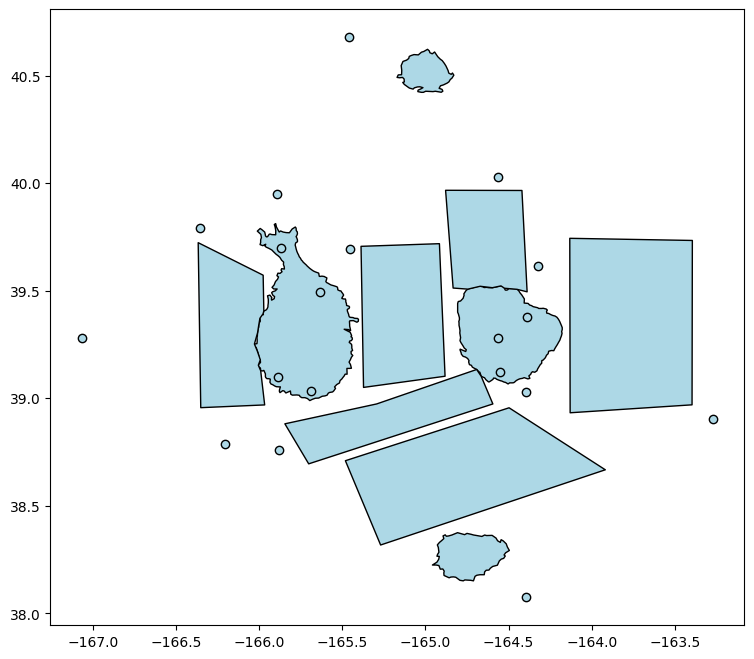

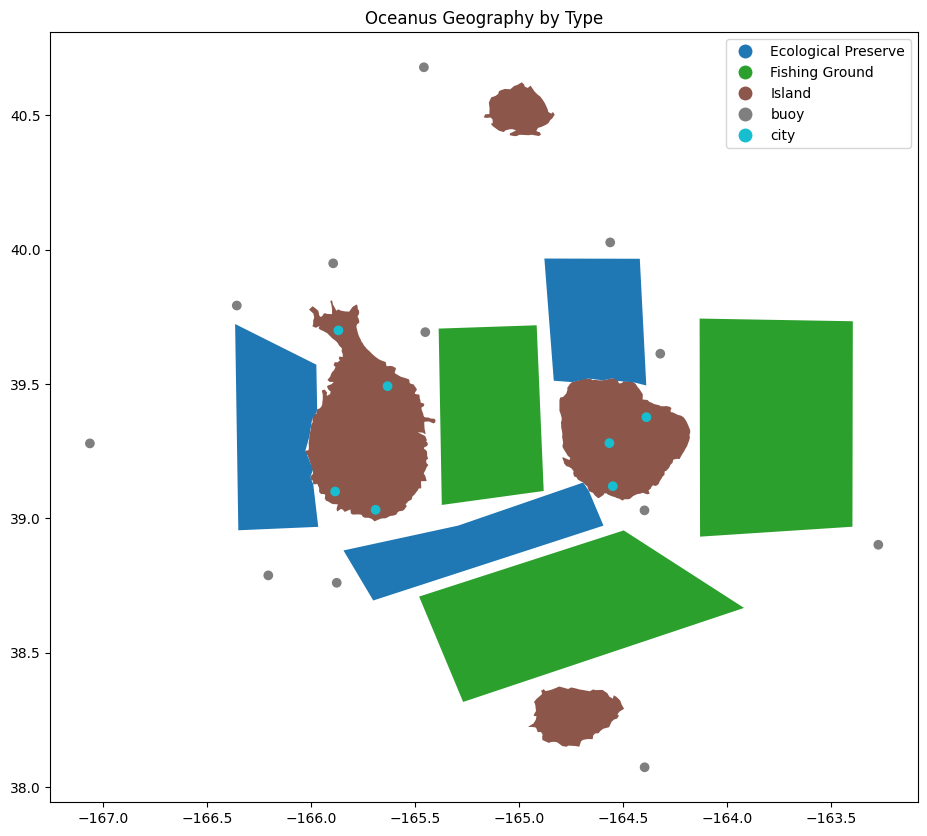

In [16]:
import matplotlib.pyplot as plt
import geopandas as gpd
import json
import pandas as pd

# Carica il GeoJSON
geo = gpd.read_file("/Users/daviderizzello/Documents/Uni/VisualAnalytics/Progetto/Data/MC2/OceanusInformation/Oceanus_Geography.geojson")

# Traccia mappa base
fig, ax = plt.subplots(figsize=(10, 8))
geo.plot(ax=ax, color="lightblue", edgecolor="black")

if "*Kind" in geo.columns:
    kind_col = "*Kind"
elif "Kind" in geo.columns:
    kind_col = "Kind"
else:
    kind_col = None

if kind_col:
    geo.plot(column=kind_col, legend=True, figsize=(12, 10))
else:
    geo.plot(figsize=(12, 10), color="lightgrey", edgecolor="black")

plt.title("Oceanus Geography by Type")
plt.show()


In [17]:
ping.head()

source             target                       time  \
0  City of Haacklee  perchplundererbc0 2035-09-16 04:06:48.185987   
1  City of Haacklee  perchplundererbc0 2035-09-20 05:21:33.678120   
2  City of Haacklee  perchplundererbc0 2035-09-28 04:31:47.118191   
3  City of Haacklee  perchplundererbc0 2035-10-04 04:59:36.052683   
4  City of Haacklee  perchplundererbc0 2035-10-15 04:26:14.647650   

           dwell  week                    company flag_country  \
0  115074.790577    37  Bennett, Jones and Miller      Oceanus   
1  412706.321880    38  Bennett, Jones and Miller      Oceanus   
2  286092.881809    39  Bennett, Jones and Miller      Oceanus   
3  327623.947317    40  Bennett, Jones and Miller      Oceanus   
4  243225.352350    42  Bennett, Jones and Miller      Oceanus   

   length_overall  tonnage               Activities fish_species_present  kind  
0            70.0    600.0  Tourism, Local shipping              Unknown  city  
1            70.0    600.0  Tourism, Local shipping              Unknown  city  
2            70.0    600.0  Tourism, Local shipping              Unknown  city  
3            70.0    600.0  Tourism, Local shipping              Unknown  city  
4            70.0    600.0  Tourism, Local shipping              Unknown  city

In [18]:
trans.head()

source            target_harbor  \
0  cargo_2035_2394778c  City of South Paackland   
1  cargo_2035_23956ba0  City of South Paackland   
2  cargo_2035_23957cfd  City of South Paackland   
3  cargo_2035_23958501        City of Paackland   
4  cargo_2035_23959ab6  City of South Paackland   

                                   Activities_harbor fish_species_harbor  \
0         Industry, Fishing industry, Local shipping             Unknown   
1         Industry, Fishing industry, Local shipping             Unknown   
2         Industry, Fishing industry, Local shipping             Unknown   
3  Industry, Fishing industry, Local shipping, To...             Unknown   
4         Industry, Fishing industry, Local shipping             Unknown   

  kind_harbor                fish_id       date  qty_tons  
0        city  gadusnspecificatae4ba 2035-11-03    24.375  
1        city  gadusnspecificatae4ba 2035-08-16    18.125  
2        city  gadusnspecificatae4ba 2035-08-20    20.625  
3        city  gadusnspecificatae4ba 2035-11-07    13.125  
4        city  gadusnspecificatae4ba 2035-08-24    13.125

In [19]:
for i in [ping, trans, harbor]:
    print(i.columns)

Index(['source', 'target', 'time', 'dwell', 'week', 'company', 'flag_country',
       'length_overall', 'tonnage', 'Activities', 'fish_species_present',
       'kind'],
      dtype='object')
Index(['source', 'target_harbor', 'Activities_harbor', 'fish_species_harbor',
       'kind_harbor', 'fish_id', 'date', 'qty_tons'],
      dtype='object')
Index(['source', 'target', 'date', 'company', 'flag_country', 'length_overall',
       'tonnage', 'Activities', 'fish_species_present', 'kind'],
      dtype='object')


In [20]:
fish['entity_name'].value_counts()

entity_name
Cod/Gadus n.specificatae     1
Birdseye/Pisces frigus       1
Sockfish/Pisces foetida      1
Wrasse/Labridae n.refert     1
Beauvoir/Habeas pisces       1
Harland/Piscis sapidum       1
Tuna/Thunnini n.vera         1
Offidiaa/Piscis osseus       1
Salmon/Oncorhynchus rosea    1
Helenaa/Pisces satis         1
Name: count, dtype: int64

In [ ]:
# TODO: transform fish species present into list of categories
locations["fish_species_list"] = (
    locations["fish_species_present"]
    .fillna("")
    .str.replace(r"\s+", "", regex=True)        
    .str.split(",")                             
)


In [23]:
locations["kind"].value_counts()

kind
buoy                   12
city                    6
Fishing Ground          3
Ecological Preserve     3
Name: count, dtype: int64

In [24]:
fish.head()

id               entity_name
0  gadusnspecificatae4ba  Cod/Gadus n.specificatae
1        piscesfrigus900    Birdseye/Pisces frigus
2       piscesfoetidaae7   Sockfish/Pisces foetida
3     labridaenrefert9be  Wrasse/Labridae n.refert
4        habeaspisces4eb    Beauvoir/Habeas pisces

In [26]:
sea_area = locations.loc[locations["kind"].isin(["Fishing Ground", "Ecological Preserve"])]

In [27]:
cities = locations.loc[locations["kind"].isin(["city"])]

In [28]:
cities.head()

location_id                                         Activities  \
0         City of Haacklee                            Tourism, Local shipping   
1           City of Lomark  Deep sea fishing, Commercial fishing, Tourism,...   
2           City of Himark                                Recreation, tourism   
3        City of Paackland  Industry, Fishing industry, Local shipping, To...   
4  City of South Paackland         Industry, Fishing industry, Local shipping   

  fish_species_present  kind fish_species_list  
0              Unknown  city         [Unknown]  
1              Unknown  city         [Unknown]  
2              Unknown  city         [Unknown]  
3              Unknown  city         [Unknown]  
4              Unknown  city         [Unknown]

In [29]:
ping["fish_species_present"].value_counts()

fish_species_present
Unknown                                                                                                                 118953
Cod/Gadus n.specificatae, Birdseye/Pisces frigus, Beauvoir/Habeas pisces                                                 45806
Wrasse/Labridae n.refert, Birdseye/Pisces frigus, Beauvoir/Habeas pisces                                                 27077
Tuna/Thunnini n.vera, Birdseye/Pisces frigus, Beauvoir/Habeas pisces, Harland/Piscis sapidum                             25755
Wrasse/Labridae n.refert, Tuna/Thunnini n.vera, Birdseye/Pisces frigus, Beauvoir/Habeas pisces, Helenaa/Pisces satis     19514
Wrasse/Labridae n.refert, Beauvoir/Habeas pisces, Helenaa/Pisces satis, Offidiaa/Piscis osseus                            2172
Tuna/Thunnini n.vera, Birdseye/Pisces frigus, Beauvoir/Habeas pisces, Helenaa/Pisces satis, Sockfish/Pisces foetida       1433
Name: count, dtype: int64

In [30]:
print(fish['entity_name'].unique())
print(sea_area['fish_species_list'].value_counts())

['Cod/Gadus n.specificatae' 'Birdseye/Pisces frigus'
 'Sockfish/Pisces foetida' 'Wrasse/Labridae n.refert'
 'Beauvoir/Habeas pisces' 'Harland/Piscis sapidum' 'Tuna/Thunnini n.vera'
 'Offidiaa/Piscis osseus' 'Salmon/Oncorhynchus rosea'
 'Helenaa/Pisces satis']
fish_species_list
[Cod/Gadusn.specificatae, Birdseye/Piscesfrigus, Beauvoir/Habeaspisces]                                              1
[Wrasse/Labridaen.refert, Beauvoir/Habeaspisces, Helenaa/Piscessatis, Offidiaa/Piscisosseus]                         1
[Wrasse/Labridaen.refert, Birdseye/Piscesfrigus, Beauvoir/Habeaspisces]                                              1
[Wrasse/Labridaen.refert, Tuna/Thunninin.vera, Birdseye/Piscesfrigus, Beauvoir/Habeaspisces, Helenaa/Piscessatis]    1
[Tuna/Thunninin.vera, Birdseye/Piscesfrigus, Beauvoir/Habeaspisces, Helenaa/Piscessatis, Sockfish/Piscesfoetida]     1
[Tuna/Thunninin.vera, Birdseye/Piscesfrigus, Beauvoir/Habeaspisces, Harland/Piscissapidum]                           1
Name: co

In [31]:
import re

fish_clean = fish.copy()
sea_clean = sea_area.copy()

#  Normalizza i nomi dei pesci
def normalize_name(x):
    if pd.isna(x):
        return ''
    x = x.lower()
    x = re.sub(r'[^a-z/]', '', x)   # rimuove tutto tranne lettere e '/'
    return x.strip()

fish_clean['fish_norm'] = fish_clean['entity_name'].apply(normalize_name)

# Esplodi fish_species_list se è lista, altrimenti converti in lista
if isinstance(sea_clean['fish_species_list'].iloc[0], list):
    sea_exp = sea_clean.explode('fish_species_list')
else:
    sea_exp = sea_clean.assign(fish_species_list=sea_clean['fish_species_list'].str.split(',')).explode('fish_species_list')

sea_exp['fish_species_list'] = sea_exp['fish_species_list'].astype(str).str.strip()
sea_exp['fish_norm'] = sea_exp['fish_species_list'].apply(normalize_name)

# Merge sulle versioni normalizzate
fish_locations = fish_clean.merge(
    sea_exp,
    on='fish_norm',
    how='inner'
)[['entity_name', 'location_id', 'kind']].drop_duplicates()

print(fish_locations)


                 entity_name          location_id                 kind
0   Cod/Gadus n.specificatae            Cod Table       Fishing Ground
1     Birdseye/Pisces frigus            Cod Table       Fishing Ground
2     Birdseye/Pisces frigus          Wrasse Beds       Fishing Ground
3     Birdseye/Pisces frigus            Nemo Reef  Ecological Preserve
4     Birdseye/Pisces frigus  Don Limpet Preserve  Ecological Preserve
5     Birdseye/Pisces frigus           Tuna Shelf       Fishing Ground
6    Sockfish/Pisces foetida  Don Limpet Preserve  Ecological Preserve
7   Wrasse/Labridae n.refert       Ghoti Preserve  Ecological Preserve
8   Wrasse/Labridae n.refert          Wrasse Beds       Fishing Ground
9   Wrasse/Labridae n.refert            Nemo Reef  Ecological Preserve
10    Beauvoir/Habeas pisces            Cod Table       Fishing Ground
11    Beauvoir/Habeas pisces       Ghoti Preserve  Ecological Preserve
12    Beauvoir/Habeas pisces          Wrasse Beds       Fishing Ground
13    

In [32]:
import pandas as pd
import plotly.graph_objects as go

links = (
    fish_locations.assign(
        location_label=lambda df: df['location_id'].astype(str) + " (" + df['kind'] + ")"
    )
    .groupby(['entity_name', 'location_label'])
    .size()
    .reset_index(name='value')
)

nodes = pd.Index(pd.concat([links['entity_name'], links['location_label']]).unique())

links['source_id'] = nodes.get_indexer(links['entity_name'])
links['target_id'] = nodes.get_indexer(links['location_label'])

fig = go.Figure(data=[go.Sankey(
    arrangement="snap",
    node=dict(
        label=nodes.tolist(),
        pad=20,
        thickness=18,
        line=dict(color="black", width=0.5)
    ),
    link=dict(
        source=links['source_id'],
        target=links['target_id'],
        value=links['value']
    )
)])

fig.update_layout(
    title_text="Fish → Location",
    font_size=10,
    height=600
)

fig.show()


In [124]:
fish_locations.head()

entity_name          location_id                 kind
0  Cod/Gadus n.specificatae            Cod Table       Fishing Ground
1    Birdseye/Pisces frigus            Cod Table       Fishing Ground
2    Birdseye/Pisces frigus          Wrasse Beds       Fishing Ground
3    Birdseye/Pisces frigus            Nemo Reef  Ecological Preserve
4    Birdseye/Pisces frigus  Don Limpet Preserve  Ecological Preserve

In [125]:
ping.head()

source             target                       time  \
0  City of Haacklee  perchplundererbc0 2035-09-16 04:06:48.185987   
1  City of Haacklee  perchplundererbc0 2035-09-20 05:21:33.678120   
2  City of Haacklee  perchplundererbc0 2035-09-28 04:31:47.118191   
3  City of Haacklee  perchplundererbc0 2035-10-04 04:59:36.052683   
4  City of Haacklee  perchplundererbc0 2035-10-15 04:26:14.647650   

           dwell  week                    company flag_country  \
0  115074.790577    37  Bennett, Jones and Miller      Oceanus   
1  412706.321880    38  Bennett, Jones and Miller      Oceanus   
2  286092.881809    39  Bennett, Jones and Miller      Oceanus   
3  327623.947317    40  Bennett, Jones and Miller      Oceanus   
4  243225.352350    42  Bennett, Jones and Miller      Oceanus   

   length_overall  tonnage               Activities fish_species_present  kind  
0            70.0    600.0  Tourism, Local shipping              Unknown  city  
1            70.0    600.0  Tourism, Local shipping              Unknown  city  
2            70.0    600.0  Tourism, Local shipping              Unknown  city  
3            70.0    600.0  Tourism, Local shipping              Unknown  city  
4            70.0    600.0  Tourism, Local shipping              Unknown  city

In [33]:
# --- FISH → LOCATION ---
links_fish_loc = (
    fish_locations.groupby(['entity_name', 'location_id'])
    .size()
    .reset_index(name='value')
    .rename(columns={'entity_name': 'Fish', 'location_id': 'Location'})
)

# --- LOCATION → VESSEL (da ping: source=location, target=vessel) ---
links_loc_vessel = (
    ping[['source', 'target']]
    .dropna()
    .rename(columns={'source': 'Location', 'target': 'Vessel'})
    .groupby(['Location', 'Vessel'])
    .size()
    .reset_index(name='value')
)

# Filtra solo le location presenti in fish_locations
links_loc_vessel = links_loc_vessel[links_loc_vessel['Location'].isin(fish_locations['location_id'].unique())]

# --- VESSEL → CITY (ping.target=vessel, ping.source=city) ---
# qui prendiamo solo i ping che partono da una city
vessel_city = ping[ping['source'].isin(cities['location_id'])].copy()

links_vessel_city = (
    vessel_city[['source', 'target']]
    .dropna()
    .rename(columns={'source': 'City', 'target': 'Vessel'})
    .groupby(['Vessel', 'City'])
    .size()
    .reset_index(name='value')
)

# --- 4️⃣ Unisci tutti i livelli ---
links_all = pd.concat([
    links_fish_loc.rename(columns={'Fish': 'source_name', 'Location': 'target_name'}),
    links_loc_vessel.rename(columns={'Location': 'source_name', 'Vessel': 'target_name'}),
    links_vessel_city.rename(columns={'Vessel': 'source_name', 'City': 'target_name'})
], ignore_index=True)


# --- 5️⃣ Crea lista nodi unici ---
nodes = pd.Index(pd.concat([links_all['source_name'], links_all['target_name']]).dropna().unique())

# --- 6️⃣ Mappa i nomi agli indici ---
links_all['source_id'] = links_all['source_name'].apply(lambda x: nodes.get_loc(x))
links_all['target_id'] = links_all['target_name'].apply(lambda x: nodes.get_loc(x))

# --- 7️⃣ Costruisci il Sankey ---
fig = go.Figure(data=[go.Sankey(
    arrangement="snap",
    node=dict(
        label=nodes.tolist(),
        pad=20,
        thickness=18,
        line=dict(color="black", width=0.5)
    ),
    link=dict(
        source=links_all['source_id'],
        target=links_all['target_id'],
        value=links_all['value']
    )
)])

fig.update_layout(
    title_text="Fish → Location → Vessel → City",
    font_size=10,
    height=800
)

fig.show()


In [ ]:
cit

NameError: name 'cities' is not defined

In [204]:
# --- 1️⃣ Seleziona il porto/città di destinazione ---
available_cities = cities['id'].unique()
print("Porti/Città disponibili:", available_cities)

NameError: name 'cities' is not defined

In [34]:
illegal_fishes = ["Sockfish/Pisces satis", "Offidia/Piscis osseus", "Sockfish/Pisces foetida"]

In [35]:
fish

id                entity_name
0  gadusnspecificatae4ba   Cod/Gadus n.specificatae
1        piscesfrigus900     Birdseye/Pisces frigus
2       piscesfoetidaae7    Sockfish/Pisces foetida
3     labridaenrefert9be   Wrasse/Labridae n.refert
4        habeaspisces4eb     Beauvoir/Habeas pisces
5       piscissapidum9b7     Harland/Piscis sapidum
6       thunnininveradb7       Tuna/Thunnini n.vera
7        piscisosseusb6d     Offidiaa/Piscis osseus
8   oncorhynchusrosea790  Salmon/Oncorhynchus rosea
9         piscessatisb87       Helenaa/Pisces satis

In [130]:
trans

source            target_harbor  \
0     cargo_2035_2394778c  City of South Paackland   
1     cargo_2035_23956ba0  City of South Paackland   
2     cargo_2035_23957cfd  City of South Paackland   
3     cargo_2035_23958501        City of Paackland   
4     cargo_2035_23959ab6  City of South Paackland   
...                   ...                      ...   
5302  cargo_2035_3119010f        City of Paackland   
5303  cargo_2035_3119118e        City of Paackland   
5304  cargo_2035_3119237c        City of Paackland   
5305  cargo_2035_311936c4        City of Paackland   
5306  cargo_2035_31194d62        City of Paackland   

                                      Activities_harbor fish_species_harbor  \
0            Industry, Fishing industry, Local shipping             Unknown   
1            Industry, Fishing industry, Local shipping             Unknown   
2            Industry, Fishing industry, Local shipping             Unknown   
3     Industry, Fishing industry, Local shipping, To...             Unknown   
4            Industry, Fishing industry, Local shipping             Unknown   
...                                                 ...                 ...   
5302  Industry, Fishing industry, Local shipping, To...             Unknown   
5303  Industry, Fishing industry, Local shipping, To...             Unknown   
5304  Industry, Fishing industry, Local shipping, To...             Unknown   
5305  Industry, Fishing industry, Local shipping, To...             Unknown   
5306  Industry, Fishing industry, Local shipping, To...             Unknown   

     kind_harbor                fish_id       date  qty_tons  
0           city  gadusnspecificatae4ba 2035-11-03    24.375  
1           city  gadusnspecificatae4ba 2035-08-16    18.125  
2           city  gadusnspecificatae4ba 2035-08-20    20.625  
3           city  gadusnspecificatae4ba 2035-11-07    13.125  
4           city  gadusnspecificatae4ba 2035-08-24    13.125  
...          ...                    ...        ...       ...  
5302        city        habeaspisces4eb 2035-08-24    10.000  
5303        city        habeaspisces4eb 2035-08-25    15.000  
5304        city        habeaspisces4eb        NaT       NaN  
5305        city        habeaspisces4eb 2035-08-30    19.000  
5306        city        habeaspisces4eb 2035-09-01     9.500  

[5307 rows x 8 columns]

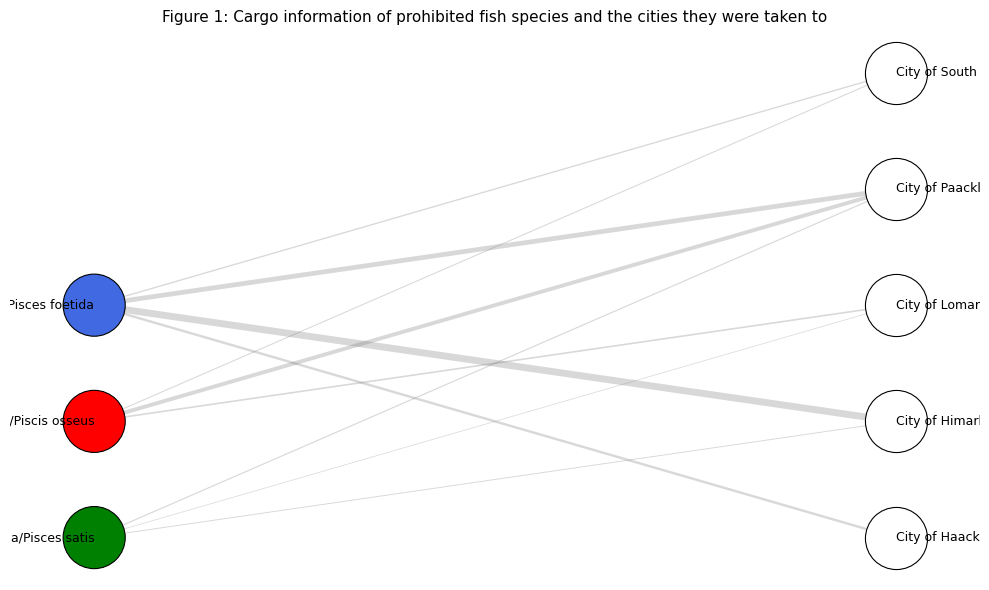

In [36]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# 1. Filtro specie proibite
illegal_fishes = ["Sockfish/Pisces foetida", "Offidiaa/Piscis osseus", "Helenaa/Pisces satis"]
fish_illegal = fish[fish["entity_name"].isin(illegal_fishes)]

# 2. Join trans + fish per tenere solo le spedizioni illegali
trans_illegal = trans.merge(
    fish_illegal,
    left_on="fish_id",
    right_on="id",
    how="inner"
)

# 3. Aggrego per (pesce -> città) e sommo le tonnellate
flow = (
    trans_illegal
    .groupby(["entity_name", "target_harbor"], as_index=False)["qty_tons"]
    .sum()
    .sort_values("qty_tons", ascending=False)
)

# 4. Costruisco il grafo bipartito pesce -> città
G = nx.DiGraph()

color_map_fish = {
    "Sockfish/Pisces foetida": "royalblue",
    "Offidiaa/Piscis osseus": "red",
    "Helenaa/Pisces satis": "green"
}

for _, row in flow.iterrows():
    fish_name = row["entity_name"]
    city_name = row["target_harbor"]
    tons = row["qty_tons"]

    # aggiungi nodi con attributi
    G.add_node(
        fish_name,
        layer="fish",
        color=color_map_fish.get(fish_name, "gray")
    )
    G.add_node(
        city_name,
        layer="city",
        color="black"
    )
    # aggiungi arco con peso
    G.add_edge(
        fish_name,
        city_name,
        weight=tons
    )

# 5. Layout manuale pulito:
#    - pesci a x=0
#    - città a x=1
fish_nodes = [n for n, d in G.nodes(data=True) if d["layer"] == "fish"]
city_nodes = [n for n, d in G.nodes(data=True) if d["layer"] == "city"]

# ordino per avere posizioni stabilissime
fish_nodes_sorted = sorted(fish_nodes)
city_nodes_sorted = sorted(city_nodes)

pos = {}
for i, n in enumerate(fish_nodes_sorted):
    pos[n] = (0, i)  # (x,y)

for j, n in enumerate(city_nodes_sorted):
    # metto le città a x=1 e le distribuisco verticalmente
    pos[n] = (1, j)

# 6. Calcolo spessori archi in modo "umano"
edges = list(G.edges(data=True))
weights = np.array([d["weight"] for (_, _, d) in edges])
max_w = weights.max() if len(weights) > 0 else 1.0

# scale non-lineare per evitare muri grigi:
edge_widths = 0.5 + 4.5 * (weights / max_w)  # tra 0.5 e 5 px
# alpha leggero
edge_alpha = 0.3

# 7. Plot "a mano": prima nodi, poi archi, poi label
plt.figure(figsize=(10, 6))

# archi
for (edge, w) in zip(edges, edge_widths):
    src, dst, d = edge
    nx.draw_networkx_edges(
        G,
        pos,
        edgelist=[(src, dst)],
        width=w,
        edge_color="gray",
        alpha=edge_alpha,
        arrows=False
    )

# nodi pesce
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=fish_nodes_sorted,
    node_color=[G.nodes[n]["color"] for n in fish_nodes_sorted],
    node_size=2000,
    edgecolors="black",
    linewidths=0.8
)

# nodi città
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=city_nodes_sorted,
    node_color="white",   # bianco per differenziare
    node_size=2000,
    edgecolors="black",
    linewidths=0.8
)

# label nodi pesce
nx.draw_networkx_labels(
    G,
    pos,
    labels={n: n for n in fish_nodes_sorted},
    font_size=9,
    font_color="black",
    horizontalalignment="right",
)

# label nodi città
nx.draw_networkx_labels(
    G,
    pos,
    labels={n: n for n in city_nodes_sorted},
    font_size=9,
    font_color="black",
    horizontalalignment="left",
)

plt.title("Figure 1: Cargo information of prohibited fish species and the cities they were taken to", fontsize=11)
plt.axis("off")
plt.tight_layout()
plt.show()


In [132]:
harbor

source                   target       date  \
0          wavewranglerc2d         City of Haacklee 2035-09-14   
1          wavewranglerc2d           City of Himark 2035-08-16   
2          wavewranglerc2d           City of Lomark 2035-04-07   
3          wavewranglerc2d  City of South Paackland 2035-07-05   
4    yellowfintunataker08b         City of Haacklee 2035-09-03   
..                     ...                      ...        ...   
884   nauticalnucleus107c4         City of Haacklee 2035-11-01   
885   maritimemagnitude2e9           City of Himark 2035-02-28   
886   maritimemagnitude2e9  City of South Paackland 2035-08-05   
887   maritimemagnitude2e9           City of Lomark 2035-04-07   
888   maritimemagnitude2e9         City of Haacklee 2035-07-24   

                    company flag_country  length_overall  tonnage  \
0    Roth, Logan and Moreno      Oceanus           110.0    700.0   
1    Roth, Logan and Moreno      Oceanus           110.0    700.0   
2    Roth, Logan and Moreno      Oceanus           110.0    700.0   
3    Roth, Logan and Moreno      Oceanus           110.0    700.0   
4                Brown-Haas      Oceanus           110.0   4500.0   
..                      ...          ...             ...      ...   
884                 Unknown    Zawalinda           100.0   2100.0   
885                 Unknown    Gavanovia            90.0   2100.0   
886                 Unknown    Gavanovia            90.0   2100.0   
887                 Unknown    Gavanovia            90.0   2100.0   
888                 Unknown    Gavanovia            90.0   2100.0   

                                            Activities fish_species_present  \
0                              Tourism, Local shipping              Unknown   
1                                  Recreation, tourism              Unknown   
2    Deep sea fishing, Commercial fishing, Tourism,...              Unknown   
3           Industry, Fishing industry, Local shipping              Unknown   
4                              Tourism, Local shipping              Unknown   
..                                                 ...                  ...   
884                            Tourism, Local shipping              Unknown   
885                                Recreation, tourism              Unknown   
886         Industry, Fishing industry, Local shipping              Unknown   
887  Deep sea fishing, Commercial fishing, Tourism,...              Unknown   
888                            Tourism, Local shipping              Unknown   

     kind  
0    city  
1    city  
2    city  
3    city  
4    city  
..    ...  
884  city  
885  city  
886  city  
887  city  
888  city  

[889 rows x 10 columns]

In [133]:
trans

source            target_harbor  \
0     cargo_2035_2394778c  City of South Paackland   
1     cargo_2035_23956ba0  City of South Paackland   
2     cargo_2035_23957cfd  City of South Paackland   
3     cargo_2035_23958501        City of Paackland   
4     cargo_2035_23959ab6  City of South Paackland   
...                   ...                      ...   
5302  cargo_2035_3119010f        City of Paackland   
5303  cargo_2035_3119118e        City of Paackland   
5304  cargo_2035_3119237c        City of Paackland   
5305  cargo_2035_311936c4        City of Paackland   
5306  cargo_2035_31194d62        City of Paackland   

                                      Activities_harbor fish_species_harbor  \
0            Industry, Fishing industry, Local shipping             Unknown   
1            Industry, Fishing industry, Local shipping             Unknown   
2            Industry, Fishing industry, Local shipping             Unknown   
3     Industry, Fishing industry, Local shipping, To...             Unknown   
4            Industry, Fishing industry, Local shipping             Unknown   
...                                                 ...                 ...   
5302  Industry, Fishing industry, Local shipping, To...             Unknown   
5303  Industry, Fishing industry, Local shipping, To...             Unknown   
5304  Industry, Fishing industry, Local shipping, To...             Unknown   
5305  Industry, Fishing industry, Local shipping, To...             Unknown   
5306  Industry, Fishing industry, Local shipping, To...             Unknown   

     kind_harbor                fish_id       date  qty_tons  
0           city  gadusnspecificatae4ba 2035-11-03    24.375  
1           city  gadusnspecificatae4ba 2035-08-16    18.125  
2           city  gadusnspecificatae4ba 2035-08-20    20.625  
3           city  gadusnspecificatae4ba 2035-11-07    13.125  
4           city  gadusnspecificatae4ba 2035-08-24    13.125  
...          ...                    ...        ...       ...  
5302        city        habeaspisces4eb 2035-08-24    10.000  
5303        city        habeaspisces4eb 2035-08-25    15.000  
5304        city        habeaspisces4eb        NaT       NaN  
5305        city        habeaspisces4eb 2035-08-30    19.000  
5306        city        habeaspisces4eb 2035-09-01     9.500  

[5307 rows x 8 columns]

In [155]:
ping.head()

source             target                       time  \
0  City of Haacklee  perchplundererbc0 2035-09-16 04:06:48.185987   
1  City of Haacklee  perchplundererbc0 2035-09-20 05:21:33.678120   
2  City of Haacklee  perchplundererbc0 2035-09-28 04:31:47.118191   
3  City of Haacklee  perchplundererbc0 2035-10-04 04:59:36.052683   
4  City of Haacklee  perchplundererbc0 2035-10-15 04:26:14.647650   

           dwell  week                    company flag_country  \
0  115074.790577    37  Bennett, Jones and Miller      Oceanus   
1  412706.321880    38  Bennett, Jones and Miller      Oceanus   
2  286092.881809    39  Bennett, Jones and Miller      Oceanus   
3  327623.947317    40  Bennett, Jones and Miller      Oceanus   
4  243225.352350    42  Bennett, Jones and Miller      Oceanus   

   length_overall  tonnage               Activities fish_species_present  kind  
0            70.0    600.0  Tourism, Local shipping              Unknown  city  
1            70.0    600.0  Tourism, Local shipping              Unknown  city  
2            70.0    600.0  Tourism, Local shipping              Unknown  city  
3            70.0    600.0  Tourism, Local shipping              Unknown  city  
4            70.0    600.0  Tourism, Local shipping              Unknown  city

In [159]:
ping[ping["target"]=="perchplundererbc0"].tail(20).sort_values("time")    

source             target                       time  \
215637  Tuna Shelf  perchplundererbc0 2035-11-24 03:01:21.195415   
215638  Tuna Shelf  perchplundererbc0 2035-11-24 06:06:55.648631   
215639  Tuna Shelf  perchplundererbc0 2035-11-24 09:33:18.750501   
215640  Tuna Shelf  perchplundererbc0 2035-11-24 12:06:17.672674   
215641  Tuna Shelf  perchplundererbc0 2035-11-24 15:06:00.719397   
215642  Tuna Shelf  perchplundererbc0 2035-11-24 17:50:21.116074   
215643  Tuna Shelf  perchplundererbc0 2035-11-24 20:47:41.715804   
215644  Tuna Shelf  perchplundererbc0 2035-11-24 23:58:08.873275   
215645  Tuna Shelf  perchplundererbc0 2035-11-25 02:39:21.694221   
215646  Tuna Shelf  perchplundererbc0 2035-11-25 07:03:33.750262   
215647  Tuna Shelf  perchplundererbc0 2035-11-25 11:23:46.998706   
215648  Tuna Shelf  perchplundererbc0 2035-11-25 14:18:56.043570   
215649  Tuna Shelf  perchplundererbc0 2035-11-25 18:28:17.929446   
215650  Tuna Shelf  perchplundererbc0 2035-11-25 22:52:53.214738   
215651  Tuna Shelf  perchplundererbc0 2035-11-26 01:25:50.650770   
215652  Tuna Shelf  perchplundererbc0 2035-11-29 10:14:23.682488   
215653  Tuna Shelf  perchplundererbc0 2035-11-29 15:23:53.806308   
215654  Tuna Shelf  perchplundererbc0 2035-11-29 18:20:54.696817   
215655  Tuna Shelf  perchplundererbc0 2035-11-29 21:20:37.707438   
215656  Tuna Shelf  perchplundererbc0 2035-11-29 23:57:11.189164   

               dwell  week                    company flag_country  \
215637   5367.054436    47  Bennett, Jones and Miller      Oceanus   
215638   4943.662072    47  Bennett, Jones and Miller      Oceanus   
215639   4439.390692    47  Bennett, Jones and Miller      Oceanus   
215640   5343.245410    47  Bennett, Jones and Miller      Oceanus   
215641   4781.801778    47  Bennett, Jones and Miller      Oceanus   
215642   4886.144377    47  Bennett, Jones and Miller      Oceanus   
215643   4926.214077    47  Bennett, Jones and Miller      Oceanus   
215644   4617.129490    47  Bennett, Jones and Miller      Oceanus   
215645   5119.404343    47  Bennett, Jones and Miller      Oceanus   
215646   8998.733706    47  Bennett, Jones and Miller      Oceanus   
215647   5174.343077    47  Bennett, Jones and Miller      Oceanus   
215648   5046.391504    47  Bennett, Jones and Miller      Oceanus   
215649  10384.530659    47  Bennett, Jones and Miller      Oceanus   
215650   4624.766358    47  Bennett, Jones and Miller      Oceanus   
215651   4652.189648    48  Bennett, Jones and Miller      Oceanus   
215652  12653.322892    48  Bennett, Jones and Miller      Oceanus   
215653   5243.355228    48  Bennett, Jones and Miller      Oceanus   
215654   5654.987233    48  Bennett, Jones and Miller      Oceanus   
215655   4820.325867    48  Bennett, Jones and Miller      Oceanus   
215656   5756.821746    48  Bennett, Jones and Miller      Oceanus   

        length_overall  tonnage                         Activities  \
215637            70.0    600.0  Commercial fishing, Sport fishing   
215638            70.0    600.0  Commercial fishing, Sport fishing   
215639            70.0    600.0  Commercial fishing, Sport fishing   
215640            70.0    600.0  Commercial fishing, Sport fishing   
215641            70.0    600.0  Commercial fishing, Sport fishing   
215642            70.0    600.0  Commercial fishing, Sport fishing   
215643            70.0    600.0  Commercial fishing, Sport fishing   
215644            70.0    600.0  Commercial fishing, Sport fishing   
215645            70.0    600.0  Commercial fishing, Sport fishing   
215646            70.0    600.0  Commercial fishing, Sport fishing   
215647            70.0    600.0  Commercial fishing, Sport fishing   
215648            70.0    600.0  Commercial fishing, Sport fishing   
215649            70.0    600.0  Commercial fishing, Sport fishing   
215650            70.0    600.0  Commercial fishing, Sport fishing   
215651            70.0    600.0  Commercial fishing, Sport fis

In [135]:
vessels

vessel_id                  company flag_country  \
0            wavewranglerc2d   Roth, Logan and Moreno      Oceanus   
1      yellowfintunataker08b               Brown-Haas      Oceanus   
2                webigailba7                  Unknown      Oceanus   
3    arcticgraylingangler094  Smith, Davis and Acosta      Oceanus   
4        anchovyassaulterb1c           Cisneros-Meyer      Oceanus   
..                       ...                      ...          ...   
291     oceanicomnipotenta4a                  Unknown  Playa Solis   
292        heartofoceanusf11                  Unknown      Oceanus   
293            seawaysage5ce                  Unknown     Coralada   
294     nauticalnucleus107c4                  Unknown    Zawalinda   
295     maritimemagnitude2e9                  Unknown    Gavanovia   

     length_overall  tonnage  
0             110.0    700.0  
1             110.0   4500.0  
2              50.0      0.0  
3              80.0   1500.0  
4              60.0    400.0  
..              ...      ...  
291           210.0  76300.0  
292             0.0      0.0  
293           100.0   2100.0  
294           100.0   2100.0  
295            90.0   2100.0  

[296 rows x 5 columns]

In [153]:
harbor.head(20).sort_values("date") 

source                   target       date  \
11      anchovyassaulterb1c  City of South Paackland 2035-03-12   
7   arcticgraylingangler094           City of Himark 2035-03-22   
19   brooktroutbuccaneerc0b         City of Haacklee 2035-03-24   
2           wavewranglerc2d           City of Lomark 2035-04-07   
17         halibuthunterd84  City of South Paackland 2035-04-16   
13           oceanreaper44a  City of South Paackland 2035-04-16   
18         halibuthunterd84           City of Lomark 2035-06-18   
3           wavewranglerc2d  City of South Paackland 2035-07-05   
1           wavewranglerc2d           City of Himark 2035-08-16   
6   arcticgraylingangler094         City of Haacklee 2035-08-20   
12           oceanreaper44a         City of Haacklee 2035-08-24   
4     yellowfintunataker08b         City of Haacklee 2035-09-03   
0           wavewranglerc2d         City of Haacklee 2035-09-14   
10      anchovyassaulterb1c         City of Haacklee 2035-09-14   
9   arcticgraylingangler094  City of South Paackland 2035-09-17   
15      herringharpooner843  City of South Paackland 2035-09-22   
5               webigailba7         City of Haacklee 2035-10-18   
8   arcticgraylingangler094           City of Lomark 2035-11-07   
14      herringharpooner843         City of Haacklee 2035-11-28   
16         halibuthunterd84         City of Haacklee 2035-11-28   

                         company flag_country  length_overall  tonnage  \
11                Cisneros-Meyer      Oceanus            60.0    400.0   
7        Smith, Davis and Acosta      Oceanus            80.0   1500.0   
19  Stewart, Perkins and Sanchez      Oceanus            90.0   6500.0   
2         Roth, Logan and Moreno      Oceanus           110.0    700.0   
17                  Weaver-Baker      Oceanus            10.0    100.0   
13       FlounderLeska Marine BV      Oceanus            50.0    300.0   
18                  Weaver-Baker      Oceanus            10.0    100.0   
3         Roth, Logan and Moreno      Oceanus           110.0    700.0   
1         Roth, Logan and Moreno      Oceanus           110.0    700.0   
6        Smith, Davis and Acosta      Oceanus            80.0   1500.0   
12       FlounderLeska Marine BV      Oceanus            50.0    300.0   
4                     Brown-Haas      Oceanus           110.0   4500.0   
0         Roth, Logan and Moreno      Oceanus           110.0    700.0   
10                Cisneros-Meyer      Oceanus            60.0    400.0   
9        Smith, Davis and Acosta      Oceanus            80.0   1500.0   
15                   House Group      Oceanus           130.0   7400.0   
5                        Unknown      Oceanus            50.0      0.0   
8        Smith, Davis and Acosta      Oceanus            80.0   1500.0   
14                   House Group      Oceanus           130.0   7400.0   
16                  Weaver-Baker      Oceanus            10.0    100.0   

                                           Activities fish_species_present  \
11         Industry, Fishing industry, Local shipping              Unknown   
7                                 Recreation, tourism              Unknown   
19                            Tourism, Local shipping              Unknown   
2   Deep sea fishing, Commercial fishing, Tourism,...              Unknown   
17         Industry, Fishing industry, Local shipping              Unknown   
13         Industry, Fishing industry, Local shipping              Unknown   
18  Deep sea fishing, Commercial fishing, Tourism,...              Unknown   
3          Industry, Fishing industry, Local shipping              Unknown   
1                                 Recreation, tourism              Unknown   
6                             Tourism, Local shipping              Unknown   
12                            Tourism, Local shipping              Unknown   
4                             Tourism, Local shipping              Unknown   
0                             Tourism, Local

# Checkpoint 2

In [195]:
vessels = vessels[vessels["tonnage"]>0]

In [317]:
fish_locations.to_parquet("data_clean/fish_locations.parquet", index=False, engine='fastparquet')

In [ ]:
fish.to_parquet("data_clean/fish.parquet", index=False, engine='fastparquet')
harbor.to_parquet("data_clean/harbors.parquet", index=False, engine='fastparquet')  
locations.to_parquet("data_clean/locations.parquet", index=False, engine='fastparquet')
vessels.to_parquet("data_clean/vessels.parquet", index=False, engine='fastparquet')
deliveries.to_parquet("data_clean/deliveries.parquet", index=False, engine='fastparquet')
ping.to_parquet("data_clean/pings.parquet", index=False, engine='fastparquet')
trans.to_parquet("data_clean/transactions.parquet", index=False, engine='fastparquet')

In [197]:
fish = pd.read_parquet("data_clean/fish.parquet", index=False, engine='fastparquet')
harbor = pd.read_parquet("data_clean/harbors.parquet", index=False, engine='fastparquet')
locations = pd.read_parquet("data_clean/locations.parquet", index=False, engine='fastparquet')
vessels = pd.read_parquet("data_clean/vessels.parquet", index=False, engine='fastparquet')
deliveries = pd.read_parquet("data_clean/deliveries.parquet", index=False, engine='fastparquet')
ping = pd.read_parquet("data_clean/pings.parquet", index=False, engine='fastparquet')
trans = pd.read_parquet("data_clean/transactions.parquet", index=False, engine='fastparquet')   

In [255]:
fish.to_json("frontend_data/fish.json", orient="records", date_format="iso")
harbor.to_json("frontend_data/harbors.json", orient="records", date_format="iso")
locations.to_json("frontend_data/locations.json", orient="records", date_format="iso")
vessels.to_json("frontend_data/vessels.json", orient="records", date_format="iso")
deliveries.to_json("frontend_data/deliveries.json", orient="records", date_format="iso")
ping.to_json("frontend_data/pings.json", orient="records", date_format="iso")
trans.to_json("frontend_data/transactions.json", orient="records", date_format="iso")

# Test paper

In [198]:
selected_port = "City of Paackland"
selected_date = pd.Timestamp("2035-11-23")


In [199]:
trans.head()

source            target_harbor  \
0  cargo_2035_2394778c  City of South Paackland   
1  cargo_2035_23956ba0  City of South Paackland   
2  cargo_2035_23957cfd  City of South Paackland   
3  cargo_2035_23958501        City of Paackland   
4  cargo_2035_23959ab6  City of South Paackland   

                                   Activities_harbor fish_species_harbor  \
0         Industry, Fishing industry, Local shipping             Unknown   
1         Industry, Fishing industry, Local shipping             Unknown   
2         Industry, Fishing industry, Local shipping             Unknown   
3  Industry, Fishing industry, Local shipping, To...             Unknown   
4         Industry, Fishing industry, Local shipping             Unknown   

  kind_harbor                fish_id       date  qty_tons  
0        city  gadusnspecificatae4ba 2035-11-03    24.375  
1        city  gadusnspecificatae4ba 2035-08-16    18.125  
2        city  gadusnspecificatae4ba 2035-08-20    20.625  
3        city  gadusnspecificatae4ba 2035-11-07    13.125  
4        city  gadusnspecificatae4ba 2035-08-24    13.125

In [200]:
# Calcolo esportazioni totali per fish_id nel porto e data selezionati
daily_exports = (
    trans[(trans["target_harbor"] == selected_port) &
          (pd.to_datetime(trans["date"]).dt.date == selected_date.date())]
    .groupby("fish_id", as_index=False)["qty_tons"]
    .sum()
    .rename(columns={"qty_tons": "exports_tons"})
)


In [201]:
# enrich con nomi pesci
daily_exports = daily_exports.merge(fish, left_on="fish_id", right_on="id", how="left")[["fish_id", "entity_name", "exports_tons"]]

In [202]:
harbor.head()

source                   target       date  \
0        wavewranglerc2d         City of Haacklee 2035-09-14   
1        wavewranglerc2d           City of Himark 2035-08-16   
2        wavewranglerc2d           City of Lomark 2035-04-07   
3        wavewranglerc2d  City of South Paackland 2035-07-05   
4  yellowfintunataker08b         City of Haacklee 2035-09-03   

                  company flag_country  length_overall  tonnage  \
0  Roth, Logan and Moreno      Oceanus           110.0    700.0   
1  Roth, Logan and Moreno      Oceanus           110.0    700.0   
2  Roth, Logan and Moreno      Oceanus           110.0    700.0   
3  Roth, Logan and Moreno      Oceanus           110.0    700.0   
4              Brown-Haas      Oceanus           110.0   4500.0   

                                          Activities fish_species_present  \
0                            Tourism, Local shipping              Unknown   
1                                Recreation, tourism              Unknown   
2  Deep sea fishing, Commercial fishing, Tourism,...              Unknown   
3         Industry, Fishing industry, Local shipping              Unknown   
4                            Tourism, Local shipping              Unknown   

   kind  
0  city  
1  city  
2  city  
3  city  
4  city

In [203]:
ping.head()

source             target                       time  \
0  City of Haacklee  perchplundererbc0 2035-09-16 04:06:48.185987   
1  City of Haacklee  perchplundererbc0 2035-09-20 05:21:33.678120   
2  City of Haacklee  perchplundererbc0 2035-09-28 04:31:47.118191   
3  City of Haacklee  perchplundererbc0 2035-10-04 04:59:36.052683   
4  City of Haacklee  perchplundererbc0 2035-10-15 04:26:14.647650   

           dwell  week                    company flag_country  \
0  115074.790577    37  Bennett, Jones and Miller      Oceanus   
1  412706.321880    38  Bennett, Jones and Miller      Oceanus   
2  286092.881809    39  Bennett, Jones and Miller      Oceanus   
3  327623.947317    40  Bennett, Jones and Miller      Oceanus   
4  243225.352350    42  Bennett, Jones and Miller      Oceanus   

   length_overall  tonnage               Activities fish_species_present  kind  
0            70.0    600.0  Tourism, Local shipping              Unknown  city  
1            70.0    600.0  Tourism, Local shipping              Unknown  city  
2            70.0    600.0  Tourism, Local shipping              Unknown  city  
3            70.0    600.0  Tourism, Local shipping              Unknown  city  
4            70.0    600.0  Tourism, Local shipping              Unknown  city

In [204]:
# Le navi arrivate il giorno PRIMA sono quelle che hanno scaricato il pesce
arrival_date = selected_date - pd.Timedelta(days=1)

arrived_vessels = (
    ping[(ping["source"] == selected_port) &
         (ping["time"].dt.date == arrival_date.date())]
    [["target", "time"]]
    .drop_duplicates("target")
)


In [205]:
arrived_vessels

target                       time
12039          wahoowrangler016 2035-11-22 18:16:55.524485
12283             squidsquad7fd 2035-11-22 22:37:46.948070
12639           marlinmaster8ab 2035-11-22 10:09:43.018553
13140            breambanditc85 2035-11-22 06:37:39.830201
13306            neptunesnete8c 2035-11-22 05:37:27.126286
13359         mahimahimaster04f 2035-11-22 06:36:25.138144
13992             soleseeker47a 2035-11-22 00:40:34.637757
14153           baitedbreath538 2035-11-22 02:05:11.835091
14304  speckledtroutsaboteur509 2035-11-22 02:12:00.575186
14396          costasmeraldaac7 2035-11-22 17:39:13.588831
15089             kingfisher87d 2035-11-22 06:24:01.532796
15200             bassbaiterb9f 2035-11-22 15:31:38.677996
15291             ruddraiderced 2035-11-22 23:02:17.227927
15476             bassbandit0d5 2035-11-22 03:51:41.297724
15538      longfintunalooterf32 2035-11-22 15:42:04.518709
15629          cobiacapturere5e 2035-11-22 00:43:15.818712
15779       browntroutbandite67 2035-11-22 17:03:41.392226
15793        blackdrumbanditc5b 2035-11-22 05:34:01.458396
16102              honorablea6e 2035-11-22 13:56:09.673235
16529                  stout369 2035-11-22 16:28:20.678688
16945        spiritofoceanus404 2035-11-22 12:34:15.536193

In [206]:
sea_area

location_id                         Activities  \
18            Cod Table                 Commercial fishing   
19       Ghoti Preserve      Research, Tourism, Recreation   
20          Wrasse Beds                 Commercial fishing   
21            Nemo Reef                Recreation, Tourism   
22  Don Limpet Preserve                Recreation, Tourism   
23           Tuna Shelf  Commercial fishing, Sport fishing   

                                 fish_species_present                 kind  \
18  Cod/Gadus n.specificatae, Birdseye/Pisces frig...       Fishing Ground   
19  Wrasse/Labridae n.refert, Beauvoir/Habeas pisc...  Ecological Preserve   
20  Wrasse/Labridae n.refert, Birdseye/Pisces frig...       Fishing Ground   
21  Wrasse/Labridae n.refert, Tuna/Thunnini n.vera...  Ecological Preserve   
22  Tuna/Thunnini n.vera, Birdseye/Pisces frigus, ...  Ecological Preserve   
23  Tuna/Thunnini n.vera, Birdseye/Pisces frigus, ...       Fishing Ground   

                                    fish_species_list  
18  [Cod/Gadusn.specificatae, Birdseye/Piscesfrigu...  
19  [Wrasse/Labridaen.refert, Beauvoir/Habeaspisce...  
20  [Wrasse/Labridaen.refert, Birdseye/Piscesfrigu...  
21  [Wrasse/Labridaen.refert, Tuna/Thunninin.vera,...  
22  [Tuna/Thunninin.vera, Birdseye/Piscesfrigus, B...  
23  [Tuna/Thunninin.vera, Birdseye/Piscesfrigus, B...

In [207]:
ping.head()

source             target                       time  \
0  City of Haacklee  perchplundererbc0 2035-09-16 04:06:48.185987   
1  City of Haacklee  perchplundererbc0 2035-09-20 05:21:33.678120   
2  City of Haacklee  perchplundererbc0 2035-09-28 04:31:47.118191   
3  City of Haacklee  perchplundererbc0 2035-10-04 04:59:36.052683   
4  City of Haacklee  perchplundererbc0 2035-10-15 04:26:14.647650   

           dwell  week                    company flag_country  \
0  115074.790577    37  Bennett, Jones and Miller      Oceanus   
1  412706.321880    38  Bennett, Jones and Miller      Oceanus   
2  286092.881809    39  Bennett, Jones and Miller      Oceanus   
3  327623.947317    40  Bennett, Jones and Miller      Oceanus   
4  243225.352350    42  Bennett, Jones and Miller      Oceanus   

   length_overall  tonnage               Activities fish_species_present  kind  
0            70.0    600.0  Tourism, Local shipping              Unknown  city  
1            70.0    600.0  Tourism, Local shipping              Unknown  city  
2            70.0    600.0  Tourism, Local shipping              Unknown  city  
3            70.0    600.0  Tourism, Local shipping              Unknown  city  
4            70.0    600.0  Tourism, Local shipping              Unknown  city

In [208]:
for vessel, group in ping.groupby("target"):
    print(f"Vessel: {vessel}, Records: {len(group)}")

Vessel: albacoreangler47d, Records: 1151
Vessel: albacoreassaulter482, Records: 965
Vessel: amberjackassaulterd52, Records: 1265
Vessel: americaneelenthusiastcfa, Records: 1096
Vessel: anchovyassaulterb1c, Records: 2215
Vessel: aquaticangler5c3, Records: 1080
Vessel: aquaticpursuitf31, Records: 1141
Vessel: aquatransit6bc, Records: 27
Vessel: arcticgraylingangler094, Records: 1904
Vessel: athenad34, Records: 742
Vessel: atlanticbluemarlinmarauder0b4, Records: 837
Vessel: atlanticcodcatcherca6, Records: 1412
Vessel: baitedbreath538, Records: 944
Vessel: barracudabaiter8b3, Records: 1157
Vessel: barracudabandit836, Records: 757
Vessel: bassbaiterb9f, Records: 789
Vessel: bassbandit0d5, Records: 1111
Vessel: bigeyetunabanditb73, Records: 669
Vessel: bigeyetunabuccaneera16, Records: 1058
Vessel: blackbullheadbandit801, Records: 722
Vessel: blackdrumbanditc5b, Records: 124
Vessel: bluecatfishcatcher468, Records: 1476
Vessel: bluefintunabandit177, Records: 976
Vessel: bluefishbandit8ec, Reco

In [209]:
def compute_fishing_window(ping, port_name):
    ping = ping.sort_values(["target", "time"])
    records = []

    for vessel, group in ping.groupby("target"):
        group = group.reset_index(drop=True)
        for i in range(1, len(group)):
            curr_row = group.loc[i]
            prev_row = group.loc[i-1]

            # Quando entra in porto: evento target
            if curr_row["source"] == port_name and curr_row["kind"] == "city":
                # Cerca uscita precedente (ultimo punto non di porto)
                last_out_idx = group.loc[:i-1, "kind"].ne("city").idxmax()
                if pd.notna(last_out_idx):
                    start_time = group.loc[last_out_idx, "time"]
                    end_time = curr_row["time"]
                    mask = (group["time"] >= start_time) & (group["time"] <= end_time)
                    trip = group.loc[mask & (group["kind"] != "city")]

                    # Somma dwell per location
                    dwell_summary = (
                        trip.groupby(["source", "kind"], as_index=False)["dwell"].sum()
                    )
                    dwell_summary = dwell_summary.rename(columns={"source": "location_name"})
                    dwell_summary["vessel_name"] = vessel
                    dwell_summary["arrival_time"] = end_time
                    records.append(dwell_summary)

    return pd.concat(records, ignore_index=True)


In [210]:
def compute_fishing_window_strict(ping):
    """
    Costruisce cicli di pesca tra due 'city' consecutive, indipendentemente dal nome del porto.
    """
    ping = ping.sort_values(["target", "time"])
    records = []

    for vessel, group in ping.groupby("target"):
        group = group.reset_index(drop=True)

        start_idx = None
        start_time = None

        for i, row in group.iterrows():
            # Inizio ciclo (una city)
            if row["kind"] == "city":
                # Se c'è già un ciclo aperto, chiudilo
                if start_idx is not None and i > start_idx + 1:
                    trip = group.loc[start_idx + 1 : i - 1]
                    if not trip.empty:
                        dwell_summary = (
                            trip.groupby(["source", "kind"], as_index=False)["dwell"].sum()
                        )
                        dwell_summary = dwell_summary.rename(columns={"source": "location_name"})
                        dwell_summary["vessel_name"] = vessel
                        dwell_summary["arrival_time"] = row["time"]
                        records.append(dwell_summary)

                # Nuovo ciclo (apertura)
                start_idx = i
                start_time = row["time"]

    return pd.concat(records, ignore_index=True)


In [211]:
ping

source               target                       time  \
0       City of Haacklee    perchplundererbc0 2035-09-16 04:06:48.185987   
1       City of Haacklee    perchplundererbc0 2035-09-20 05:21:33.678120   
2       City of Haacklee    perchplundererbc0 2035-09-28 04:31:47.118191   
3       City of Haacklee    perchplundererbc0 2035-10-04 04:59:36.052683   
4       City of Haacklee    perchplundererbc0 2035-10-15 04:26:14.647650   
...                  ...                  ...                        ...   
240705        Tuna Shelf  maritimemajesticeb7 2035-11-09 16:10:38.373929   
240706        Tuna Shelf    vesselvanguardbf2 2035-07-31 13:26:04.610993   
240707        Tuna Shelf    vesselvanguardbf2 2035-09-20 23:27:08.743682   
240708        Tuna Shelf       seawaysavvy102 2035-08-24 11:43:28.130654   
240709        Tuna Shelf       seawaysurgeb1c 2035-11-12 02:52:42.477318   

                dwell  week                    company flag_country  \
0       115074.790577    37  Bennett, Jones and Miller      Oceanus   
1       412706.321880    38  Bennett, Jones and Miller      Oceanus   
2       286092.881809    39  Bennett, Jones and Miller      Oceanus   
3       327623.947317    40  Bennett, Jones and Miller      Oceanus   
4       243225.352350    42  Bennett, Jones and Miller      Oceanus   
...               ...   ...                        ...          ...   
240705    3443.278261    45                    Unknown     Merigrad   
240706    7236.802726    31                    Unknown    Orvietola   
240707    6776.912594    38                    Unknown    Orvietola   
240708    7722.914478    34                    Unknown     Uzifrica   
240709    7496.179929    46                    Unknown     Coralada   

        length_overall  tonnage                         Activities  \
0                 70.0    600.0            Tourism, Local shipping   
1                 70.0    600.0            Tourism, Local shipping   
2                 70.0    600.0            Tourism, Local shipping   
3                 70.0    600.0            Tourism, Local shipping   
4                 70.0    600.0            Tourism, Local shipping   
...                ...      ...                                ...   
240705            90.0   3800.0  Commercial fishing, Sport fishing   
240706            90.0   2100.0  Commercial fishing, Sport fishing   
240707            90.0   2100.0  Commercial fishing, Sport fishing   
240708           190.0  36800.0  Commercial fishing, Sport fishing   
240709           130.0  35900.0  Commercial fishing, Sport fishing   

                                     fish_species_present            kind  
0                                                 Unknown            city  
1                                                 Unknown            city  
2                                                 Unknown            city  
3                                                 Unknown            city  
4                                                 Unknown            city  
...                                                   ...             ...  
240705  Tuna/Thunnini n.vera, Birdseye/Pisces frigus, ...  Fishing Ground  
240706  Tuna/Thunnini n.vera, Birdseye/Pisces frigus, ...  Fishing Ground  
240707  Tuna/Thunnini n.vera, Birdseye/Pisces frigus, ...  Fishing Ground  
240708  Tuna/Thunnini n.vera, Birdseye/Pisces frigus, ...  Fishing Ground  
240709  Tuna/Thunnini n.vera, Birdseye/Pisces frigus, ...  Fishing Ground  

[240710 rows x 12 columns]

In [212]:
ping.shape

(240710, 12)

In [213]:
trial_df_fishing_window = compute_fishing_window_strict(ping)

In [214]:
trial_df_fishing_window.tail(30)

location_name            kind          dwell      vessel_name  \
60943         Nav C            buoy   19152.648761  zanderzealotb23   
60944   Wrasse Beds  Fishing Ground  163739.597067  zanderzealotb23   
60945         Nav 1            buoy    7842.023754  zanderzealotb23   
60946         Nav 2            buoy    4892.400465  zanderzealotb23   
60947         Nav C            buoy   10817.120383  zanderzealotb23   
60948   Wrasse Beds  Fishing Ground  172565.720696  zanderzealotb23   
60949         Nav 1            buoy   14739.885733  zanderzealotb23   
60950         Nav 2            buoy    4623.518928  zanderzealotb23   
60951         Nav C            buoy   14431.447123  zanderzealotb23   
60952   Wrasse Beds  Fishing Ground  159952.254807  zanderzealotb23   
60953         Nav 1            buoy    7595.427877  zanderzealotb23   
60954         Nav 2            buoy    7174.200541  zanderzealotb23   
60955         Nav C            buoy   23246.192773  zanderzealotb23   
60956   Wrasse Beds  Fishing Ground  163932.315889  zanderzealotb23   
60957         Nav 1            buoy   14266.088177  zanderzealotb23   
60958         Nav 2            buoy    4441.445617  zanderzealotb23   
60959         Nav C            buoy   11141.886411  zanderzealotb23   
60960   Wrasse Beds  Fishing Ground  164052.453596  zanderzealotb23   
60961         Nav 1            buoy    8393.109396  zanderzealotb23   
60962         Nav 2            buoy    4287.462854  zanderzealotb23   
60963         Nav C            buoy   15301.369929  zanderzealotb23   
60964   Wrasse Beds  Fishing Ground  167950.088721  zanderzealotb23   
60965         Nav 1            buoy    7317.840360  zanderzealotb23   
60966         Nav 2            buoy    5341.879503  zanderzealotb23   
60967         Nav C            buoy    4192.492287  zanderzealotb23   
60968   Wrasse Beds  Fishing Ground  181910.220972  zanderzealotb23   
60969         Nav 1            buoy   14742.902225  zanderzealotb23   
60970         Nav 2            buoy    4908.573354  zanderzealotb23   
60971         Nav C            buoy   10685.420426  zanderzealotb23   
60972   Wrasse Beds  Fishing Ground  163748.009792  zanderzealotb23   

                    arrival_time  
60943 2035-11-04 12:05:56.765952  
60944 2035-11-04 12:05:56.765952  
60945 2035-11-07 12:07:37.880391  
60946 2035-11-07 12:07:37.880391  
60947 2035-11-07 12:07:37.880391  
60948 2035-11-07 12:07:37.880391  
60949 2035-11-11 12:01:54.638906  
60950 2035-11-11 12:01:54.638906  
60951 2035-11-11 12:01:54.638906  
60952 2035-11-11 12:01:54.638906  
60953 2035-11-14 13:10:45.951705  
60954 2035-11-14 13:10:45.951705  
60955 2035-11-14 13:10:45.951705  
60956 2035-11-14 13:10:45.951705  
60957 2035-11-18 11:57:54.620834  
60958 2035-11-18 11:57:54.620834  
60959 2035-11-18 11:57:54.620834  
60960 2035-11-18 11:57:54.620834  
60961 2035-11-21 12:06:24.608722  
60962 2035-11-21 12:06:24.608722  
60963 2035-11-21 12:06:24.608722  
60964 2035-11-21 12:06:24.608722  
60965 2035-11-25 12:56:26.078997  
60966 2035-11-25 12:56:26.078997  
60967 2035-11-25 12:56:26.078997  
60968 2035-11-25 12:56:26.078997  
60969 2035-11-28 12:04:20.648668  
60970 2035-11-28 12:04:20.648668  
60971 2035-11-28 12:04:20.648668  
60972 2035-11-28 12:04:20.648668

In [215]:
ping.head()

source             target                       time  \
0  City of Haacklee  perchplundererbc0 2035-09-16 04:06:48.185987   
1  City of Haacklee  perchplundererbc0 2035-09-20 05:21:33.678120   
2  City of Haacklee  perchplundererbc0 2035-09-28 04:31:47.118191   
3  City of Haacklee  perchplundererbc0 2035-10-04 04:59:36.052683   
4  City of Haacklee  perchplundererbc0 2035-10-15 04:26:14.647650   

           dwell  week                    company flag_country  \
0  115074.790577    37  Bennett, Jones and Miller      Oceanus   
1  412706.321880    38  Bennett, Jones and Miller      Oceanus   
2  286092.881809    39  Bennett, Jones and Miller      Oceanus   
3  327623.947317    40  Bennett, Jones and Miller      Oceanus   
4  243225.352350    42  Bennett, Jones and Miller      Oceanus   

   length_overall  tonnage               Activities fish_species_present  kind  
0            70.0    600.0  Tourism, Local shipping              Unknown  city  
1            70.0    600.0  Tourism, Local shipping              Unknown  city  
2            70.0    600.0  Tourism, Local shipping              Unknown  city  
3            70.0    600.0  Tourism, Local shipping              Unknown  city  
4            70.0    600.0  Tourism, Local shipping              Unknown  city

In [222]:
import plotly.express as px


# Seleziona una singola nave da visualizzare
selected_vessel = "browntroutbandite67"

df_vessel = ping[ping["target"] == selected_vessel].copy()

# Ordina cronologicamente e crea intervallo start-end per ciascun punto
df_vessel = df_vessel.sort_values("time")
df_vessel["start"] = df_vessel["time"]
df_vessel["end"] = df_vessel["time"] + pd.to_timedelta(df_vessel["dwell"], unit="s")

# Semplifica: tieni solo i campi rilevanti
df_vessel = df_vessel[["source", "kind", "start", "end"]]

# Colori diversi per tipo di area (porto, fishing ground, preserve, buoy)
color_map = {
    "city": "#1f77b4",
    "Fishing Ground": "#2ca02c",
    "Ecological Preserve": "#ff7f0e",
    "buoy": "#9467bd"
}

fig = px.timeline(
    df_vessel,
    x_start="start",
    x_end="end",
    y="source",
    color="kind",
    color_discrete_map=color_map,
    title=f"Fishing Routine – {selected_vessel}",
    labels={"location_name": "Location", "kind": "Type"}
)

# Inverti l’asse Y per avere i porti in alto
fig.update_yaxes(autorange="reversed")

# Miglioramenti estetici
fig.update_layout(
    height=600,
    xaxis_title="Time",
    yaxis_title="Locations Visited",
    legend_title="Location Type",
    template="simple_white"
)

fig.show()


In [257]:
ping

source               target                       time  \
0       City of Haacklee    perchplundererbc0 2035-09-16 04:06:48.185987   
1       City of Haacklee    perchplundererbc0 2035-09-20 05:21:33.678120   
2       City of Haacklee    perchplundererbc0 2035-09-28 04:31:47.118191   
3       City of Haacklee    perchplundererbc0 2035-10-04 04:59:36.052683   
4       City of Haacklee    perchplundererbc0 2035-10-15 04:26:14.647650   
...                  ...                  ...                        ...   
240705        Tuna Shelf  maritimemajesticeb7 2035-11-09 16:10:38.373929   
240706        Tuna Shelf    vesselvanguardbf2 2035-07-31 13:26:04.610993   
240707        Tuna Shelf    vesselvanguardbf2 2035-09-20 23:27:08.743682   
240708        Tuna Shelf       seawaysavvy102 2035-08-24 11:43:28.130654   
240709        Tuna Shelf       seawaysurgeb1c 2035-11-12 02:52:42.477318   

                dwell  week                    company flag_country  \
0       115074.790577    37  Bennett, Jones and Miller      Oceanus   
1       412706.321880    38  Bennett, Jones and Miller      Oceanus   
2       286092.881809    39  Bennett, Jones and Miller      Oceanus   
3       327623.947317    40  Bennett, Jones and Miller      Oceanus   
4       243225.352350    42  Bennett, Jones and Miller      Oceanus   
...               ...   ...                        ...          ...   
240705    3443.278261    45                    Unknown     Merigrad   
240706    7236.802726    31                    Unknown    Orvietola   
240707    6776.912594    38                    Unknown    Orvietola   
240708    7722.914478    34                    Unknown     Uzifrica   
240709    7496.179929    46                    Unknown     Coralada   

        length_overall  tonnage                         Activities  \
0                 70.0    600.0            Tourism, Local shipping   
1                 70.0    600.0            Tourism, Local shipping   
2                 70.0    600.0            Tourism, Local shipping   
3                 70.0    600.0            Tourism, Local shipping   
4                 70.0    600.0            Tourism, Local shipping   
...                ...      ...                                ...   
240705            90.0   3800.0  Commercial fishing, Sport fishing   
240706            90.0   2100.0  Commercial fishing, Sport fishing   
240707            90.0   2100.0  Commercial fishing, Sport fishing   
240708           190.0  36800.0  Commercial fishing, Sport fishing   
240709           130.0  35900.0  Commercial fishing, Sport fishing   

                                     fish_species_present            kind  
0                                                 Unknown            city  
1                                                 Unknown            city  
2                                                 Unknown            city  
3                                                 Unknown            city  
4                                                 Unknown            city  
...                                                   ...             ...  
240705  Tuna/Thunnini n.vera, Birdseye/Pisces frigus, ...  Fishing Ground  
240706  Tuna/Thunnini n.vera, Birdseye/Pisces frigus, ...  Fishing Ground  
240707  Tuna/Thunnini n.vera, Birdseye/Pisces frigus, ...  Fishing Ground  
240708  Tuna/Thunnini n.vera, Birdseye/Pisces frigus, ...  Fishing Ground  
240709  Tuna/Thunnini n.vera, Birdseye/Pisces frigus, ...  Fishing Ground  

[240710 rows x 12 columns]

In [259]:
df_vessel = ping[["source", "target", "kind", "time", "dwell"]].copy()

# Rename per chiarezza
df_vessel = df_vessel.rename(columns={
    "target": "vessel_name",
    "source": "location_name"
})

# Crea start e end
df_vessel = df_vessel.sort_values(["vessel_name", "time"])
df_vessel["start_time"] = df_vessel["time"]
df_vessel["end_time"] = df_vessel["time"] + pd.to_timedelta(df_vessel["dwell"], unit="s")

# Esporta
df_vessel[[
    "vessel_name", "location_name", "kind",
    "start_time", "end_time", "dwell"
]].to_json("frontend_data/vessels_dwell.json", orient="records", date_format="iso")


In [217]:
vessels

vessel_id                  company flag_country  \
0            wavewranglerc2d   Roth, Logan and Moreno      Oceanus   
1      yellowfintunataker08b               Brown-Haas      Oceanus   
2    arcticgraylingangler094  Smith, Davis and Acosta      Oceanus   
3        anchovyassaulterb1c           Cisneros-Meyer      Oceanus   
4             oceanreaper44a  FlounderLeska Marine BV      Oceanus   
..                       ...                      ...          ...   
273        seawayspectrumca2                  Unknown     Kethanor   
274     oceanicomnipotenta4a                  Unknown  Playa Solis   
275            seawaysage5ce                  Unknown     Coralada   
276     nauticalnucleus107c4                  Unknown    Zawalinda   
277     maritimemagnitude2e9                  Unknown    Gavanovia   

     length_overall  tonnage  
0             110.0    700.0  
1             110.0   4500.0  
2              80.0   1500.0  
3              60.0    400.0  
4              50.0    300.0  
..              ...      ...  
273           100.0   2600.0  
274           210.0  76300.0  
275           100.0   2100.0  
276           100.0   2100.0  
277            90.0   2100.0  

[278 rows x 5 columns]

In [227]:
# --- Uso pratico nello script principale ---
selected_port = "City of Paackland"
selected_date = pd.Timestamp("2035-11-23")

# 1️⃣ Calcolo routine di pesca dinamica
dwell_dynamic = compute_fishing_window_strict(ping)

# 2️⃣ Seleziono solo le navi che arrivano il giorno prima dell’export
arrival_date = selected_date - pd.Timedelta(days=1)
dwell_dynamic = dwell_dynamic[
    dwell_dynamic["arrival_time"].dt.date == arrival_date.date()
]

# 3️⃣ Aggiungo stazza (tonnage)
vessel_info = vessels[["vessel_id", "tonnage"]].rename(columns={"vessel_id": "vessel_name"})
dwell_dynamic = dwell_dynamic.merge(vessel_info,left_on="vessel_name", right_on="vessel_name", how="left")

# Calcolo esportazioni totali per fish_id nel porto e data selezionati
daily_exports = (
    trans[(trans["target_harbor"] == selected_port) &
          (pd.to_datetime(trans["date"]).dt.date == selected_date.date())]
    .groupby("fish_id", as_index=False)["qty_tons"]
    .sum()
    .rename(columns={"qty_tons": "exports_tons"})
)


# enrich con nomi pesci
id_to_name = dict(zip(fish["id"], fish["entity_name"]))
daily_exports["fish_name"] = daily_exports["fish_id"].map(id_to_name)

# 4️⃣ Preparo output per Step 2 / Step 3
daily_view = {
    "date": selected_date,
    "port": selected_port,
    "exports": daily_exports,        # dal blocco precedente
    "vessels_dwell": dwell_dynamic,  # finestra dinamica corretta
}

print("\n✅ Daily Harbor View (dynamic window) ready!")




✅ Daily Harbor View (dynamic window) ready!


In [228]:
daily_exports.head()

fish_id  exports_tons                 fish_name
0  gadusnspecificatae4ba        44.250  Cod/Gadus n.specificatae
1        habeaspisces4eb        48.250    Beauvoir/Habeas pisces
2     labridaenrefert9be        49.250  Wrasse/Labridae n.refert
3        piscisosseusb6d       140.375    Offidiaa/Piscis osseus
4       piscissapidum9b7        46.250    Harland/Piscis sapidum

In [229]:
daily_view

{'date': Timestamp('2035-11-23 00:00:00'),
 'port': 'City of Paackland',
 'exports':                  fish_id  exports_tons                 fish_name
 0  gadusnspecificatae4ba        44.250  Cod/Gadus n.specificatae
 1        habeaspisces4eb        48.250    Beauvoir/Habeas pisces
 2     labridaenrefert9be        49.250  Wrasse/Labridae n.refert
 3        piscisosseusb6d       140.375    Offidiaa/Piscis osseus
 4       piscissapidum9b7        46.250    Harland/Piscis sapidum,
 'vessels_dwell':     location_name                 kind          dwell            vessel_name  \
 0           Nav 3                 buoy    5963.453950      albacoreangler47d   
 1      Tuna Shelf       Fishing Ground   19517.265368      albacoreangler47d   
 2       Cod Table       Fishing Ground  231544.984626  amberjackassaulterd52   
 3       Exit East                 buoy    6440.956315  amberjackassaulterd52   
 4           Nav 1                 buoy   17937.443937  amberjackassaulterd52   
 ..            .

In [230]:
dwell_dynamic[dwell_dynamic["vessel_name"]=="browntroutbandite67"]

location_name            kind          dwell          vessel_name  \
33     Cod Table  Fishing Ground  205030.986307  browntroutbandite67   
34     Exit East            buoy   87348.621022  browntroutbandite67   
35         Nav 1            buoy    8319.857890  browntroutbandite67   
36         Nav 2            buoy   11841.652829  browntroutbandite67   

                 arrival_time  tonnage  
33 2035-11-22 17:03:41.392226   4900.0  
34 2035-11-22 17:03:41.392226   4900.0  
35 2035-11-22 17:03:41.392226   4900.0  
36 2035-11-22 17:03:41.392226   4900.0

In [231]:
vessel_info

vessel_name  tonnage
0            wavewranglerc2d    700.0
1      yellowfintunataker08b   4500.0
2    arcticgraylingangler094   1500.0
3        anchovyassaulterb1c    400.0
4             oceanreaper44a    300.0
..                       ...      ...
273        seawayspectrumca2   2600.0
274     oceanicomnipotenta4a  76300.0
275            seawaysage5ce   2100.0
276     nauticalnucleus107c4   2100.0
277     maritimemagnitude2e9   2100.0

[278 rows x 2 columns]

In [232]:
vessels

vessel_id                  company flag_country  \
0            wavewranglerc2d   Roth, Logan and Moreno      Oceanus   
1      yellowfintunataker08b               Brown-Haas      Oceanus   
2    arcticgraylingangler094  Smith, Davis and Acosta      Oceanus   
3        anchovyassaulterb1c           Cisneros-Meyer      Oceanus   
4             oceanreaper44a  FlounderLeska Marine BV      Oceanus   
..                       ...                      ...          ...   
273        seawayspectrumca2                  Unknown     Kethanor   
274     oceanicomnipotenta4a                  Unknown  Playa Solis   
275            seawaysage5ce                  Unknown     Coralada   
276     nauticalnucleus107c4                  Unknown    Zawalinda   
277     maritimemagnitude2e9                  Unknown    Gavanovia   

     length_overall  tonnage  
0             110.0    700.0  
1             110.0   4500.0  
2              80.0   1500.0  
3              60.0    400.0  
4              50.0    300.0  
..              ...      ...  
273           100.0   2600.0  
274           210.0  76300.0  
275           100.0   2100.0  
276           100.0   2100.0  
277            90.0   2100.0  

[278 rows x 5 columns]

In [233]:
dwell_dynamic.head(20)

location_name            kind          dwell            vessel_name  \
0          Nav 3            buoy    5963.453950      albacoreangler47d   
1     Tuna Shelf  Fishing Ground   19517.265368      albacoreangler47d   
2      Cod Table  Fishing Ground  231544.984626  amberjackassaulterd52   
3      Exit East            buoy    6440.956315  amberjackassaulterd52   
4          Nav 1            buoy   17937.443937  amberjackassaulterd52   
5          Nav 2            buoy   41510.157545  amberjackassaulterd52   
6          Nav C            buoy    7999.981544  amberjackassaulterd52   
7      Cod Table  Fishing Ground   40291.877638        baitedbreath538   
8      Exit East            buoy   11982.509017        baitedbreath538   
9          Nav 2            buoy    5384.516278        baitedbreath538   
10     Cod Table  Fishing Ground  159058.810187     barracudabaiter8b3   
11     Exit East            buoy   12097.937014     barracudabaiter8b3   
12         Nav 2            buoy   19690.527611     barracudabaiter8b3   
13         Nav 3            buoy    5871.507410     barracudabaiter8b3   
14     Cod Table  Fishing Ground   37178.366872          bassbaiterb9f   
15     Cod Table  Fishing Ground  135229.800800          bassbandit0d5   
16         Nav 2            buoy   31429.283902          bassbandit0d5   
17     Cod Table  Fishing Ground   61890.977985     blackdrumbanditc5b   
18     Exit East            buoy    6930.148465     blackdrumbanditc5b   
19         Nav 2            buoy    5310.242575     blackdrumbanditc5b   

                 arrival_time  tonnage  
0  2035-11-22 12:56:10.296959    800.0  
1  2035-11-22 12:56:10.296959    800.0  
2  2035-11-22 19:03:22.508403    300.0  
3  2035-11-22 19:03:22.508403    300.0  
4  2035-11-22 19:03:22.508403    300.0  
5  2035-11-22 19:03:22.508403    300.0  
6  2035-11-22 19:03:22.508403    300.0  
7  2035-11-22 02:05:11.835091    700.0  
8  2035-11-22 02:05:11.835091    700.0  
9  2035-11-22 02:05:11.835091    700.0  
10 2035-11-22 23:36:37.523616    100.0  
11 2035-11-22 23:36:37.523616    100.0  
12 2035-11-22 23:36:37.523616    100.0  
13 2035-11-22 23:36:37.523616    100.0  
14 2035-11-22 15:31:38.677996   1100.0  
15 2035-11-22 03:51:41.297724    600.0  
16 2035-11-22 03:51:41.297724    600.0  
17 2035-11-22 05:34:01.458396  11800.0  
18 2035-11-22 05:34:01.458396  11800.0  
19 2035-11-22 05:34:01.458396  11800.0

In [234]:
daily_exports.head()

fish_id  exports_tons                 fish_name
0  gadusnspecificatae4ba        44.250  Cod/Gadus n.specificatae
1        habeaspisces4eb        48.250    Beauvoir/Habeas pisces
2     labridaenrefert9be        49.250  Wrasse/Labridae n.refert
3        piscisosseusb6d       140.375    Offidiaa/Piscis osseus
4       piscissapidum9b7        46.250    Harland/Piscis sapidum

In [235]:
daily_exports.shape

(5, 3)

In [236]:
def estimate_vessel_catch(daily_exports, dwell_dynamic):
    """
    Associa le esportazioni giornaliere ai potenziali vettori (vessels)
    in base alla formula Exports * (tonnage * dwell) / Σ(tonnage * dwell).
    """
    results = []

    # Per ogni specie esportata quel giorno
    for _, row in daily_exports.iterrows():
        fish_id = row["fish_id"]
        exports_tons = row["exports_tons"]

        # Filtra solo navi che potrebbero aver pescato quella specie
        # (es. se vogliamo, potremmo limitare alle aree compatibili)
        candidates = dwell_dynamic.copy()

        # Calcola il peso tonnage × dwell
        candidates["weight"] = candidates["tonnage"] * candidates["dwell"]

        total_weight = candidates["weight"].sum()
        if total_weight == 0:
            continue  # evita divisione per zero

        # Applica formula
        candidates["estimated_tons"] = exports_tons * (candidates["weight"] / total_weight)
        candidates["fish_id"] = fish_id
        results.append(candidates[["vessel_name", "fish_id", "dwell", "tonnage", "estimated_tons"]])

    return pd.concat(results, ignore_index=True)

# --- Step 3: calcolo catch ---
vessel_catch = estimate_vessel_catch(daily_view["exports"], daily_view["vessels_dwell"])

print("✅ Estimated vessel-cargo association ready:")
print(vessel_catch.head())


✅ Estimated vessel-cargo association ready:
             vessel_name                fish_id          dwell  tonnage  \
0      albacoreangler47d  gadusnspecificatae4ba    5963.453950    800.0   
1      albacoreangler47d  gadusnspecificatae4ba   19517.265368    800.0   
2  amberjackassaulterd52  gadusnspecificatae4ba  231544.984626    300.0   
3  amberjackassaulterd52  gadusnspecificatae4ba    6440.956315    300.0   
4  amberjackassaulterd52  gadusnspecificatae4ba   17937.443937    300.0   

   estimated_tons  
0        0.006915  
1        0.022632  
2        0.100684  
3        0.002801  
4        0.007800  


In [237]:
fish_locations

entity_name          location_id                 kind
0   Cod/Gadus n.specificatae            Cod Table       Fishing Ground
1     Birdseye/Pisces frigus            Cod Table       Fishing Ground
2     Birdseye/Pisces frigus          Wrasse Beds       Fishing Ground
3     Birdseye/Pisces frigus            Nemo Reef  Ecological Preserve
4     Birdseye/Pisces frigus  Don Limpet Preserve  Ecological Preserve
5     Birdseye/Pisces frigus           Tuna Shelf       Fishing Ground
6    Sockfish/Pisces foetida  Don Limpet Preserve  Ecological Preserve
7   Wrasse/Labridae n.refert       Ghoti Preserve  Ecological Preserve
8   Wrasse/Labridae n.refert          Wrasse Beds       Fishing Ground
9   Wrasse/Labridae n.refert            Nemo Reef  Ecological Preserve
10    Beauvoir/Habeas pisces            Cod Table       Fishing Ground
11    Beauvoir/Habeas pisces       Ghoti Preserve  Ecological Preserve
12    Beauvoir/Habeas pisces          Wrasse Beds       Fishing Ground
13    Beauvoir/Habeas pisces            Nemo Reef  Ecological Preserve
14    Beauvoir/Habeas pisces  Don Limpet Preserve  Ecological Preserve
15    Beauvoir/Habeas pisces           Tuna Shelf       Fishing Ground
16    Harland/Piscis sapidum           Tuna Shelf       Fishing Ground
17      Tuna/Thunnini n.vera            Nemo Reef  Ecological Preserve
18      Tuna/Thunnini n.vera  Don Limpet Preserve  Ecological Preserve
19      Tuna/Thunnini n.vera           Tuna Shelf       Fishing Ground
20    Offidiaa/Piscis osseus       Ghoti Preserve  Ecological Preserve
21      Helenaa/Pisces satis       Ghoti Preserve  Ecological Preserve
22      Helenaa/Pisces satis            Nemo Reef  Ecological Preserve
23      Helenaa/Pisces satis  Don Limpet Preserve  Ecological Preserve

In [238]:
daily_view["exports"].head()

fish_id  exports_tons                 fish_name
0  gadusnspecificatae4ba        44.250  Cod/Gadus n.specificatae
1        habeaspisces4eb        48.250    Beauvoir/Habeas pisces
2     labridaenrefert9be        49.250  Wrasse/Labridae n.refert
3        piscisosseusb6d       140.375    Offidiaa/Piscis osseus
4       piscissapidum9b7        46.250    Harland/Piscis sapidum

In [239]:
print("📦 Colonne di daily_exports:")
print(daily_view["exports"].columns.tolist())
print(daily_view["exports"].head())
daily_exports.head()

📦 Colonne di daily_exports:
['fish_id', 'exports_tons', 'fish_name']
                 fish_id  exports_tons                 fish_name
0  gadusnspecificatae4ba        44.250  Cod/Gadus n.specificatae
1        habeaspisces4eb        48.250    Beauvoir/Habeas pisces
2     labridaenrefert9be        49.250  Wrasse/Labridae n.refert
3        piscisosseusb6d       140.375    Offidiaa/Piscis osseus
4       piscissapidum9b7        46.250    Harland/Piscis sapidum


fish_id  exports_tons                 fish_name
0  gadusnspecificatae4ba        44.250  Cod/Gadus n.specificatae
1        habeaspisces4eb        48.250    Beauvoir/Habeas pisces
2     labridaenrefert9be        49.250  Wrasse/Labridae n.refert
3        piscisosseusb6d       140.375    Offidiaa/Piscis osseus
4       piscissapidum9b7        46.250    Harland/Piscis sapidum

In [240]:
type(daily_exports)

pandas.core.frame.DataFrame

In [241]:
for _, row in daily_exports.iterrows():
    fish_id = row["fish_name"]
    print(fish_id)

Cod/Gadus n.specificatae
Beauvoir/Habeas pisces
Wrasse/Labridae n.refert
Offidiaa/Piscis osseus
Harland/Piscis sapidum


In [242]:
for _, row in daily_exports.iterrows():
    print(f"Fish: {row['fish_name']} | Exports: {row['exports_tons']} tons")

Fish: Cod/Gadus n.specificatae | Exports: 44.25 tons
Fish: Beauvoir/Habeas pisces | Exports: 48.25 tons
Fish: Wrasse/Labridae n.refert | Exports: 49.25 tons
Fish: Offidiaa/Piscis osseus | Exports: 140.375 tons
Fish: Harland/Piscis sapidum | Exports: 46.25 tons


In [243]:
fish_to_locations = (
        fish_locations.groupby("entity_name")["location_id"]
        .apply(list)
        .to_dict()
    )

In [244]:
fish_to_locations.get("Harland/Piscis sapidum")

['Tuna Shelf']

In [314]:
def estimate_vessel_catch_by_habitat(daily_exports, dwell_dynamic, fish_locations):
    """
    Associa le esportazioni giornaliere alle navi candidate in base alle aree di pesca (habitat),
    pesando per tonnage × dwell solo nelle location associate al pesce.
    """
    results = []

    if daily_exports.empty or dwell_dynamic.empty:
        return pd.DataFrame(columns=[
            "vessel_name", "fish_name", "location_name", "dwell", "tonnage", "estimated_tons"
        ])

    # Crea una mappa fish → lista di location dove vive
    fish_to_locations = (
        fish_locations.groupby("entity_name")["location_id"]
        .apply(list)
        .to_dict()
    )

    for _, row in daily_exports.iterrows():
        fish_name = row["fish_name"]
        exports_tons = row["exports_tons"]

        habitats = fish_to_locations.get(fish_name, [])
        if not habitats:
            continue

        # Filtra solo dwell in location compatibili
        candidates = dwell_dynamic[dwell_dynamic["location_name"].isin(habitats)].copy()
        if candidates.empty:
            continue

        candidates["weight"] = candidates["tonnage"] * candidates["dwell"]
        total_weight = candidates["weight"].sum()
        if total_weight == 0:
            continue

        candidates["estimated_tons"] = exports_tons * (candidates["weight"] / total_weight)
        candidates["fish_name"] = fish_name

        results.append(
            candidates[["vessel_name", "fish_name", "location_name", "dwell", "tonnage", "estimated_tons"]]
        )

    if results:
        return pd.concat(results, ignore_index=True)
    else:
        return pd.DataFrame(columns=[
            "vessel_name", "fish_name", "location_name", "dwell", "tonnage", "estimated_tons"
        ])


In [246]:
for _, row in daily_exports.iterrows():
        fish_name = row["fish_name"]           # ✅ usa il nome del pesce
        exports_tons = row["exports_tons"]

        # Ottieni le location dove vive il pesce
        habitats = fish_to_locations.get(fish_name, [])
        print(habitats)

['Cod Table']
['Cod Table', 'Ghoti Preserve', 'Wrasse Beds', 'Nemo Reef', 'Don Limpet Preserve', 'Tuna Shelf']
['Ghoti Preserve', 'Wrasse Beds', 'Nemo Reef']
['Ghoti Preserve']
['Tuna Shelf']


In [247]:
daily_view["exports"].head()

fish_id  exports_tons                 fish_name
0  gadusnspecificatae4ba        44.250  Cod/Gadus n.specificatae
1        habeaspisces4eb        48.250    Beauvoir/Habeas pisces
2     labridaenrefert9be        49.250  Wrasse/Labridae n.refert
3        piscisosseusb6d       140.375    Offidiaa/Piscis osseus
4       piscissapidum9b7        46.250    Harland/Piscis sapidum

In [260]:
vessel_catch = estimate_vessel_catch_by_habitat(
    daily_view["exports"],       # esportazioni del giorno
    daily_view["vessels_dwell"], # dwell calcolato con dynamic window
    fish_locations               # mappa pesce → habitat
)


vessel_catch.to_json("frontend_data/vessel_catch_by_habitat.json", orient="records", date_format="iso")
"""
daily_view = {
    "date": selected_date,
    "port": selected_port,
    "exports": daily_exports,        # dal blocco precedente
    "vessels_dwell": dwell_dynamic,  # finestra dinamica corretta
}
"""
print("✅ Vessel-Cargo association (filtered by habitat):")


✅ Vessel-Cargo association (filtered by habitat):


In [267]:
!pip install tqdm

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [273]:
trans

source            target_harbor  \
0     cargo_2035_2394778c  City of South Paackland   
1     cargo_2035_23956ba0  City of South Paackland   
2     cargo_2035_23957cfd  City of South Paackland   
3     cargo_2035_23958501        City of Paackland   
4     cargo_2035_23959ab6  City of South Paackland   
...                   ...                      ...   
5302  cargo_2035_3119010f        City of Paackland   
5303  cargo_2035_3119118e        City of Paackland   
5304  cargo_2035_3119237c        City of Paackland   
5305  cargo_2035_311936c4        City of Paackland   
5306  cargo_2035_31194d62        City of Paackland   

                                      Activities_harbor fish_species_harbor  \
0            Industry, Fishing industry, Local shipping             Unknown   
1            Industry, Fishing industry, Local shipping             Unknown   
2            Industry, Fishing industry, Local shipping             Unknown   
3     Industry, Fishing industry, Local shipping, To...             Unknown   
4            Industry, Fishing industry, Local shipping             Unknown   
...                                                 ...                 ...   
5302  Industry, Fishing industry, Local shipping, To...             Unknown   
5303  Industry, Fishing industry, Local shipping, To...             Unknown   
5304  Industry, Fishing industry, Local shipping, To...             Unknown   
5305  Industry, Fishing industry, Local shipping, To...             Unknown   
5306  Industry, Fishing industry, Local shipping, To...             Unknown   

     kind_harbor                fish_id       date  qty_tons  
0           city  gadusnspecificatae4ba 2035-11-03    24.375  
1           city  gadusnspecificatae4ba 2035-08-16    18.125  
2           city  gadusnspecificatae4ba 2035-08-20    20.625  
3           city  gadusnspecificatae4ba 2035-11-07    13.125  
4           city  gadusnspecificatae4ba 2035-08-24    13.125  
...          ...                    ...        ...       ...  
5302        city        habeaspisces4eb 2035-08-24    10.000  
5303        city        habeaspisces4eb 2035-08-25    15.000  
5304        city        habeaspisces4eb        NaT       NaN  
5305        city        habeaspisces4eb 2035-08-30    19.000  
5306        city        habeaspisces4eb 2035-09-01     9.500  

[5307 rows x 8 columns]

In [296]:
trans

source            target_harbor  \
0     cargo_2035_2394778c  City of South Paackland   
1     cargo_2035_23956ba0  City of South Paackland   
2     cargo_2035_23957cfd  City of South Paackland   
3     cargo_2035_23958501        City of Paackland   
4     cargo_2035_23959ab6  City of South Paackland   
...                   ...                      ...   
5302  cargo_2035_3119010f        City of Paackland   
5303  cargo_2035_3119118e        City of Paackland   
5304  cargo_2035_3119237c        City of Paackland   
5305  cargo_2035_311936c4        City of Paackland   
5306  cargo_2035_31194d62        City of Paackland   

                                      Activities_harbor fish_species_harbor  \
0            Industry, Fishing industry, Local shipping             Unknown   
1            Industry, Fishing industry, Local shipping             Unknown   
2            Industry, Fishing industry, Local shipping             Unknown   
3     Industry, Fishing industry, Local shipping, To...             Unknown   
4            Industry, Fishing industry, Local shipping             Unknown   
...                                                 ...                 ...   
5302  Industry, Fishing industry, Local shipping, To...             Unknown   
5303  Industry, Fishing industry, Local shipping, To...             Unknown   
5304  Industry, Fishing industry, Local shipping, To...             Unknown   
5305  Industry, Fishing industry, Local shipping, To...             Unknown   
5306  Industry, Fishing industry, Local shipping, To...             Unknown   

     kind_harbor                fish_id       date  qty_tons  
0           city  gadusnspecificatae4ba 2035-11-03    24.375  
1           city  gadusnspecificatae4ba 2035-08-16    18.125  
2           city  gadusnspecificatae4ba 2035-08-20    20.625  
3           city  gadusnspecificatae4ba 2035-11-07    13.125  
4           city  gadusnspecificatae4ba 2035-08-24    13.125  
...          ...                    ...        ...       ...  
5302        city        habeaspisces4eb 2035-08-24    10.000  
5303        city        habeaspisces4eb 2035-08-25    15.000  
5304        city        habeaspisces4eb        NaT       NaN  
5305        city        habeaspisces4eb 2035-08-30    19.000  
5306        city        habeaspisces4eb 2035-09-01     9.500  

[5307 rows x 8 columns]

In [315]:
from tqdm import tqdm
import pandas as pd

def build_harbor_daily_views(ping, trans, vessels, fish, fish_locations):
    all_results = []

    # Mappa fish_id → fish_name
    id_to_name = dict(zip(fish["id"], fish["entity_name"]))
    print(id_to_name)
    # Calcola tutte le combinazioni (porto, data)
    trans["date"] = pd.to_datetime(trans["date"])
    combos = trans.groupby(["target_harbor", trans["date"].dt.date]).size().reset_index(name="n")
    print(combos)
    # Calcola una sola volta la dynamic fishing window (strict city→city)
    dwell_dynamic = compute_fishing_window_strict(ping)
    print("dwell_dynamic", dwell_dynamic.shape)
    # Aggiungi tonnage
    vessel_info = vessels[["vessel_id", "tonnage"]].rename(columns={"vessel_id":"vessel_name"})
    dwell_dynamic = dwell_dynamic.merge(vessel_info, on="vessel_name", how="left")
    print("dwell_dynamic", dwell_dynamic.shape)
    # Loop su ogni porto/data
    for _, row in tqdm(combos.iterrows(), total=len(combos)):
        selected_port = row["target_harbor"]
        selected_date = pd.Timestamp(row["date"])
        arrival_date = selected_date - pd.Timedelta(days=1)

        # Filtra le navi arrivate il giorno prima
        dwell_day = dwell_dynamic[dwell_dynamic["arrival_time"].dt.date == arrival_date.date()]

        # Filtra esportazioni del giorno
        daily_exports = (
            trans[(trans["target_harbor"] == selected_port) &
                  (trans["date"].dt.date == selected_date.date())]
            .groupby("fish_id", as_index=False)["qty_tons"]
            .sum()
            .rename(columns={"qty_tons": "exports_tons"})
        )

        daily_exports["fish_name"] = daily_exports["fish_id"].map(id_to_name)
        print("daily_exports",daily_exports.shape)
        # Calcolo probabilistico nave–pesce
        vessel_catch = estimate_vessel_catch_by_habitat(
            daily_exports,
            dwell_day,
            fish_locations
        )
        print(vessel_catch.shape)

        # Aggiungi porto e data per filtraggio in frontend
        vessel_catch["date"] = selected_date
        vessel_catch["port"] = selected_port

        # Flag illegalità
        illegal_fishes = ["Sockfish/Pisces foetida", "Offidiaa/Piscis osseus", "Helenaa/Pisces satis"]
        vessel_catch["legal"] = ~vessel_catch["fish_name"].isin(illegal_fishes)
        print("vessel_catch", vessel_catch)
        all_results.append(vessel_catch)
    

    # Concatenazione finale
    full_view = pd.concat(all_results, ignore_index=True)

    # Esporta JSON
    full_view.to_json(
        "data/harbor_daily_view.json",
        orient="records",
        date_format="iso"
    )

    print("✅ harbor_daily_view.json exported for dashboard.")
    return full_view


In [311]:
vessel_catch

vessel_name                 fish_name location_name  \
0     amberjackassaulterd52  Cod/Gadus n.specificatae     Cod Table   
1           baitedbreath538  Cod/Gadus n.specificatae     Cod Table   
2        barracudabaiter8b3  Cod/Gadus n.specificatae     Cod Table   
3             bassbaiterb9f  Cod/Gadus n.specificatae     Cod Table   
4             bassbandit0d5  Cod/Gadus n.specificatae     Cod Table   
..                      ...                       ...           ...   
181            venerable89c    Harland/Piscis sapidum    Tuna Shelf   
182            venerable89c    Harland/Piscis sapidum    Tuna Shelf   
183            venerable89c    Harland/Piscis sapidum    Tuna Shelf   
184  welscatfishwrangler6ae    Harland/Piscis sapidum    Tuna Shelf   
185   yellowfintunataker08b    Harland/Piscis sapidum    Tuna Shelf   

             dwell  tonnage  estimated_tons  
0    231544.984626    300.0        0.227012  
1     40291.877638    700.0        0.092174  
2    159058.810187    100.0        0.051982  
3     37178.366872   1100.0        0.133652  
4    135229.800800    600.0        0.265165  
..             ...      ...             ...  
181    3749.287652      NaN             NaN  
182    2820.247679      NaN             NaN  
183    3377.636656      NaN             NaN  
184   51689.288784  10800.0       11.568150  
185   50183.918569   4500.0        4.679686  

[186 rows x 6 columns]

In [312]:
fish

id                entity_name
0  gadusnspecificatae4ba   Cod/Gadus n.specificatae
1        piscesfrigus900     Birdseye/Pisces frigus
2       piscesfoetidaae7    Sockfish/Pisces foetida
3     labridaenrefert9be   Wrasse/Labridae n.refert
4        habeaspisces4eb     Beauvoir/Habeas pisces
5       piscissapidum9b7     Harland/Piscis sapidum
6       thunnininveradb7       Tuna/Thunnini n.vera
7        piscisosseusb6d     Offidiaa/Piscis osseus
8   oncorhynchusrosea790  Salmon/Oncorhynchus rosea
9         piscessatisb87       Helenaa/Pisces satis

In [316]:
build_harbor_daily_views(ping, trans, vessels, fish, fish_locations)

{'gadusnspecificatae4ba': 'Cod/Gadus n.specificatae', 'piscesfrigus900': 'Birdseye/Pisces frigus', 'piscesfoetidaae7': 'Sockfish/Pisces foetida', 'labridaenrefert9be': 'Wrasse/Labridae n.refert', 'habeaspisces4eb': 'Beauvoir/Habeas pisces', 'piscissapidum9b7': 'Harland/Piscis sapidum', 'thunnininveradb7': 'Tuna/Thunnini n.vera', 'piscisosseusb6d': 'Offidiaa/Piscis osseus', 'oncorhynchusrosea790': 'Salmon/Oncorhynchus rosea', 'piscessatisb87': 'Helenaa/Pisces satis'}
                target_harbor        date   n
0            City of Haacklee  2035-02-05   1
1            City of Haacklee  2035-02-06   1
2            City of Haacklee  2035-02-08   1
3            City of Haacklee  2035-02-12   1
4            City of Haacklee  2035-02-15   1
...                       ...         ...  ..
1068  City of South Paackland  2035-11-26   4
1069  City of South Paackland  2035-11-27   5
1070  City of South Paackland  2035-11-28   8
1071  City of South Paackland  2035-11-29   3
1072  City of South Paa

  1%|          | 11/1073 [00:00<00:09, 106.38it/s]

daily_exports (1, 3)
(6, 6)
vessel_catch           vessel_name                 fish_name   location_name         dwell  \
0     catchcruisera94  Wrasse/Labridae n.refert     Wrasse Beds  65670.167025   
1      respectable717  Wrasse/Labridae n.refert  Ghoti Preserve   2035.767268   
2      respectable717  Wrasse/Labridae n.refert     Wrasse Beds   3896.398351   
3      respectable717  Wrasse/Labridae n.refert     Wrasse Beds   2844.567855   
4      respectable717  Wrasse/Labridae n.refert     Wrasse Beds   3810.388003   
5  spiritofoceanus404  Wrasse/Labridae n.refert  Ghoti Preserve   5720.023083   

   tonnage  estimated_tons       date              port  legal  
0    100.0             7.0 2035-02-05  City of Haacklee   True  
1      NaN             NaN 2035-02-05  City of Haacklee   True  
2      NaN             NaN 2035-02-05  City of Haacklee   True  
3      NaN             NaN 2035-02-05  City of Haacklee   True  
4      NaN             NaN 2035-02-05  City of Haacklee   True  
5

  2%|▏         | 22/1073 [00:00<00:10, 104.51it/s]

daily_exports (1, 3)
(33, 6)
vessel_catch                     vessel_name                 fish_name   location_name  \
0           anchovyassaulterb1c  Wrasse/Labridae n.refert       Nemo Reef   
1                 bassbandit0d5  Wrasse/Labridae n.refert       Nemo Reef   
2           bigeyetunabanditb73  Wrasse/Labridae n.refert     Wrasse Beds   
3             bluefishbandit8ec  Wrasse/Labridae n.refert       Nemo Reef   
4             bluegillbandita5f  Wrasse/Labridae n.refert       Nemo Reef   
5           bluemarlinbandit292  Wrasse/Labridae n.refert       Nemo Reef   
6        brooktroutbuccaneerc0b  Wrasse/Labridae n.refert       Nemo Reef   
7     chainpickerelplunderer039  Wrasse/Labridae n.refert       Nemo Reef   
8     channelcatfishcapturer175  Wrasse/Labridae n.refert     Wrasse Beds   
9   europeanseabassbuccaneer777  Wrasse/Labridae n.refert       Nemo Reef   
10            gurnardgrabberd9a  Wrasse/Labridae n.refert  Ghoti Preserve   
11               halibuthero9b9  W

  3%|▎         | 33/1073 [00:00<00:10, 100.79it/s]

daily_exports (2, 3)
(34, 6)
vessel_catch                vessel_name                 fish_name   location_name  \
0     albacoreassaulter482  Wrasse/Labridae n.refert       Nemo Reef   
1   brooktroutbuccaneerc0b  Wrasse/Labridae n.refert       Nemo Reef   
2           carpcatcher3f4  Wrasse/Labridae n.refert     Wrasse Beds   
3         costasmeraldaac7  Wrasse/Labridae n.refert       Nemo Reef   
4           halibuthero9b9  Wrasse/Labridae n.refert       Nemo Reef   
5                 huron1b3  Wrasse/Labridae n.refert  Ghoti Preserve   
6                 huron1b3  Wrasse/Labridae n.refert     Wrasse Beds   
7        ladyfishlooter7ea  Wrasse/Labridae n.refert     Wrasse Beds   
8     longfintunalooterf32  Wrasse/Labridae n.refert       Nemo Reef   
9       plaiceplundererba1  Wrasse/Labridae n.refert     Wrasse Beds   
10     pompanoplunderere5d  Wrasse/Labridae n.refert       Nemo Reef   
11   rainbowtroutraider4d0  Wrasse/Labridae n.refert     Wrasse Beds   
12          respectabl

  4%|▍         | 44/1073 [00:00<00:10, 100.42it/s]

daily_exports (1, 3)
(23, 6)
vessel_catch               vessel_name                 fish_name   location_name  \
0     anchovyassaulterb1c  Wrasse/Labridae n.refert       Nemo Reef   
1         catchcruisera94  Wrasse/Labridae n.refert     Wrasse Beds   
2                huron1b3  Wrasse/Labridae n.refert     Wrasse Beds   
3       ladyfishlooter7ea  Wrasse/Labridae n.refert     Wrasse Beds   
4                louieda4  Wrasse/Labridae n.refert  Ghoti Preserve   
5                louieda4  Wrasse/Labridae n.refert  Ghoti Preserve   
6   pacificcodcapturer81c  Wrasse/Labridae n.refert       Nemo Reef   
7     pompanoplunderere5d  Wrasse/Labridae n.refert       Nemo Reef   
8   rainbowtroutraider4d0  Wrasse/Labridae n.refert     Wrasse Beds   
9          respectable717  Wrasse/Labridae n.refert  Ghoti Preserve   
10         respectable717  Wrasse/Labridae n.refert     Wrasse Beds   
11         respectable717  Wrasse/Labridae n.refert  Ghoti Preserve   
12         respectable717  Wrasse/L

  5%|▌         | 55/1073 [00:00<00:10, 99.38it/s] 

daily_exports (1, 3)
(42, 6)
vessel_catch                vessel_name                 fish_name   location_name  \
0    bluecatfishcatcher468  Wrasse/Labridae n.refert     Wrasse Beds   
1        bluefishbandit8ec  Wrasse/Labridae n.refert       Nemo Reef   
2        bluegillbandita5f  Wrasse/Labridae n.refert     Wrasse Beds   
3      bluemarlinbandit292  Wrasse/Labridae n.refert       Nemo Reef   
4          carpcapturer993  Wrasse/Labridae n.refert     Wrasse Beds   
5           carpcatcher3f4  Wrasse/Labridae n.refert     Wrasse Beds   
6          catchcruisera94  Wrasse/Labridae n.refert     Wrasse Beds   
7        deepseadrifter9f2  Wrasse/Labridae n.refert       Nemo Reef   
8                 dewie961  Wrasse/Labridae n.refert     Wrasse Beds   
9   europeanperchpirated9b  Wrasse/Labridae n.refert       Nemo Reef   
10          fishtracker03e  Wrasse/Labridae n.refert     Wrasse Beds   
11          halibuthero9b9  Wrasse/Labridae n.refert       Nemo Reef   
12     herringharpoone

  7%|▋         | 77/1073 [00:00<00:09, 100.44it/s]

daily_exports (1, 3)
(37, 6)
vessel_catch                vessel_name                 fish_name   location_name  \
0      anchovyassaulterb1c  Wrasse/Labridae n.refert       Nemo Reef   
1        aquaticpursuitf31  Wrasse/Labridae n.refert     Wrasse Beds   
2     bluefintunabandit177  Wrasse/Labridae n.refert     Wrasse Beds   
3        bluefishbandit8ec  Wrasse/Labridae n.refert       Nemo Reef   
4      bluemarlinbandit292  Wrasse/Labridae n.refert     Wrasse Beds   
5          carpcapturer993  Wrasse/Labridae n.refert     Wrasse Beds   
6          catchcruisera94  Wrasse/Labridae n.refert     Wrasse Beds   
7       catfishcapturer7a8  Wrasse/Labridae n.refert     Wrasse Beds   
8         costasmeraldaac7  Wrasse/Labridae n.refert       Nemo Reef   
9                 dewie961  Wrasse/Labridae n.refert     Wrasse Beds   
10        haddockhunter1a7  Wrasse/Labridae n.refert       Nemo Reef   
11        herringhunter30b  Wrasse/Labridae n.refert     Wrasse Beds   
12           kingfishe

  8%|▊         | 88/1073 [00:00<00:09, 100.26it/s]

daily_exports (1, 3)
(28, 6)
vessel_catch                  vessel_name                 fish_name location_name  \
0      atlanticcodcatcherca6  Cod/Gadus n.specificatae     Cod Table   
1            baitedbreath538  Cod/Gadus n.specificatae     Cod Table   
2        bigeyetunabanditb73  Cod/Gadus n.specificatae     Cod Table   
3          bonefishbaiter565  Cod/Gadus n.specificatae     Cod Table   
4               codfather685  Cod/Gadus n.specificatae     Cod Table   
5      cohosalmoncapturera7b  Cod/Gadus n.specificatae     Cod Table   
6   cutthroattroutcatchere2b  Cod/Gadus n.specificatae     Cod Table   
7             eelensnarerd3a  Cod/Gadus n.specificatae     Cod Table   
8          flounderfinderd64  Cod/Gadus n.specificatae     Cod Table   
9             flukefinder28d  Cod/Gadus n.specificatae     Cod Table   
10        mackerelmariner70c  Cod/Gadus n.specificatae     Cod Table   
11           marinersmate8ee  Cod/Gadus n.specificatae     Cod Table   
12           marlinmas

  9%|▉         | 99/1073 [00:00<00:09, 101.43it/s]

daily_exports (2, 3)
(40, 6)
vessel_catch                     vessel_name                 fish_name location_name  \
0          albacoreassaulter482  Cod/Gadus n.specificatae     Cod Table   
1              aquaticangler5c3  Cod/Gadus n.specificatae     Cod Table   
2            barracudabaiter8b3  Cod/Gadus n.specificatae     Cod Table   
3            barracudabandit836  Cod/Gadus n.specificatae     Cod Table   
4                 bassbandit0d5  Cod/Gadus n.specificatae     Cod Table   
5        blackbullheadbandit801  Cod/Gadus n.specificatae     Cod Table   
6             brinebuccaneer9fd  Cod/Gadus n.specificatae     Cod Table   
7               burbotbandit7bf  Cod/Gadus n.specificatae     Cod Table   
8     chainpickerelplunderer039  Cod/Gadus n.specificatae     Cod Table   
9                 codcatcher04c  Cod/Gadus n.specificatae     Cod Table   
10             eelenthusiast8c6  Cod/Gadus n.specificatae     Cod Table   
11  europeanseabassbuccaneer777  Cod/Gadus n.specificatae 

 10%|█         | 110/1073 [00:01<00:10, 92.63it/s]

daily_exports (4, 3)
(206, 6)
vessel_catch                        vessel_name                 fish_name location_name  \
0             albacoreassaulter482  Cod/Gadus n.specificatae     Cod Table   
1            amberjackassaulterd52  Cod/Gadus n.specificatae     Cod Table   
2    atlanticbluemarlinmarauder0b4  Cod/Gadus n.specificatae     Cod Table   
3                    bassbaiterb9f  Cod/Gadus n.specificatae     Cod Table   
4              bigeyetunabanditb73  Cod/Gadus n.specificatae     Cod Table   
..                             ...                       ...           ...   
201          whitefishwhisperer6df    Birdseye/Pisces frigus     Cod Table   
202           whitemarlinmasterfa1    Birdseye/Pisces frigus     Cod Table   
203         whitesuckerwrangler0b3    Birdseye/Pisces frigus     Cod Table   
204           yellowperchpiratec59    Birdseye/Pisces frigus   Wrasse Beds   
205                zanderzealotb23    Birdseye/Pisces frigus     Cod Table   

             dwell  

 11%|█         | 120/1073 [00:01<00:10, 93.02it/s]

daily_exports (5, 3)
(286, 6)
vessel_catch                 vessel_name                 fish_name location_name  \
0      albacoreassaulter482  Cod/Gadus n.specificatae     Cod Table   
1     atlanticcodcatcherca6  Cod/Gadus n.specificatae     Cod Table   
2             bassbaiterb9f  Cod/Gadus n.specificatae     Cod Table   
3            breambanditc85  Cod/Gadus n.specificatae     Cod Table   
4            brillbandit0a1  Cod/Gadus n.specificatae     Cod Table   
..                      ...                       ...           ...   
281            venerable89c    Harland/Piscis sapidum    Tuna Shelf   
282            venerable89c    Harland/Piscis sapidum    Tuna Shelf   
283            venerable89c    Harland/Piscis sapidum    Tuna Shelf   
284  welscatfishwrangler6ae    Harland/Piscis sapidum    Tuna Shelf   
285    whitefishwrangler7df    Harland/Piscis sapidum    Tuna Shelf   

             dwell  tonnage  estimated_tons       date              port  \
0    109780.062306    600.0 

 12%|█▏        | 130/1073 [00:01<00:10, 93.92it/s]

daily_exports (1, 3)
(0, 6)
vessel_catch Empty DataFrame
Columns: [vessel_name, fish_name, location_name, dwell, tonnage, estimated_tons, date, port, legal]
Index: []
daily_exports (3, 3)
(25, 6)
vessel_catch                 vessel_name                 fish_name   location_name  \
0         aquaticpursuitf31  Wrasse/Labridae n.refert     Wrasse Beds   
1         bluefishbandit8ec  Wrasse/Labridae n.refert       Nemo Reef   
2    brooktroutbuccaneerc0b  Wrasse/Labridae n.refert     Wrasse Beds   
3            halibuthero9b9  Wrasse/Labridae n.refert       Nemo Reef   
4         ladyfishlooter7ea  Wrasse/Labridae n.refert     Wrasse Beds   
5   longnosesuckerseeker6ab  Wrasse/Labridae n.refert     Wrasse Beds   
6    muskellungemarauder78c  Wrasse/Labridae n.refert     Wrasse Beds   
7           perchpursuer982  Wrasse/Labridae n.refert     Wrasse Beds   
8      posiedonsparadise7e6  Wrasse/Labridae n.refert     Wrasse Beds   
9     rainbowtroutraider4d0  Wrasse/Labridae n.refert     Wra

 13%|█▎        | 140/1073 [00:01<00:10, 92.95it/s]

daily_exports (3, 3)
(62, 6)
vessel_catch                   vessel_name                 fish_name location_name  \
0           bluegillbandita5f  Wrasse/Labridae n.refert     Nemo Reef   
1      brooktroutbuccaneerc0b  Wrasse/Labridae n.refert   Wrasse Beds   
2              carpcatcher3f4  Wrasse/Labridae n.refert   Wrasse Beds   
3             catchcruisera94  Wrasse/Labridae n.refert   Wrasse Beds   
4   chainpickerelplunderer039  Wrasse/Labridae n.refert     Nemo Reef   
..                        ...                       ...           ...   
57               venerable89c    Harland/Piscis sapidum    Tuna Shelf   
58               venerable89c    Harland/Piscis sapidum    Tuna Shelf   
59     welscatfishwrangler6ae    Harland/Piscis sapidum    Tuna Shelf   
60       whitefishwrangler7df    Harland/Piscis sapidum    Tuna Shelf   
61      yellowfintunataker08b    Harland/Piscis sapidum    Tuna Shelf   

            dwell  tonnage  estimated_tons       date              port  legal  


 14%|█▍        | 150/1073 [00:01<00:09, 93.76it/s]

daily_exports (2, 3)
(30, 6)
vessel_catch                   vessel_name                 fish_name   location_name  \
0      brooktroutbuccaneerc0b  Wrasse/Labridae n.refert     Wrasse Beds   
1              clamcatcherfb3  Wrasse/Labridae n.refert  Ghoti Preserve   
2                codfather685  Wrasse/Labridae n.refert  Ghoti Preserve   
3           deepseadrifter9f2  Wrasse/Labridae n.refert       Nemo Reef   
4                    dewie961  Wrasse/Labridae n.refert     Wrasse Beds   
5            haddockhunter1a7  Wrasse/Labridae n.refert       Nemo Reef   
6              halibuthero9b9  Wrasse/Labridae n.refert       Nemo Reef   
7           ladyfishlooter7ea  Wrasse/Labridae n.refert     Wrasse Beds   
8             marinersmate8ee  Wrasse/Labridae n.refert       Nemo Reef   
9      muskellungemarauder78c  Wrasse/Labridae n.refert     Wrasse Beds   
10           nauticalnomada36  Wrasse/Labridae n.refert       Nemo Reef   
11          perchplundererbc0  Wrasse/Labridae n.refert   

 15%|█▍        | 160/1073 [00:01<00:09, 95.07it/s]

daily_exports (5, 3)
(216, 6)
vessel_catch                   vessel_name                 fish_name location_name  \
0       amberjackassaulterd52  Cod/Gadus n.specificatae     Cod Table   
1    americaneelenthusiastcfa  Cod/Gadus n.specificatae     Cod Table   
2           aquaticpursuitf31  Cod/Gadus n.specificatae     Cod Table   
3          barracudabandit836  Cod/Gadus n.specificatae     Cod Table   
4               bassbaiterb9f  Cod/Gadus n.specificatae     Cod Table   
..                        ...                       ...           ...   
211              venerable89c    Harland/Piscis sapidum    Tuna Shelf   
212              venerable89c    Harland/Piscis sapidum    Tuna Shelf   
213    welscatfishwrangler6ae    Harland/Piscis sapidum    Tuna Shelf   
214      whitefishwrangler7df    Harland/Piscis sapidum    Tuna Shelf   
215     yellowfintunataker08b    Harland/Piscis sapidum    Tuna Shelf   

             dwell  tonnage  estimated_tons       date              port  \
0   

 16%|█▌        | 170/1073 [00:01<00:09, 95.39it/s]

daily_exports (4, 3)
(130, 6)
vessel_catch                vessel_name                 fish_name location_name  \
0      anchovyassaulterb1c  Wrasse/Labridae n.refert     Nemo Reef   
1    bluecatfishcatcher468  Wrasse/Labridae n.refert   Wrasse Beds   
2     bluefintunabandit177  Wrasse/Labridae n.refert   Wrasse Beds   
3        bluefishbandit8ec  Wrasse/Labridae n.refert     Nemo Reef   
4        bluegillbandita5f  Wrasse/Labridae n.refert     Nemo Reef   
..                     ...                       ...           ...   
125              sturdyd7f    Harland/Piscis sapidum    Tuna Shelf   
126           venerable89c    Harland/Piscis sapidum    Tuna Shelf   
127           venerable89c    Harland/Piscis sapidum    Tuna Shelf   
128           venerable89c    Harland/Piscis sapidum    Tuna Shelf   
129           venerable89c    Harland/Piscis sapidum    Tuna Shelf   

             dwell  tonnage  estimated_tons       date              port  \
0     13000.165260    400.0        0.003

 17%|█▋        | 181/1073 [00:01<00:09, 97.12it/s]

daily_exports (1, 3)
(11, 6)
vessel_catch           vessel_name               fish_name location_name          dwell  \
0   deepseadrifter9f2  Harland/Piscis sapidum    Tuna Shelf   35068.623158   
1      halibuthero9b9  Harland/Piscis sapidum    Tuna Shelf  133763.376345   
2      oceanreaper44a  Harland/Piscis sapidum    Tuna Shelf    6719.878135   
3      oceanreaper44a  Harland/Piscis sapidum    Tuna Shelf    6166.598767   
4      oceanreaper44a  Harland/Piscis sapidum    Tuna Shelf   19148.293959   
5      oceanreaper44a  Harland/Piscis sapidum    Tuna Shelf    5714.575439   
6    transpacific5ada  Harland/Piscis sapidum    Tuna Shelf    3949.903973   
7        venerable89c  Harland/Piscis sapidum    Tuna Shelf    6712.650784   
8        venerable89c  Harland/Piscis sapidum    Tuna Shelf    3842.820578   
9        venerable89c  Harland/Piscis sapidum    Tuna Shelf    6472.521538   
10       venerable89c  Harland/Piscis sapidum    Tuna Shelf    3581.840784   

    tonnage  estimate

 18%|█▊        | 191/1073 [00:01<00:09, 96.38it/s]

daily_exports (3, 3)
(90, 6)
vessel_catch                    vessel_name                 fish_name location_name  \
0            albacoreangler47d  Cod/Gadus n.specificatae     Cod Table   
1         albacoreassaulter482  Cod/Gadus n.specificatae     Cod Table   
2             aquaticangler5c3  Cod/Gadus n.specificatae     Cod Table   
3            aquaticpursuitf31  Cod/Gadus n.specificatae     Cod Table   
4        atlanticcodcatcherca6  Cod/Gadus n.specificatae     Cod Table   
..                         ...                       ...           ...   
85                venerable89c    Harland/Piscis sapidum    Tuna Shelf   
86                venerable89c    Harland/Piscis sapidum    Tuna Shelf   
87                venerable89c    Harland/Piscis sapidum    Tuna Shelf   
88                venerable89c    Harland/Piscis sapidum    Tuna Shelf   
89  yellowbullheadbuccaneer968    Harland/Piscis sapidum    Tuna Shelf   

            dwell  tonnage  estimated_tons       date              po

 19%|█▊        | 201/1073 [00:02<00:09, 95.51it/s]

daily_exports (2, 3)
(53, 6)
vessel_catch                    vessel_name                 fish_name location_name  \
0            albacoreangler47d  Cod/Gadus n.specificatae     Cod Table   
1                    athenad34  Cod/Gadus n.specificatae     Cod Table   
2                    athenad34  Cod/Gadus n.specificatae     Cod Table   
3           barracudabandit836  Cod/Gadus n.specificatae     Cod Table   
4                bassbaiterb9f  Cod/Gadus n.specificatae     Cod Table   
5          bigeyetunabanditb73  Cod/Gadus n.specificatae     Cod Table   
6       blackbullheadbandit801  Cod/Gadus n.specificatae     Cod Table   
7           blackdrumbanditc5b  Cod/Gadus n.specificatae     Cod Table   
8         bluefintunabandit177  Cod/Gadus n.specificatae     Cod Table   
9            bonefishbaiter565  Cod/Gadus n.specificatae     Cod Table   
10           brinebuccaneer9fd  Cod/Gadus n.specificatae     Cod Table   
11     brownbullheadbriganded2  Cod/Gadus n.specificatae     Cod Table

 20%|█▉        | 211/1073 [00:02<00:08, 96.60it/s]

daily_exports (4, 3)
(179, 6)
vessel_catch                 vessel_name               fish_name   location_name  \
0         albacoreangler47d  Beauvoir/Habeas pisces       Cod Table   
1                 athenad34  Beauvoir/Habeas pisces  Ghoti Preserve   
2                 athenad34  Beauvoir/Habeas pisces  Ghoti Preserve   
3                 athenad34  Beauvoir/Habeas pisces  Ghoti Preserve   
4                 athenad34  Beauvoir/Habeas pisces  Ghoti Preserve   
..                      ...                     ...             ...   
174            venerable89c  Harland/Piscis sapidum      Tuna Shelf   
175            venerable89c  Harland/Piscis sapidum      Tuna Shelf   
176            venerable89c  Harland/Piscis sapidum      Tuna Shelf   
177  welscatfishwrangler6ae  Harland/Piscis sapidum      Tuna Shelf   
178   yellowfintunataker08b  Harland/Piscis sapidum      Tuna Shelf   

             dwell  tonnage  estimated_tons       date              port  \
0     61224.665016    800.0 

 21%|██        | 221/1073 [00:02<00:08, 96.02it/s]

daily_exports (2, 3)
(60, 6)
vessel_catch                     vessel_name               fish_name        location_name  \
0                 bassbaiterb9f  Beauvoir/Habeas pisces            Cod Table   
1          bluefintunabandit177  Beauvoir/Habeas pisces            Cod Table   
2             brinebuccaneer9fd  Beauvoir/Habeas pisces            Cod Table   
3        brooktroutbuccaneerc0b  Beauvoir/Habeas pisces          Wrasse Beds   
4               catchcruisera94  Beauvoir/Habeas pisces          Wrasse Beds   
5     channelcatfishcapturer175  Beauvoir/Habeas pisces            Cod Table   
6                clamcatcherfb3  Beauvoir/Habeas pisces            Cod Table   
7      cutthroattroutcatchere2b  Beauvoir/Habeas pisces            Cod Table   
8              dolphindasher004  Beauvoir/Habeas pisces            Cod Table   
9      europeaneelenthusiastf9f  Beauvoir/Habeas pisces           Tuna Shelf   
10       europeanperchpirated9b  Beauvoir/Habeas pisces            Nemo Reef  

 22%|██▏       | 232/1073 [00:02<00:08, 98.75it/s]

daily_exports (1, 3)
(35, 6)
vessel_catch                   vessel_name                 fish_name   location_name  \
0         anchovyassaulterb1c  Wrasse/Labridae n.refert       Nemo Reef   
1               bassbandit0d5  Wrasse/Labridae n.refert       Nemo Reef   
2         bigeyetunabanditb73  Wrasse/Labridae n.refert  Ghoti Preserve   
3         bigeyetunabanditb73  Wrasse/Labridae n.refert     Wrasse Beds   
4           bluefishbandit8ec  Wrasse/Labridae n.refert       Nemo Reef   
5         bluemarlinbandit292  Wrasse/Labridae n.refert       Nemo Reef   
6      brooktroutbuccaneerc0b  Wrasse/Labridae n.refert       Nemo Reef   
7   channelcatfishcapturer175  Wrasse/Labridae n.refert  Ghoti Preserve   
8   channelcatfishcapturer175  Wrasse/Labridae n.refert     Wrasse Beds   
9              halibuthero9b9  Wrasse/Labridae n.refert       Nemo Reef   
10               honorablea6e  Wrasse/Labridae n.refert  Ghoti Preserve   
11               honorablea6e  Wrasse/Labridae n.refert  G

 23%|██▎       | 242/1073 [00:02<00:08, 98.04it/s]

daily_exports (1, 3)
(29, 6)
vessel_catch                vessel_name                 fish_name   location_name  \
0    bluecatfishcatcher468  Wrasse/Labridae n.refert     Wrasse Beds   
1           brillbandit0a1  Wrasse/Labridae n.refert  Ghoti Preserve   
2          carpcapturer993  Wrasse/Labridae n.refert     Wrasse Beds   
3            codcatcher04c  Wrasse/Labridae n.refert  Ghoti Preserve   
4   europeanperchpirated9b  Wrasse/Labridae n.refert       Nemo Reef   
5           fishtracker03e  Wrasse/Labridae n.refert     Wrasse Beds   
6           flukefinder28d  Wrasse/Labridae n.refert  Ghoti Preserve   
7       graylinggrabber802  Wrasse/Labridae n.refert  Ghoti Preserve   
8         halibuthunterd84  Wrasse/Labridae n.refert       Nemo Reef   
9      herringharpooner843  Wrasse/Labridae n.refert       Nemo Reef   
10            honorablea6e  Wrasse/Labridae n.refert  Ghoti Preserve   
11            honorablea6e  Wrasse/Labridae n.refert  Ghoti Preserve   
12                loui

 24%|██▎       | 253/1073 [00:02<00:08, 98.67it/s]

daily_exports (1, 3)
(85, 6)
vessel_catch                vessel_name               fish_name   location_name  \
0                athenad34  Beauvoir/Habeas pisces  Ghoti Preserve   
1                athenad34  Beauvoir/Habeas pisces  Ghoti Preserve   
2                athenad34  Beauvoir/Habeas pisces  Ghoti Preserve   
3                athenad34  Beauvoir/Habeas pisces  Ghoti Preserve   
4                athenad34  Beauvoir/Habeas pisces  Ghoti Preserve   
..                     ...                     ...             ...   
80    whitemarlinmasterfa1  Beauvoir/Habeas pisces     Wrasse Beds   
81  whitemarlinwranglerbac  Beauvoir/Habeas pisces       Cod Table   
82   yellowfintunataker08b  Beauvoir/Habeas pisces       Nemo Reef   
83   yellowfintunataker08b  Beauvoir/Habeas pisces      Tuna Shelf   
84         zanderzealotb23  Beauvoir/Habeas pisces       Cod Table   

            dwell  tonnage  estimated_tons       date            port  legal  
0   540859.422686      NaN            

 25%|██▍       | 264/1073 [00:02<00:08, 99.74it/s]

daily_exports (1, 3)
(24, 6)
vessel_catch                   vessel_name                 fish_name   location_name  \
0           bluefishbandit8ec  Wrasse/Labridae n.refert       Nemo Reef   
1              carpcatcher3f4  Wrasse/Labridae n.refert     Wrasse Beds   
2             catchcruisera94  Wrasse/Labridae n.refert     Wrasse Beds   
3                    dewie961  Wrasse/Labridae n.refert     Wrasse Beds   
4                    huron1b3  Wrasse/Labridae n.refert     Wrasse Beds   
5           ladyfishlooter7ea  Wrasse/Labridae n.refert     Wrasse Beds   
6            lobsterlooterd41  Wrasse/Labridae n.refert  Ghoti Preserve   
7     longnosesuckerseeker6ab  Wrasse/Labridae n.refert     Wrasse Beds   
8       rainbowtroutraider4d0  Wrasse/Labridae n.refert     Wrasse Beds   
9              respectable717  Wrasse/Labridae n.refert     Wrasse Beds   
10             respectable717  Wrasse/Labridae n.refert  Ghoti Preserve   
11             respectable717  Wrasse/Labridae n.refert   

 26%|██▌       | 275/1073 [00:02<00:07, 100.46it/s]

daily_exports (2, 3)
(102, 6)
vessel_catch                    vessel_name                 fish_name   location_name  \
0            albacoreangler47d    Beauvoir/Habeas pisces      Tuna Shelf   
1          anchovyassaulterb1c    Beauvoir/Habeas pisces       Nemo Reef   
2          anchovyassaulterb1c    Beauvoir/Habeas pisces      Tuna Shelf   
3             aquaticangler5c3    Beauvoir/Habeas pisces       Cod Table   
4                bassbaiterb9f    Beauvoir/Habeas pisces       Cod Table   
..                         ...                       ...             ...   
97          spiritofoceanus404  Wrasse/Labridae n.refert  Ghoti Preserve   
98   tigermuskellungemaster012  Wrasse/Labridae n.refert     Wrasse Beds   
99        whitemarlinmasterfa1  Wrasse/Labridae n.refert     Wrasse Beds   
100      yellowfintunataker08b  Wrasse/Labridae n.refert       Nemo Reef   
101       yellowperchpiratec59  Wrasse/Labridae n.refert     Wrasse Beds   

             dwell  tonnage  estimated_tons 

 27%|██▋       | 286/1073 [00:02<00:07, 100.93it/s]

daily_exports (1, 3)
(66, 6)
vessel_catch                 vessel_name               fish_name location_name  \
0         albacoreangler47d  Beauvoir/Habeas pisces    Tuna Shelf   
1         albacoreangler47d  Beauvoir/Habeas pisces    Tuna Shelf   
2         albacoreangler47d  Beauvoir/Habeas pisces    Tuna Shelf   
3      albacoreassaulter482  Beauvoir/Habeas pisces     Cod Table   
4   arcticgraylingangler094  Beauvoir/Habeas pisces   Wrasse Beds   
..                      ...                     ...           ...   
61             venerable89c  Beauvoir/Habeas pisces     Nemo Reef   
62             venerable89c  Beauvoir/Habeas pisces    Tuna Shelf   
63             venerable89c  Beauvoir/Habeas pisces    Tuna Shelf   
64          wahoowarriord42  Beauvoir/Habeas pisces     Cod Table   
65       whitingwrangler842  Beauvoir/Habeas pisces     Cod Table   

            dwell  tonnage  estimated_tons       date            port  legal  
0     9533.913168    800.0        0.006927 2035-05

 28%|██▊       | 297/1073 [00:03<00:07, 101.27it/s]

daily_exports (1, 3)
(23, 6)
vessel_catch               vessel_name                 fish_name   location_name  \
0     anchovyassaulterb1c  Wrasse/Labridae n.refert       Nemo Reef   
1         catchcruisera94  Wrasse/Labridae n.refert     Wrasse Beds   
2                huron1b3  Wrasse/Labridae n.refert     Wrasse Beds   
3       ladyfishlooter7ea  Wrasse/Labridae n.refert     Wrasse Beds   
4                louieda4  Wrasse/Labridae n.refert  Ghoti Preserve   
5                louieda4  Wrasse/Labridae n.refert  Ghoti Preserve   
6   pacificcodcapturer81c  Wrasse/Labridae n.refert       Nemo Reef   
7     pompanoplunderere5d  Wrasse/Labridae n.refert       Nemo Reef   
8   rainbowtroutraider4d0  Wrasse/Labridae n.refert     Wrasse Beds   
9          respectable717  Wrasse/Labridae n.refert  Ghoti Preserve   
10         respectable717  Wrasse/Labridae n.refert     Wrasse Beds   
11         respectable717  Wrasse/Labridae n.refert  Ghoti Preserve   
12         respectable717  Wrasse/L

 29%|██▊       | 308/1073 [00:03<00:07, 100.76it/s]

daily_exports (2, 3)
(118, 6)
vessel_catch                vessel_name               fish_name location_name  \
0        albacoreangler47d  Birdseye/Pisces frigus    Tuna Shelf   
1        albacoreangler47d  Birdseye/Pisces frigus    Tuna Shelf   
2        albacoreangler47d  Birdseye/Pisces frigus    Tuna Shelf   
3        albacoreangler47d  Birdseye/Pisces frigus    Tuna Shelf   
4        albacoreangler47d  Birdseye/Pisces frigus    Tuna Shelf   
..                     ...                     ...           ...   
113           venerable89c  Harland/Piscis sapidum    Tuna Shelf   
114           venerable89c  Harland/Piscis sapidum    Tuna Shelf   
115  whitefishwhisperer6df  Harland/Piscis sapidum    Tuna Shelf   
116  yellowfintunataker08b  Harland/Piscis sapidum    Tuna Shelf   
117  yellowfintunataker08b  Harland/Piscis sapidum    Tuna Shelf   

            dwell  tonnage  estimated_tons       date            port  legal  
0    19552.240978    800.0        0.026352 2035-05-23  City o

 30%|██▉       | 319/1073 [00:03<00:07, 100.54it/s]

(72, 6)
vessel_catch                   vessel_name                 fish_name location_name  \
0           bluefishbandit8ec    Beauvoir/Habeas pisces     Nemo Reef   
1           bluefishbandit8ec    Beauvoir/Habeas pisces    Tuna Shelf   
2              brillbandit0a1    Beauvoir/Habeas pisces     Cod Table   
3           brinebuccaneer9fd    Beauvoir/Habeas pisces     Cod Table   
4        chumsalmoncatcher41e    Beauvoir/Habeas pisces     Cod Table   
..                        ...                       ...           ...   
67  tigermuskellungemaster012  Wrasse/Labridae n.refert   Wrasse Beds   
68            trouttracker43b  Wrasse/Labridae n.refert   Wrasse Beds   
69            wavewranglerc2d  Wrasse/Labridae n.refert   Wrasse Beds   
70       whitefishwrangler7df  Wrasse/Labridae n.refert     Nemo Reef   
71       whitemarlinmasterfa1  Wrasse/Labridae n.refert     Nemo Reef   

            dwell  tonnage  estimated_tons       date            port  legal  
0    51909.677534   280

 31%|███       | 330/1073 [00:03<00:07, 99.85it/s] 

daily_exports (3, 3)
(51, 6)
vessel_catch                 vessel_name                 fish_name   location_name  \
0                 athenad34  Wrasse/Labridae n.refert  Ghoti Preserve   
1                 athenad34  Wrasse/Labridae n.refert     Wrasse Beds   
2                 athenad34  Wrasse/Labridae n.refert  Ghoti Preserve   
3                 athenad34  Wrasse/Labridae n.refert  Ghoti Preserve   
4                 athenad34  Wrasse/Labridae n.refert  Ghoti Preserve   
5                 athenad34  Wrasse/Labridae n.refert     Wrasse Beds   
6         bluegillbandita5f  Wrasse/Labridae n.refert       Nemo Reef   
7    brooktroutbuccaneerc0b  Wrasse/Labridae n.refert       Nemo Reef   
8   brownbullheadbriganded2  Wrasse/Labridae n.refert       Nemo Reef   
9            carpcatcher3f4  Wrasse/Labridae n.refert     Wrasse Beds   
10           halibuthero9b9  Wrasse/Labridae n.refert       Nemo Reef   
11         halibuthunterd84  Wrasse/Labridae n.refert     Wrasse Beds   
12       

 32%|███▏      | 340/1073 [00:03<00:07, 99.39it/s]

daily_exports (1, 3)
(0, 6)
vessel_catch Empty DataFrame
Columns: [vessel_name, fish_name, location_name, dwell, tonnage, estimated_tons, date, port, legal]
Index: []
daily_exports (3, 3)
(54, 6)
vessel_catch                 vessel_name                 fish_name   location_name  \
0                 athenad34  Wrasse/Labridae n.refert  Ghoti Preserve   
1                 athenad34  Wrasse/Labridae n.refert  Ghoti Preserve   
2                 athenad34  Wrasse/Labridae n.refert  Ghoti Preserve   
3                 athenad34  Wrasse/Labridae n.refert  Ghoti Preserve   
4                 athenad34  Wrasse/Labridae n.refert     Wrasse Beds   
5        barracudabandit836  Wrasse/Labridae n.refert       Nemo Reef   
6   brownbullheadbriganded2  Wrasse/Labridae n.refert       Nemo Reef   
7            carpcatcher3f4  Wrasse/Labridae n.refert     Wrasse Beds   
8              clownfishe3d  Wrasse/Labridae n.refert       Nemo Reef   
9                  dewie961  Wrasse/Labridae n.refert     Wra

 33%|███▎      | 351/1073 [00:03<00:07, 99.61it/s]

daily_exports (3, 3)
(113, 6)
vessel_catch                 vessel_name                 fish_name location_name  \
0         aquaticpursuitf31    Beauvoir/Habeas pisces   Wrasse Beds   
1     atlanticcodcatcherca6    Beauvoir/Habeas pisces     Cod Table   
2           baitedbreath538    Beauvoir/Habeas pisces     Cod Table   
3             bassbaiterb9f    Beauvoir/Habeas pisces     Cod Table   
4       bigeyetunabanditb73    Beauvoir/Habeas pisces     Cod Table   
..                      ...                       ...           ...   
108            venerable89c  Wrasse/Labridae n.refert     Nemo Reef   
109  welscatfishwrangler6ae  Wrasse/Labridae n.refert     Nemo Reef   
110    whitefishwrangler7df  Wrasse/Labridae n.refert     Nemo Reef   
111   yellowfintunataker08b  Wrasse/Labridae n.refert     Nemo Reef   
112    yellowperchpiratec59  Wrasse/Labridae n.refert   Wrasse Beds   

             dwell  tonnage  estimated_tons       date            port  legal  
0    150025.456085   760

 34%|███▎      | 361/1073 [00:03<00:07, 97.47it/s]

daily_exports (2, 3)
(25, 6)
vessel_catch                vessel_name                 fish_name   location_name  \
0        aquaticpursuitf31  Wrasse/Labridae n.refert     Wrasse Beds   
1           brillbandit0a1  Wrasse/Labridae n.refert  Ghoti Preserve   
2   brooktroutbuccaneerc0b  Wrasse/Labridae n.refert     Wrasse Beds   
3     chumsalmoncatcher41e  Wrasse/Labridae n.refert  Ghoti Preserve   
4         haddockhunter1a7  Wrasse/Labridae n.refert       Nemo Reef   
5        ladyfishlooter7ea  Wrasse/Labridae n.refert     Wrasse Beds   
6   muskellungemarauder78c  Wrasse/Labridae n.refert     Wrasse Beds   
7          perchpursuer982  Wrasse/Labridae n.refert     Wrasse Beds   
8    rainbowtroutraider4d0  Wrasse/Labridae n.refert     Wrasse Beds   
9           respectable717  Wrasse/Labridae n.refert  Ghoti Preserve   
10          respectable717  Wrasse/Labridae n.refert     Wrasse Beds   
11          respectable717  Wrasse/Labridae n.refert  Ghoti Preserve   
12          respectabl

 35%|███▍      | 371/1073 [00:03<00:07, 96.03it/s]

daily_exports (1, 3)
(0, 6)
vessel_catch Empty DataFrame
Columns: [vessel_name, fish_name, location_name, dwell, tonnage, estimated_tons, date, port, legal]
Index: []
daily_exports (3, 3)
(62, 6)
vessel_catch                vessel_name                 fish_name        location_name  \
0                athenad34  Wrasse/Labridae n.refert       Ghoti Preserve   
1                athenad34  Wrasse/Labridae n.refert          Wrasse Beds   
2                athenad34  Wrasse/Labridae n.refert       Ghoti Preserve   
3                athenad34  Wrasse/Labridae n.refert       Ghoti Preserve   
4                athenad34  Wrasse/Labridae n.refert          Wrasse Beds   
..                     ...                       ...                  ...   
57                stout369      Helenaa/Pisces satis  Don Limpet Preserve   
58            venerable89c      Helenaa/Pisces satis            Nemo Reef   
59         wavewranglerc2d      Helenaa/Pisces satis            Nemo Reef   
60  welscatfishwrangl

 36%|███▌      | 382/1073 [00:03<00:07, 97.52it/s]

(144, 6)
vessel_catch                   vessel_name                 fish_name location_name  \
0    americaneelenthusiastcfa  Cod/Gadus n.specificatae     Cod Table   
1            aquaticangler5c3  Cod/Gadus n.specificatae     Cod Table   
2       atlanticcodcatcherca6  Cod/Gadus n.specificatae     Cod Table   
3          barracudabaiter8b3  Cod/Gadus n.specificatae     Cod Table   
4           bonefishbaiter565  Cod/Gadus n.specificatae     Cod Table   
..                        ...                       ...           ...   
139      whitefishwrangler7df  Wrasse/Labridae n.refert     Nemo Reef   
140      whitemarlinmasterfa1  Wrasse/Labridae n.refert     Nemo Reef   
141    whitemarlinwranglerbac  Wrasse/Labridae n.refert   Wrasse Beds   
142     yellowfintunataker08b  Wrasse/Labridae n.refert     Nemo Reef   
143      yellowperchpiratec59  Wrasse/Labridae n.refert   Wrasse Beds   

             dwell  tonnage  estimated_tons       date            port  legal  
0     24171.998868   

 37%|███▋      | 392/1073 [00:03<00:06, 97.88it/s]

daily_exports (1, 3)
(0, 6)
vessel_catch Empty DataFrame
Columns: [vessel_name, fish_name, location_name, dwell, tonnage, estimated_tons, date, port, legal]
Index: []
daily_exports (2, 3)
(41, 6)
vessel_catch                 vessel_name                 fish_name   location_name  \
0                 athenad34  Wrasse/Labridae n.refert  Ghoti Preserve   
1                 athenad34  Wrasse/Labridae n.refert  Ghoti Preserve   
2                 athenad34  Wrasse/Labridae n.refert  Ghoti Preserve   
3                 athenad34  Wrasse/Labridae n.refert  Ghoti Preserve   
4                 athenad34  Wrasse/Labridae n.refert  Ghoti Preserve   
5                 athenad34  Wrasse/Labridae n.refert     Wrasse Beds   
6                 athenad34  Wrasse/Labridae n.refert  Ghoti Preserve   
7        barracudabandit836  Wrasse/Labridae n.refert       Nemo Reef   
8   brownbullheadbriganded2  Wrasse/Labridae n.refert       Nemo Reef   
9            carpcatcher3f4  Wrasse/Labridae n.refert     Wra

 38%|███▊      | 403/1073 [00:04<00:06, 99.25it/s]

daily_exports (2, 3)
(39, 6)
vessel_catch                   vessel_name                 fish_name   location_name  \
0                   athenad34  Wrasse/Labridae n.refert  Ghoti Preserve   
1                   athenad34  Wrasse/Labridae n.refert  Ghoti Preserve   
2                   athenad34  Wrasse/Labridae n.refert  Ghoti Preserve   
3                   athenad34  Wrasse/Labridae n.refert  Ghoti Preserve   
4     brownbullheadbriganded2  Wrasse/Labridae n.refert       Nemo Reef   
5              carpcatcher3f4  Wrasse/Labridae n.refert     Wrasse Beds   
6   chainpickerelplunderer039  Wrasse/Labridae n.refert       Nemo Reef   
7              halibuthero9b9  Wrasse/Labridae n.refert       Nemo Reef   
8            halibuthunterd84  Wrasse/Labridae n.refert     Wrasse Beds   
9           hooklinesinkera2d  Wrasse/Labridae n.refert  Ghoti Preserve   
10                   louieda4  Wrasse/Labridae n.refert  Ghoti Preserve   
11          marinemarauder8c9  Wrasse/Labridae n.refert   

 39%|███▊      | 414/1073 [00:04<00:06, 99.46it/s]

daily_exports (3, 3)
(81, 6)
vessel_catch                    vessel_name                 fish_name location_name  \
0            albacoreangler47d  Cod/Gadus n.specificatae     Cod Table   
1     americaneelenthusiastcfa  Cod/Gadus n.specificatae     Cod Table   
2             aquaticangler5c3  Cod/Gadus n.specificatae     Cod Table   
3        atlanticcodcatcherca6  Cod/Gadus n.specificatae     Cod Table   
4              baitedbreath538  Cod/Gadus n.specificatae     Cod Table   
..                         ...                       ...           ...   
76        whitefishwrangler7df  Wrasse/Labridae n.refert     Nemo Reef   
77      whitemarlinwranglerbac  Wrasse/Labridae n.refert   Wrasse Beds   
78  yellowbullheadbuccaneer968  Wrasse/Labridae n.refert     Nemo Reef   
79        yellowperchpiratec59  Wrasse/Labridae n.refert   Wrasse Beds   
80             zanderzealotb23  Wrasse/Labridae n.refert   Wrasse Beds   

            dwell  tonnage  estimated_tons       date            port

 40%|███▉      | 425/1073 [00:04<00:06, 96.81it/s]

daily_exports (2, 3)
(62, 6)
vessel_catch                  vessel_name                 fish_name   location_name  \
0   americaneelenthusiastcfa  Cod/Gadus n.specificatae       Cod Table   
1           aquaticangler5c3  Cod/Gadus n.specificatae       Cod Table   
2      atlanticcodcatcherca6  Cod/Gadus n.specificatae       Cod Table   
3         barracudabaiter8b3  Cod/Gadus n.specificatae       Cod Table   
4              bassbandit0d5  Cod/Gadus n.specificatae       Cod Table   
..                       ...                       ...             ...   
57        spiritofoceanus404  Wrasse/Labridae n.refert  Ghoti Preserve   
58                 sturdyd7f  Wrasse/Labridae n.refert     Wrasse Beds   
59              venerable89c  Wrasse/Labridae n.refert       Nemo Reef   
60      whitefishwrangler7df  Wrasse/Labridae n.refert       Nemo Reef   
61    whitemarlinwranglerbac  Wrasse/Labridae n.refert     Wrasse Beds   

            dwell  tonnage  estimated_tons       date            port

 41%|████      | 435/1073 [00:04<00:06, 91.90it/s]

daily_exports (2, 3)
(39, 6)
vessel_catch                  vessel_name                 fish_name   location_name  \
0              bassbaiterb9f  Cod/Gadus n.specificatae       Cod Table   
1          brinebuccaneer9fd  Cod/Gadus n.specificatae       Cod Table   
2           costasmeraldaac7  Cod/Gadus n.specificatae       Cod Table   
3   cutthroattroutcatchere2b  Cod/Gadus n.specificatae       Cod Table   
4        kingfishcapturerbe7  Cod/Gadus n.specificatae       Cod Table   
5          musselmaraudere9b  Cod/Gadus n.specificatae       Cod Table   
6   spanishmackerelmaster037  Cod/Gadus n.specificatae       Cod Table   
7       swordfishswindler37b  Cod/Gadus n.specificatae       Cod Table   
8           wahoowrangler016  Cod/Gadus n.specificatae       Cod Table   
9        anchovyassaulterb1c  Wrasse/Labridae n.refert       Nemo Reef   
10   arcticgraylingangler094  Wrasse/Labridae n.refert       Nemo Reef   
11           catchcruisera94  Wrasse/Labridae n.refert     Wrasse Beds

 41%|████▏     | 445/1073 [00:04<00:06, 91.74it/s]

daily_exports (3, 3)
(67, 6)
vessel_catch                vessel_name                 fish_name   location_name  \
0        aquaticpursuitf31    Beauvoir/Habeas pisces       Cod Table   
1   bigeyetunabuccaneera16    Beauvoir/Habeas pisces       Cod Table   
2           breambanditc85    Beauvoir/Habeas pisces       Cod Table   
3   brooktroutbuccaneerc0b    Beauvoir/Habeas pisces     Wrasse Beds   
4    cohosalmoncapturera7b    Beauvoir/Habeas pisces       Cod Table   
..                     ...                       ...             ...   
62         trouttracker43b  Wrasse/Labridae n.refert     Wrasse Beds   
63      walleyewranglerda0  Wrasse/Labridae n.refert  Ghoti Preserve   
64      walleyewranglerda0  Wrasse/Labridae n.refert     Wrasse Beds   
65    whitefishwrangler7df  Wrasse/Labridae n.refert       Nemo Reef   
66         zanderzealotb23  Wrasse/Labridae n.refert     Wrasse Beds   

            dwell  tonnage  estimated_tons       date            port  legal  
0   120668.041

 42%|████▏     | 455/1073 [00:04<00:07, 87.61it/s]

daily_exports (3, 3)
(70, 6)
vessel_catch                   vessel_name                 fish_name location_name  \
0           albacoreangler47d    Beauvoir/Habeas pisces     Cod Table   
1    americaneelenthusiastcfa    Beauvoir/Habeas pisces     Cod Table   
2      bigeyetunabuccaneera16    Beauvoir/Habeas pisces     Cod Table   
3           bluefishbandit8ec    Beauvoir/Habeas pisces     Nemo Reef   
4           bluefishbandit8ec    Beauvoir/Habeas pisces    Tuna Shelf   
..                        ...                       ...           ...   
65  tigermuskellungemaster012  Wrasse/Labridae n.refert   Wrasse Beds   
66            trouttracker43b  Wrasse/Labridae n.refert   Wrasse Beds   
67           whelkwrangler9ac  Wrasse/Labridae n.refert   Wrasse Beds   
68       whitefishwrangler7df  Wrasse/Labridae n.refert   Wrasse Beds   
69            zanderzealotb23  Wrasse/Labridae n.refert   Wrasse Beds   

            dwell  tonnage  estimated_tons       date            port  legal  
0 

 43%|████▎     | 465/1073 [00:04<00:06, 89.18it/s]

daily_exports (4, 3)
(247, 6)
vessel_catch                   vessel_name               fish_name location_name  \
0    americaneelenthusiastcfa  Beauvoir/Habeas pisces     Cod Table   
1         anchovyassaulterb1c  Beauvoir/Habeas pisces   Wrasse Beds   
2               bassbaiterb9f  Beauvoir/Habeas pisces     Cod Table   
3      bigeyetunabuccaneera16  Beauvoir/Habeas pisces     Cod Table   
4          blackdrumbanditc5b  Beauvoir/Habeas pisces     Cod Table   
..                        ...                     ...           ...   
242    welscatfishwrangler6ae  Birdseye/Pisces frigus    Tuna Shelf   
243     whitefishwhisperer6df  Birdseye/Pisces frigus     Cod Table   
244     yellowfintunataker08b  Birdseye/Pisces frigus     Nemo Reef   
245     yellowfintunataker08b  Birdseye/Pisces frigus    Tuna Shelf   
246           zanderzealotb23  Birdseye/Pisces frigus   Wrasse Beds   

             dwell  tonnage  estimated_tons       date            port  legal  
0    189905.552398   340

 44%|████▍     | 475/1073 [00:04<00:06, 90.87it/s]

daily_exports (3, 3)
(136, 6)
vessel_catch                   vessel_name               fish_name location_name  \
0        albacoreassaulter482  Beauvoir/Habeas pisces     Cod Table   
1    americaneelenthusiastcfa  Beauvoir/Habeas pisces     Cod Table   
2               bassbaiterb9f  Beauvoir/Habeas pisces     Cod Table   
3           bluefishbandit8ec  Beauvoir/Habeas pisces     Nemo Reef   
4           bluefishbandit8ec  Beauvoir/Habeas pisces    Tuna Shelf   
..                        ...                     ...           ...   
131          wahoowrangler016  Birdseye/Pisces frigus     Cod Table   
132               webigailba7  Birdseye/Pisces frigus     Nemo Reef   
133          whelkwrangler9ac  Birdseye/Pisces frigus   Wrasse Beds   
134     whitefishwhisperer6df  Birdseye/Pisces frigus     Cod Table   
135        whitingwrangler842  Birdseye/Pisces frigus     Cod Table   

             dwell  tonnage  estimated_tons       date            port  legal  
0    157184.737539    60

 45%|████▌     | 485/1073 [00:05<00:06, 91.33it/s]

daily_exports (3, 3)
(79, 6)
vessel_catch                    vessel_name                 fish_name location_name  \
0     americaneelenthusiastcfa  Cod/Gadus n.specificatae     Cod Table   
1             aquaticangler5c3  Cod/Gadus n.specificatae     Cod Table   
2            aquaticpursuitf31  Cod/Gadus n.specificatae     Cod Table   
3        atlanticcodcatcherca6  Cod/Gadus n.specificatae     Cod Table   
4           barracudabaiter8b3  Cod/Gadus n.specificatae     Cod Table   
..                         ...                       ...           ...   
74                venerable89c  Wrasse/Labridae n.refert     Nemo Reef   
75        whitefishwrangler7df  Wrasse/Labridae n.refert   Wrasse Beds   
76      whitemarlinwranglerbac  Wrasse/Labridae n.refert   Wrasse Beds   
77  yellowbullheadbuccaneer968  Wrasse/Labridae n.refert     Nemo Reef   
78             zanderzealotb23  Wrasse/Labridae n.refert   Wrasse Beds   

            dwell  tonnage  estimated_tons       date            port

 46%|████▌     | 495/1073 [00:05<00:06, 92.13it/s]

daily_exports (2, 3)
(20, 6)
vessel_catch                    vessel_name                 fish_name   location_name  \
0          anchovyassaulterb1c  Wrasse/Labridae n.refert     Wrasse Beds   
1              carpcapturer993  Wrasse/Labridae n.refert     Wrasse Beds   
2              catchcruisera94  Wrasse/Labridae n.refert     Wrasse Beds   
3           catfishcapturer7a8  Wrasse/Labridae n.refert     Wrasse Beds   
4            deepseadrifter9f2  Wrasse/Labridae n.refert       Nemo Reef   
5               eelensnarerd3a  Wrasse/Labridae n.refert       Nemo Reef   
6               fishtracker03e  Wrasse/Labridae n.refert     Wrasse Beds   
7               flukefinder28d  Wrasse/Labridae n.refert     Wrasse Beds   
8          herringharpooner843  Wrasse/Labridae n.refert     Wrasse Beds   
9                     mrray9c4  Wrasse/Labridae n.refert       Nemo Reef   
10             oysteropener442  Wrasse/Labridae n.refert       Nemo Reef   
11             perchpursuer982  Wrasse/Labrida

 47%|████▋     | 506/1073 [00:05<00:05, 95.09it/s]

daily_exports (1, 3)
(38, 6)
vessel_catch                       vessel_name                 fish_name location_name  \
0   atlanticbluemarlinmarauder0b4  Cod/Gadus n.specificatae     Cod Table   
1              barracudabaiter8b3  Cod/Gadus n.specificatae     Cod Table   
2          bigeyetunabuccaneera16  Cod/Gadus n.specificatae     Cod Table   
3              catfishcapturer7a8  Cod/Gadus n.specificatae     Cod Table   
4                  clamcatcherfb3  Cod/Gadus n.specificatae     Cod Table   
5                  clamclaimer13d  Cod/Gadus n.specificatae     Cod Table   
6                    codfather685  Cod/Gadus n.specificatae     Cod Table   
7                  crabcatcher1aa  Cod/Gadus n.specificatae     Cod Table   
8     europeanseabassbuccaneer777  Cod/Gadus n.specificatae     Cod Table   
9        grasspickerelgangster7d1  Cod/Gadus n.specificatae     Cod Table   
10            kingfishcapturerbe7  Cod/Gadus n.specificatae     Cod Table   
11                  kingfisher87d 

 48%|████▊     | 517/1073 [00:05<00:05, 97.76it/s]

daily_exports (1, 3)
(71, 6)
vessel_catch                vessel_name               fish_name location_name  \
0        albacoreangler47d  Birdseye/Pisces frigus    Tuna Shelf   
1    amberjackassaulterd52  Birdseye/Pisces frigus     Cod Table   
2      anchovyassaulterb1c  Birdseye/Pisces frigus     Nemo Reef   
3      anchovyassaulterb1c  Birdseye/Pisces frigus    Tuna Shelf   
4      bigeyetunabanditb73  Birdseye/Pisces frigus     Cod Table   
..                     ...                     ...           ...   
66    whitefishwrangler7df  Birdseye/Pisces frigus     Nemo Reef   
67    whitefishwrangler7df  Birdseye/Pisces frigus    Tuna Shelf   
68  whitesuckerwrangler0b3  Birdseye/Pisces frigus     Cod Table   
69      whitingwrangler842  Birdseye/Pisces frigus     Cod Table   
70    yellowperchpiratec59  Birdseye/Pisces frigus   Wrasse Beds   

            dwell  tonnage  estimated_tons       date            port  legal  
0    11043.644980    800.0        0.006070 2035-06-10  City of

 49%|████▉     | 527/1073 [00:05<00:05, 97.89it/s]

daily_exports (1, 3)
(17, 6)
vessel_catch                  vessel_name                 fish_name location_name  \
0           aquaticangler5c3  Cod/Gadus n.specificatae     Cod Table   
1              bassbandit0d5  Cod/Gadus n.specificatae     Cod Table   
2          brinebuccaneer9fd  Cod/Gadus n.specificatae     Cod Table   
3           dolphindasher004  Cod/Gadus n.specificatae     Cod Table   
4             eelensnarerd3a  Cod/Gadus n.specificatae     Cod Table   
5   europeaneelenthusiastf9f  Cod/Gadus n.specificatae     Cod Table   
6   flatheadcatfishfindera51  Cod/Gadus n.specificatae     Cod Table   
7           lobsterlooterd41  Cod/Gadus n.specificatae     Cod Table   
8       longfintunalooterf32  Cod/Gadus n.specificatae     Cod Table   
9              pikepirate89a  Cod/Gadus n.specificatae     Cod Table   
10           plaicepirate8c6  Cod/Gadus n.specificatae     Cod Table   
11            seaswindler255  Cod/Gadus n.specificatae     Cod Table   
12          snooksnatc

 50%|█████     | 537/1073 [00:05<00:05, 96.63it/s]

daily_exports (1, 3)
(28, 6)
vessel_catch                   vessel_name                 fish_name location_name  \
0            aquaticangler5c3  Cod/Gadus n.specificatae     Cod Table   
1      bigeyetunabuccaneera16  Cod/Gadus n.specificatae     Cod Table   
2      blackbullheadbandit801  Cod/Gadus n.specificatae     Cod Table   
3           brinebuccaneer9fd  Cod/Gadus n.specificatae     Cod Table   
4             burbotbandit7bf  Cod/Gadus n.specificatae     Cod Table   
5   channelcatfishcapturer175  Cod/Gadus n.specificatae     Cod Table   
6              clamcatcherfb3  Cod/Gadus n.specificatae     Cod Table   
7          crappiecapturer875  Cod/Gadus n.specificatae     Cod Table   
8              fishflingere29  Cod/Gadus n.specificatae     Cod Table   
9       goldentroutgrabber7f6  Cod/Gadus n.specificatae     Cod Table   
10         goldfishgrabber270  Cod/Gadus n.specificatae     Cod Table   
11        mackerelmarauder2d4  Cod/Gadus n.specificatae     Cod Table   
12       

 51%|█████     | 547/1073 [00:05<00:05, 95.99it/s]

daily_exports (3, 3)
(158, 6)
vessel_catch                        vessel_name                 fish_name location_name  \
0    atlanticbluemarlinmarauder0b4  Cod/Gadus n.specificatae     Cod Table   
1            atlanticcodcatcherca6  Cod/Gadus n.specificatae     Cod Table   
2                    bassbaiterb9f  Cod/Gadus n.specificatae     Cod Table   
3           bigeyetunabuccaneera16  Cod/Gadus n.specificatae     Cod Table   
4                bonefishbaiter565  Cod/Gadus n.specificatae     Cod Table   
..                             ...                       ...           ...   
153           whitemarlinmasterfa1    Birdseye/Pisces frigus     Nemo Reef   
154           whitemarlinmasterfa1    Birdseye/Pisces frigus    Tuna Shelf   
155         whitesuckerwrangler0b3    Birdseye/Pisces frigus     Cod Table   
156          yellowfintunataker08b    Birdseye/Pisces frigus     Nemo Reef   
157          yellowfintunataker08b    Birdseye/Pisces frigus    Tuna Shelf   

             dwell  

 52%|█████▏    | 557/1073 [00:05<00:05, 96.58it/s]

daily_exports (2, 3)
(112, 6)
vessel_catch                vessel_name                 fish_name location_name  \
0    atlanticcodcatcherca6  Cod/Gadus n.specificatae     Cod Table   
1          baitedbreath538  Cod/Gadus n.specificatae     Cod Table   
2            bassbaiterb9f  Cod/Gadus n.specificatae     Cod Table   
3      bigeyetunabanditb73  Cod/Gadus n.specificatae     Cod Table   
4        bonefishbaiter565  Cod/Gadus n.specificatae     Cod Table   
..                     ...                       ...           ...   
107   whitefishwrangler7df    Birdseye/Pisces frigus     Nemo Reef   
108   whitefishwrangler7df    Birdseye/Pisces frigus    Tuna Shelf   
109  yellowfintunataker08b    Birdseye/Pisces frigus     Nemo Reef   
110  yellowfintunataker08b    Birdseye/Pisces frigus    Tuna Shelf   
111   yellowperchpiratec59    Birdseye/Pisces frigus   Wrasse Beds   

             dwell  tonnage  estimated_tons       date            port  legal  
0    157033.429116   6200.0        7

 53%|█████▎    | 567/1073 [00:05<00:05, 95.43it/s]

daily_exports (4, 3)
(234, 6)
vessel_catch                 vessel_name                 fish_name location_name  \
0         albacoreangler47d  Cod/Gadus n.specificatae     Cod Table   
1          aquaticangler5c3  Cod/Gadus n.specificatae     Cod Table   
2     atlanticcodcatcherca6  Cod/Gadus n.specificatae     Cod Table   
3           baitedbreath538  Cod/Gadus n.specificatae     Cod Table   
4        barracudabaiter8b3  Cod/Gadus n.specificatae     Cod Table   
..                      ...                       ...           ...   
229    whitefishwrangler7df    Birdseye/Pisces frigus    Tuna Shelf   
230  whitemarlinwranglerbac    Birdseye/Pisces frigus   Wrasse Beds   
231  whitesuckerwrangler0b3    Birdseye/Pisces frigus     Cod Table   
232    yellowperchpiratec59    Birdseye/Pisces frigus   Wrasse Beds   
233         zanderzealotb23    Birdseye/Pisces frigus     Cod Table   

             dwell  tonnage  estimated_tons       date            port  legal  
0    184484.967832    80

 54%|█████▍    | 577/1073 [00:05<00:05, 95.12it/s]

daily_exports (3, 3)
(144, 6)
vessel_catch                        vessel_name                 fish_name   location_name  \
0            amberjackassaulterd52  Cod/Gadus n.specificatae       Cod Table   
1    atlanticbluemarlinmarauder0b4  Cod/Gadus n.specificatae       Cod Table   
2                    bassbaiterb9f  Cod/Gadus n.specificatae       Cod Table   
3              bigeyetunabanditb73  Cod/Gadus n.specificatae       Cod Table   
4           bigeyetunabuccaneera16  Cod/Gadus n.specificatae       Cod Table   
..                             ...                       ...             ...   
139                   venerable89c  Wrasse/Labridae n.refert       Nemo Reef   
140             walleyewranglerda0  Wrasse/Labridae n.refert  Ghoti Preserve   
141             walleyewranglerda0  Wrasse/Labridae n.refert     Wrasse Beds   
142                wavewranglerc2d  Wrasse/Labridae n.refert       Nemo Reef   
143           yellowperchpiratec59  Wrasse/Labridae n.refert     Wrasse Beds 

 55%|█████▍    | 587/1073 [00:06<00:05, 95.13it/s]

daily_exports (3, 3)
(145, 6)
vessel_catch                        vessel_name                 fish_name   location_name  \
0             albacoreassaulter482  Cod/Gadus n.specificatae       Cod Table   
1            amberjackassaulterd52  Cod/Gadus n.specificatae       Cod Table   
2    atlanticbluemarlinmarauder0b4  Cod/Gadus n.specificatae       Cod Table   
3                    bassbaiterb9f  Cod/Gadus n.specificatae       Cod Table   
4              bigeyetunabanditb73  Cod/Gadus n.specificatae       Cod Table   
..                             ...                       ...             ...   
140                wavewranglerc2d  Wrasse/Labridae n.refert       Nemo Reef   
141         welscatfishwrangler6ae  Wrasse/Labridae n.refert       Nemo Reef   
142           whitemarlinmasterfa1  Wrasse/Labridae n.refert       Nemo Reef   
143         whitesuckerwrangler0b3  Wrasse/Labridae n.refert  Ghoti Preserve   
144           yellowperchpiratec59  Wrasse/Labridae n.refert     Wrasse Beds 

 56%|█████▌    | 597/1073 [00:06<00:04, 95.61it/s]

daily_exports (3, 3)
(184, 6)
vessel_catch                vessel_name                 fish_name location_name  \
0        aquaticpursuitf31  Cod/Gadus n.specificatae     Cod Table   
1       barracudabandit836  Cod/Gadus n.specificatae     Cod Table   
2            bassbaiterb9f  Cod/Gadus n.specificatae     Cod Table   
3           brillbandit0a1  Cod/Gadus n.specificatae     Cod Table   
4        brinebuccaneer9fd  Cod/Gadus n.specificatae     Cod Table   
..                     ...                       ...           ...   
179   whitefishwrangler7df    Birdseye/Pisces frigus     Nemo Reef   
180   whitefishwrangler7df    Birdseye/Pisces frigus    Tuna Shelf   
181     whitingwrangler842    Birdseye/Pisces frigus     Cod Table   
182  yellowfintunataker08b    Birdseye/Pisces frigus     Nemo Reef   
183  yellowfintunataker08b    Birdseye/Pisces frigus    Tuna Shelf   

             dwell  tonnage  estimated_tons       date            port  legal  
0    132613.381568   7600.0        9

 57%|█████▋    | 607/1073 [00:06<00:04, 96.55it/s]

daily_exports (2, 3)
(63, 6)
vessel_catch                       vessel_name                 fish_name location_name  \
0   atlanticbluemarlinmarauder0b4  Cod/Gadus n.specificatae     Cod Table   
1                 baitedbreath538  Cod/Gadus n.specificatae     Cod Table   
2                   bassbaiterb9f  Cod/Gadus n.specificatae     Cod Table   
3                   bassbandit0d5  Cod/Gadus n.specificatae     Cod Table   
4             bigeyetunabanditb73  Cod/Gadus n.specificatae     Cod Table   
..                            ...                       ...           ...   
58              vesselvanguardbf2  Wrasse/Labridae n.refert     Nemo Reef   
59                wavewranglerc2d  Wrasse/Labridae n.refert     Nemo Reef   
60               whelkwrangler9ac  Wrasse/Labridae n.refert   Wrasse Beds   
61           whitefishwrangler7df  Wrasse/Labridae n.refert     Nemo Reef   
62           yellowperchpiratec59  Wrasse/Labridae n.refert   Wrasse Beds   

            dwell  tonnage  estim

 58%|█████▊    | 627/1073 [00:06<00:04, 93.27it/s]

daily_exports (3, 3)
(192, 6)
vessel_catch                   vessel_name                 fish_name location_name  \
0       amberjackassaulterd52  Cod/Gadus n.specificatae     Cod Table   
1    americaneelenthusiastcfa  Cod/Gadus n.specificatae     Cod Table   
2           aquaticpursuitf31  Cod/Gadus n.specificatae     Cod Table   
3          barracudabandit836  Cod/Gadus n.specificatae     Cod Table   
4               bassbaiterb9f  Cod/Gadus n.specificatae     Cod Table   
..                        ...                       ...           ...   
187      whitefishwrangler7df    Birdseye/Pisces frigus    Tuna Shelf   
188        whitingwrangler842    Birdseye/Pisces frigus     Cod Table   
189     yellowfintunataker08b    Birdseye/Pisces frigus     Nemo Reef   
190     yellowfintunataker08b    Birdseye/Pisces frigus    Tuna Shelf   
191           zanderzealotb23    Birdseye/Pisces frigus   Wrasse Beds   

             dwell  tonnage  estimated_tons       date            port  legal  


 60%|██████    | 647/1073 [00:06<00:04, 93.31it/s]

daily_exports (5, 3)
(218, 6)
vessel_catch                   vessel_name                 fish_name   location_name  \
0           albacoreangler47d  Cod/Gadus n.specificatae       Cod Table   
1        albacoreassaulter482  Cod/Gadus n.specificatae       Cod Table   
2    americaneelenthusiastcfa  Cod/Gadus n.specificatae       Cod Table   
3            aquaticangler5c3  Cod/Gadus n.specificatae       Cod Table   
4       atlanticcodcatcherca6  Cod/Gadus n.specificatae       Cod Table   
..                        ...                       ...             ...   
213            respectable717    Offidiaa/Piscis osseus  Ghoti Preserve   
214    sockeyesalmonseekerb95    Offidiaa/Piscis osseus  Ghoti Preserve   
215        spiritofoceanus404    Offidiaa/Piscis osseus  Ghoti Preserve   
216      stripedbassseeker80c    Offidiaa/Piscis osseus  Ghoti Preserve   
217                 sturdyd7f    Offidiaa/Piscis osseus  Ghoti Preserve   

             dwell  tonnage  estimated_tons       date  

 62%|██████▏   | 667/1073 [00:06<00:04, 93.44it/s]

daily_exports (4, 3)
(175, 6)
vessel_catch                     vessel_name                 fish_name location_name  \
0             albacoreangler47d  Cod/Gadus n.specificatae     Cod Table   
1                     athenad34  Cod/Gadus n.specificatae     Cod Table   
2                     athenad34  Cod/Gadus n.specificatae     Cod Table   
3            barracudabandit836  Cod/Gadus n.specificatae     Cod Table   
4                 bassbaiterb9f  Cod/Gadus n.specificatae     Cod Table   
..                          ...                       ...           ...   
170                venerable89c    Harland/Piscis sapidum    Tuna Shelf   
171                venerable89c    Harland/Piscis sapidum    Tuna Shelf   
172      welscatfishwrangler6ae    Harland/Piscis sapidum    Tuna Shelf   
173  yellowbullheadbuccaneer968    Harland/Piscis sapidum    Tuna Shelf   
174       yellowfintunataker08b    Harland/Piscis sapidum    Tuna Shelf   

            dwell  tonnage  estimated_tons       date   

 64%|██████▍   | 688/1073 [00:07<00:04, 81.58it/s]

daily_exports (6, 3)
(280, 6)
vessel_catch                        vessel_name                 fish_name location_name  \
0                 aquaticangler5c3  Cod/Gadus n.specificatae     Cod Table   
1    atlanticbluemarlinmarauder0b4  Cod/Gadus n.specificatae     Cod Table   
2            atlanticcodcatcherca6  Cod/Gadus n.specificatae     Cod Table   
3           bigeyetunabuccaneera16  Cod/Gadus n.specificatae     Cod Table   
4             chumsalmoncatcher41e  Cod/Gadus n.specificatae     Cod Table   
..                             ...                       ...           ...   
275                   venerable89c    Harland/Piscis sapidum    Tuna Shelf   
276                   venerable89c    Harland/Piscis sapidum    Tuna Shelf   
277                   venerable89c    Harland/Piscis sapidum    Tuna Shelf   
278              vesselventure46e5    Harland/Piscis sapidum    Tuna Shelf   
279     yellowbullheadbuccaneer968    Harland/Piscis sapidum    Tuna Shelf   

             dwell  

 66%|██████▌   | 710/1073 [00:07<00:03, 91.90it/s]

daily_exports (1, 3)
(29, 6)
vessel_catch                  vessel_name                 fish_name location_name  \
0           aquaticangler5c3  Cod/Gadus n.specificatae     Cod Table   
1           aquaticangler5c3  Cod/Gadus n.specificatae     Cod Table   
2         catfishcapturer7a8  Cod/Gadus n.specificatae     Cod Table   
3           dolphindasher004  Cod/Gadus n.specificatae     Cod Table   
4   flatheadcatfishfindera51  Cod/Gadus n.specificatae     Cod Table   
5   grasspickerelgangster7d1  Cod/Gadus n.specificatae     Cod Table   
6          hooklinesinkera2d  Cod/Gadus n.specificatae     Cod Table   
7        kingfishcapturerbe7  Cod/Gadus n.specificatae     Cod Table   
8              kingfisher87d  Cod/Gadus n.specificatae     Cod Table   
9        mackerelmarauder2d4  Cod/Gadus n.specificatae     Cod Table   
10        mackerelmariner70c  Cod/Gadus n.specificatae     Cod Table   
11         mackerelmaster0a5  Cod/Gadus n.specificatae     Cod Table   
12           marlinmas

 67%|██████▋   | 721/1073 [00:07<00:03, 95.56it/s]

daily_exports (1, 3)
(25, 6)
vessel_catch                 vessel_name                 fish_name   location_name  \
0   arcticgraylingangler094  Wrasse/Labridae n.refert     Wrasse Beds   
1          halibuthunterd84  Wrasse/Labridae n.refert       Nemo Reef   
2            inquisitive8c0  Wrasse/Labridae n.refert       Nemo Reef   
3            inquisitive8c0  Wrasse/Labridae n.refert       Nemo Reef   
4            inquisitive8c0  Wrasse/Labridae n.refert       Nemo Reef   
5      longfintunalooterf32  Wrasse/Labridae n.refert       Nemo Reef   
6           marlinmaster8ab  Wrasse/Labridae n.refert       Nemo Reef   
7    muskellungemarauder78c  Wrasse/Labridae n.refert  Ghoti Preserve   
8    muskellungemarauder78c  Wrasse/Labridae n.refert     Wrasse Beds   
9           perchpursuer982  Wrasse/Labridae n.refert     Wrasse Beds   
10           respectable717  Wrasse/Labridae n.refert     Wrasse Beds   
11           respectable717  Wrasse/Labridae n.refert     Wrasse Beds   
12       

 68%|██████▊   | 732/1073 [00:07<00:03, 97.02it/s]

daily_exports (2, 3)
(62, 6)
vessel_catch                 vessel_name                 fish_name   location_name  \
0   arcticgraylingangler094  Wrasse/Labridae n.refert     Wrasse Beds   
1    bigeyetunabuccaneera16  Wrasse/Labridae n.refert  Ghoti Preserve   
2                  dewie961  Wrasse/Labridae n.refert     Wrasse Beds   
3          halibuthunterd84  Wrasse/Labridae n.refert       Nemo Reef   
4            inquisitive8c0  Wrasse/Labridae n.refert       Nemo Reef   
..                      ...                       ...             ...   
57             venerable89c    Harland/Piscis sapidum      Tuna Shelf   
58             venerable89c    Harland/Piscis sapidum      Tuna Shelf   
59         wahoowrangler016    Harland/Piscis sapidum      Tuna Shelf   
60    whitefishwhisperer6df    Harland/Piscis sapidum      Tuna Shelf   
61    yellowfintunataker08b    Harland/Piscis sapidum      Tuna Shelf   

            dwell  tonnage  estimated_tons       date               port  \
0    

 70%|███████   | 753/1073 [00:07<00:03, 95.76it/s]

daily_exports (4, 3)
(125, 6)
vessel_catch                   vessel_name                 fish_name   location_name  \
0       amberjackassaulterd52  Cod/Gadus n.specificatae       Cod Table   
1    americaneelenthusiastcfa  Cod/Gadus n.specificatae       Cod Table   
2             baitedbreath538  Cod/Gadus n.specificatae       Cod Table   
3          barracudabaiter8b3  Cod/Gadus n.specificatae       Cod Table   
4               bassbandit0d5  Cod/Gadus n.specificatae       Cod Table   
..                        ...                       ...             ...   
120      stripedbassseeker80c      Helenaa/Pisces satis  Ghoti Preserve   
121            turbottakerd86      Helenaa/Pisces satis       Nemo Reef   
122              venerable89c      Helenaa/Pisces satis       Nemo Reef   
123          wahoowrangler016      Helenaa/Pisces satis       Nemo Reef   
124     whitefishwhisperer6df      Helenaa/Pisces satis       Nemo Reef   

             dwell  tonnage  estimated_tons       date  

 72%|███████▏  | 774/1073 [00:08<00:03, 98.68it/s]

daily_exports (2, 3)
(55, 6)
vessel_catch                 vessel_name                 fish_name   location_name  \
0                 athenad34  Wrasse/Labridae n.refert  Ghoti Preserve   
1                 athenad34  Wrasse/Labridae n.refert     Wrasse Beds   
2                 athenad34  Wrasse/Labridae n.refert  Ghoti Preserve   
3                 athenad34  Wrasse/Labridae n.refert  Ghoti Preserve   
4                 athenad34  Wrasse/Labridae n.refert  Ghoti Preserve   
5   brownbullheadbriganded2  Wrasse/Labridae n.refert       Nemo Reef   
6            carpcatcher3f4  Wrasse/Labridae n.refert     Wrasse Beds   
7              clownfishe3d  Wrasse/Labridae n.refert       Nemo Reef   
8                  dewie961  Wrasse/Labridae n.refert     Wrasse Beds   
9         gurnardgrabberd9a  Wrasse/Labridae n.refert  Ghoti Preserve   
10         halibuthunterd84  Wrasse/Labridae n.refert     Wrasse Beds   
11        marinemarauder8c9  Wrasse/Labridae n.refert     Wrasse Beds   
12       

 73%|███████▎  | 785/1073 [00:08<00:02, 99.79it/s]

daily_exports (2, 3)
(51, 6)
vessel_catch                       vessel_name                 fish_name location_name  \
0               albacoreangler47d  Cod/Gadus n.specificatae     Cod Table   
1   atlanticbluemarlinmarauder0b4  Cod/Gadus n.specificatae     Cod Table   
2           atlanticcodcatcherca6  Cod/Gadus n.specificatae     Cod Table   
3                 baitedbreath538  Cod/Gadus n.specificatae     Cod Table   
4                   bassbaiterb9f  Cod/Gadus n.specificatae     Cod Table   
5          bigeyetunabuccaneera16  Cod/Gadus n.specificatae     Cod Table   
6               bonefishbaiter565  Cod/Gadus n.specificatae     Cod Table   
7                  breambanditc85  Cod/Gadus n.specificatae     Cod Table   
8       channelcatfishcapturer175  Cod/Gadus n.specificatae     Cod Table   
9                    codfather685  Cod/Gadus n.specificatae     Cod Table   
10          cohosalmoncapturera7b  Cod/Gadus n.specificatae     Cod Table   
11               costasmeraldaac7 

 74%|███████▍  | 796/1073 [00:08<00:02, 98.66it/s]

daily_exports (3, 3)
(176, 6)
vessel_catch                 vessel_name                 fish_name location_name  \
0          aquaticangler5c3  Cod/Gadus n.specificatae     Cod Table   
1        barracudabaiter8b3  Cod/Gadus n.specificatae     Cod Table   
2        barracudabandit836  Cod/Gadus n.specificatae     Cod Table   
3             bassbandit0d5  Cod/Gadus n.specificatae     Cod Table   
4    blackbullheadbandit801  Cod/Gadus n.specificatae     Cod Table   
..                      ...                       ...           ...   
171            venerable89c  Wrasse/Labridae n.refert     Nemo Reef   
172            venerable89c  Wrasse/Labridae n.refert     Nemo Reef   
173         wavewranglerc2d  Wrasse/Labridae n.refert     Nemo Reef   
174  welscatfishwrangler6ae  Wrasse/Labridae n.refert     Nemo Reef   
175    yellowperchpiratec59  Wrasse/Labridae n.refert   Wrasse Beds   

            dwell  tonnage  estimated_tons       date               port  \
0    29716.460208   3900.0  

 75%|███████▌  | 806/1073 [00:08<00:02, 97.37it/s]

daily_exports (4, 3)
(195, 6)
vessel_catch                 vessel_name                 fish_name location_name  \
0      albacoreassaulter482  Cod/Gadus n.specificatae     Cod Table   
1     atlanticcodcatcherca6  Cod/Gadus n.specificatae     Cod Table   
2             bassbaiterb9f  Cod/Gadus n.specificatae     Cod Table   
3            breambanditc85  Cod/Gadus n.specificatae     Cod Table   
4            brillbandit0a1  Cod/Gadus n.specificatae     Cod Table   
..                      ...                       ...           ...   
190         trouttracker43b  Wrasse/Labridae n.refert   Wrasse Beds   
191            venerable89c  Wrasse/Labridae n.refert     Nemo Reef   
192         wahoowarriord42  Wrasse/Labridae n.refert   Wrasse Beds   
193  welscatfishwrangler6ae  Wrasse/Labridae n.refert     Nemo Reef   
194    whitefishwrangler7df  Wrasse/Labridae n.refert     Nemo Reef   

             dwell  tonnage  estimated_tons       date               port  \
0    109780.062306    600.0

 76%|███████▌  | 816/1073 [00:08<00:02, 96.58it/s]

daily_exports (3, 3)
(122, 6)
vessel_catch                 vessel_name                 fish_name location_name  \
0          aquaticangler5c3  Cod/Gadus n.specificatae     Cod Table   
1           baitedbreath538  Cod/Gadus n.specificatae     Cod Table   
2        barracudabaiter8b3  Cod/Gadus n.specificatae     Cod Table   
3             bassbandit0d5  Cod/Gadus n.specificatae     Cod Table   
4    bigeyetunabuccaneera16  Cod/Gadus n.specificatae     Cod Table   
..                      ...                       ...           ...   
117  whitemarlinwranglerbac    Beauvoir/Habeas pisces   Wrasse Beds   
118  whitesuckerwrangler0b3    Beauvoir/Habeas pisces     Cod Table   
119   yellowfintunataker08b    Beauvoir/Habeas pisces     Nemo Reef   
120   yellowfintunataker08b    Beauvoir/Habeas pisces    Tuna Shelf   
121    yellowperchpiratec59    Beauvoir/Habeas pisces   Wrasse Beds   

             dwell  tonnage  estimated_tons       date               port  \
0    156964.387142   3900.0

 77%|███████▋  | 826/1073 [00:08<00:02, 96.67it/s]

daily_exports (5, 3)
(204, 6)
vessel_catch                 vessel_name                 fish_name location_name  \
0         aquaticpursuitf31  Cod/Gadus n.specificatae     Cod Table   
1        barracudabandit836  Cod/Gadus n.specificatae     Cod Table   
2             bassbaiterb9f  Cod/Gadus n.specificatae     Cod Table   
3            brillbandit0a1  Cod/Gadus n.specificatae     Cod Table   
4         brinebuccaneer9fd  Cod/Gadus n.specificatae     Cod Table   
..                      ...                       ...           ...   
199            venerable89c    Harland/Piscis sapidum    Tuna Shelf   
200            venerable89c    Harland/Piscis sapidum    Tuna Shelf   
201  welscatfishwrangler6ae    Harland/Piscis sapidum    Tuna Shelf   
202    whitefishwrangler7df    Harland/Piscis sapidum    Tuna Shelf   
203   yellowfintunataker08b    Harland/Piscis sapidum    Tuna Shelf   

             dwell  tonnage  estimated_tons       date               port  \
0    132613.381568   7600.0

 78%|███████▊  | 836/1073 [00:08<00:02, 91.25it/s]

daily_exports (5, 3)
(254, 6)
vessel_catch                     vessel_name                 fish_name location_name  \
0          albacoreassaulter482  Cod/Gadus n.specificatae     Cod Table   
1              aquaticangler5c3  Cod/Gadus n.specificatae     Cod Table   
2            barracudabaiter8b3  Cod/Gadus n.specificatae     Cod Table   
3                 bassbandit0d5  Cod/Gadus n.specificatae     Cod Table   
4             bonefishbaiter565  Cod/Gadus n.specificatae     Cod Table   
..                          ...                       ...           ...   
249      whitemarlinwranglerbac    Birdseye/Pisces frigus   Wrasse Beds   
250  yellowbullheadbuccaneer968    Birdseye/Pisces frigus     Cod Table   
251  yellowbullheadbuccaneer968    Birdseye/Pisces frigus     Nemo Reef   
252  yellowbullheadbuccaneer968    Birdseye/Pisces frigus    Tuna Shelf   
253        yellowperchpiratec59    Birdseye/Pisces frigus   Wrasse Beds   

             dwell  tonnage  estimated_tons       date  

 79%|███████▉  | 846/1073 [00:08<00:02, 91.05it/s]

daily_exports (5, 3)
(133, 6)
vessel_catch                        vessel_name                 fish_name location_name  \
0    atlanticbluemarlinmarauder0b4  Cod/Gadus n.specificatae     Cod Table   
1               barracudabandit836  Cod/Gadus n.specificatae     Cod Table   
2                    bassbaiterb9f  Cod/Gadus n.specificatae     Cod Table   
3              bigeyetunabanditb73  Cod/Gadus n.specificatae     Cod Table   
4           blackbullheadbandit801  Cod/Gadus n.specificatae     Cod Table   
..                             ...                       ...           ...   
128                   venerable89c    Harland/Piscis sapidum    Tuna Shelf   
129                wavewranglerc2d    Harland/Piscis sapidum    Tuna Shelf   
130         welscatfishwrangler6ae    Harland/Piscis sapidum    Tuna Shelf   
131           whitefishwrangler7df    Harland/Piscis sapidum    Tuna Shelf   
132          yellowfintunataker08b    Harland/Piscis sapidum    Tuna Shelf   

             dwell  

 80%|███████▉  | 856/1073 [00:08<00:02, 90.83it/s]

(128, 6)
vessel_catch                        vessel_name                 fish_name location_name  \
0         americaneelenthusiastcfa  Cod/Gadus n.specificatae     Cod Table   
1    atlanticbluemarlinmarauder0b4  Cod/Gadus n.specificatae     Cod Table   
2               barracudabandit836  Cod/Gadus n.specificatae     Cod Table   
3                    bassbaiterb9f  Cod/Gadus n.specificatae     Cod Table   
4              bigeyetunabanditb73  Cod/Gadus n.specificatae     Cod Table   
..                             ...                       ...           ...   
123                   venerable89c    Harland/Piscis sapidum    Tuna Shelf   
124                   venerable89c    Harland/Piscis sapidum    Tuna Shelf   
125                wavewranglerc2d    Harland/Piscis sapidum    Tuna Shelf   
126         welscatfishwrangler6ae    Harland/Piscis sapidum    Tuna Shelf   
127          yellowfintunataker08b    Harland/Piscis sapidum    Tuna Shelf   

             dwell  tonnage  estimated_to

 81%|████████  | 866/1073 [00:09<00:02, 88.11it/s]

daily_exports (4, 3)
(78, 6)
vessel_catch                  vessel_name                 fish_name   location_name  \
0              bassbaiterb9f  Cod/Gadus n.specificatae       Cod Table   
1          brinebuccaneer9fd  Cod/Gadus n.specificatae       Cod Table   
2              codcatcher04c  Cod/Gadus n.specificatae       Cod Table   
3           costasmeraldaac7  Cod/Gadus n.specificatae       Cod Table   
4   cutthroattroutcatchere2b  Cod/Gadus n.specificatae       Cod Table   
..                       ...                       ...             ...   
73              seahunter56b  Wrasse/Labridae n.refert     Wrasse Beds   
74        spiritofoceanus404  Wrasse/Labridae n.refert  Ghoti Preserve   
75                  stout369  Wrasse/Labridae n.refert     Wrasse Beds   
76            tautogtaker867  Wrasse/Labridae n.refert  Ghoti Preserve   
77              venerable89c  Wrasse/Labridae n.refert       Nemo Reef   

            dwell  tonnage  estimated_tons       date               p

 82%|████████▏ | 875/1073 [00:09<00:02, 85.86it/s]

daily_exports (5, 3)
(98, 6)
vessel_catch               vessel_name                 fish_name location_name  \
0   amberjackassaulterd52  Cod/Gadus n.specificatae     Cod Table   
1       brinebuccaneer9fd  Cod/Gadus n.specificatae     Cod Table   
2          clamcatcherfb3  Cod/Gadus n.specificatae     Cod Table   
3            codfather685  Cod/Gadus n.specificatae     Cod Table   
4        costasmeraldaac7  Cod/Gadus n.specificatae     Cod Table   
..                    ...                       ...           ...   
93         oceanreaper44a    Harland/Piscis sapidum    Tuna Shelf   
94           venerable89c    Harland/Piscis sapidum    Tuna Shelf   
95           venerable89c    Harland/Piscis sapidum    Tuna Shelf   
96           venerable89c    Harland/Piscis sapidum    Tuna Shelf   
97           venerable89c    Harland/Piscis sapidum    Tuna Shelf   

            dwell  tonnage  estimated_tons       date               port  \
0   209418.992214    300.0        0.240530 2035-10-23

 82%|████████▏ | 884/1073 [00:09<00:02, 86.22it/s]

daily_exports (5, 3)
(194, 6)
vessel_catch                     vessel_name                 fish_name location_name  \
0              aquaticangler5c3  Cod/Gadus n.specificatae     Cod Table   
1         atlanticcodcatcherca6  Cod/Gadus n.specificatae     Cod Table   
2            barracudabaiter8b3  Cod/Gadus n.specificatae     Cod Table   
3            barracudabandit836  Cod/Gadus n.specificatae     Cod Table   
4           bigeyetunabanditb73  Cod/Gadus n.specificatae     Cod Table   
..                          ...                       ...           ...   
189                    mrray9c4    Harland/Piscis sapidum    Tuna Shelf   
190              oceanreaper44a    Harland/Piscis sapidum    Tuna Shelf   
191                    stout369    Harland/Piscis sapidum    Tuna Shelf   
192         weakfishwranglerd3c    Harland/Piscis sapidum    Tuna Shelf   
193  yellowbullheadbuccaneer968    Harland/Piscis sapidum    Tuna Shelf   

             dwell  tonnage  estimated_tons       date  

 83%|████████▎ | 893/1073 [00:09<00:02, 83.13it/s]

daily_exports (4, 3)
(125, 6)
vessel_catch                 vessel_name                 fish_name   location_name  \
0          aquaticangler5c3  Cod/Gadus n.specificatae       Cod Table   
1     atlanticcodcatcherca6  Cod/Gadus n.specificatae       Cod Table   
2        barracudabaiter8b3  Cod/Gadus n.specificatae       Cod Table   
3    bigeyetunabuccaneera16  Cod/Gadus n.specificatae       Cod Table   
4         brinebuccaneer9fd  Cod/Gadus n.specificatae       Cod Table   
..                      ...                       ...             ...   
120  bigeyetunabuccaneera16    Offidiaa/Piscis osseus  Ghoti Preserve   
121            honorablea6e    Offidiaa/Piscis osseus  Ghoti Preserve   
122            honorablea6e    Offidiaa/Piscis osseus  Ghoti Preserve   
123      spiritofoceanus404    Offidiaa/Piscis osseus  Ghoti Preserve   
124      spiritofoceanus404    Offidiaa/Piscis osseus  Ghoti Preserve   

             dwell  tonnage  estimated_tons       date               port  \
0  

 84%|████████▍ | 902/1073 [00:09<00:02, 84.16it/s]

daily_exports (7, 3)
(181, 6)
vessel_catch                 vessel_name                 fish_name location_name  \
0        barracudabandit836  Cod/Gadus n.specificatae     Cod Table   
1             bassbaiterb9f  Cod/Gadus n.specificatae     Cod Table   
2       bigeyetunabanditb73  Cod/Gadus n.specificatae     Cod Table   
3    blackbullheadbandit801  Cod/Gadus n.specificatae     Cod Table   
4      bluefintunabandit177  Cod/Gadus n.specificatae     Cod Table   
..                      ...                       ...           ...   
176            venerable89c    Harland/Piscis sapidum    Tuna Shelf   
177            venerable89c    Harland/Piscis sapidum    Tuna Shelf   
178            venerable89c    Harland/Piscis sapidum    Tuna Shelf   
179            venerable89c    Harland/Piscis sapidum    Tuna Shelf   
180     weakfishwranglerd3c    Harland/Piscis sapidum    Tuna Shelf   

             dwell  tonnage  estimated_tons       date               port  \
0     69763.628726   1200.0

 85%|████████▍ | 911/1073 [00:09<00:01, 85.36it/s]

daily_exports (7, 3)
(254, 6)
vessel_catch                        vessel_name                 fish_name location_name  \
0                 aquaticangler5c3  Cod/Gadus n.specificatae     Cod Table   
1                aquaticpursuitf31  Cod/Gadus n.specificatae     Cod Table   
2    atlanticbluemarlinmarauder0b4  Cod/Gadus n.specificatae     Cod Table   
3            atlanticcodcatcherca6  Cod/Gadus n.specificatae     Cod Table   
4           bigeyetunabuccaneera16  Cod/Gadus n.specificatae     Cod Table   
..                             ...                       ...           ...   
249                   venerable89c    Harland/Piscis sapidum    Tuna Shelf   
250                   venerable89c    Harland/Piscis sapidum    Tuna Shelf   
251                   venerable89c    Harland/Piscis sapidum    Tuna Shelf   
252                   venerable89c    Harland/Piscis sapidum    Tuna Shelf   
253     yellowbullheadbuccaneer968    Harland/Piscis sapidum    Tuna Shelf   

             dwell  

 86%|████████▌ | 922/1073 [00:09<00:01, 89.64it/s]

daily_exports (2, 3)
(109, 6)
vessel_catch                    vessel_name                 fish_name location_name  \
0             aquaticangler5c3  Cod/Gadus n.specificatae     Cod Table   
1         bluefintunabandit177  Cod/Gadus n.specificatae     Cod Table   
2            brinebuccaneer9fd  Cod/Gadus n.specificatae     Cod Table   
3              burbotbandit7bf  Cod/Gadus n.specificatae     Cod Table   
4    channelcatfishcapturer175  Cod/Gadus n.specificatae     Cod Table   
..                         ...                       ...           ...   
104     welscatfishwrangler6ae    Beauvoir/Habeas pisces     Nemo Reef   
105     welscatfishwrangler6ae    Beauvoir/Habeas pisces    Tuna Shelf   
106       whitefishwrangler7df    Beauvoir/Habeas pisces   Wrasse Beds   
107       whitemarlinmasterfa1    Beauvoir/Habeas pisces   Wrasse Beds   
108       yellowperchpiratec59    Beauvoir/Habeas pisces   Wrasse Beds   

             dwell  tonnage  estimated_tons       date  \
0    13925

 87%|████████▋ | 931/1073 [00:09<00:01, 89.48it/s]

daily_exports (1, 3)
(32, 6)
vessel_catch                  vessel_name                 fish_name location_name  \
0      amberjackassaulterd52  Cod/Gadus n.specificatae     Cod Table   
1           aquaticangler5c3  Cod/Gadus n.specificatae     Cod Table   
2              bassbaiterb9f  Cod/Gadus n.specificatae     Cod Table   
3     blackbullheadbandit801  Cod/Gadus n.specificatae     Cod Table   
4          brinebuccaneer9fd  Cod/Gadus n.specificatae     Cod Table   
5           cargocynosure29d  Cod/Gadus n.specificatae     Cod Table   
6               codfather685  Cod/Gadus n.specificatae     Cod Table   
7      cohosalmoncapturera7b  Cod/Gadus n.specificatae     Cod Table   
8           dolphindasher004  Cod/Gadus n.specificatae     Cod Table   
9             eelensnarerd3a  Cod/Gadus n.specificatae     Cod Table   
10          eelenthusiast8c6  Cod/Gadus n.specificatae     Cod Table   
11        goldfishgrabber270  Cod/Gadus n.specificatae     Cod Table   
12  grasspickerelgangs

 88%|████████▊ | 941/1073 [00:09<00:01, 91.31it/s]

daily_exports (1, 3)
(28, 6)
vessel_catch                  vessel_name                 fish_name location_name  \
0      atlanticcodcatcherca6  Cod/Gadus n.specificatae     Cod Table   
1            baitedbreath538  Cod/Gadus n.specificatae     Cod Table   
2        bigeyetunabanditb73  Cod/Gadus n.specificatae     Cod Table   
3          bonefishbaiter565  Cod/Gadus n.specificatae     Cod Table   
4               codfather685  Cod/Gadus n.specificatae     Cod Table   
5      cohosalmoncapturera7b  Cod/Gadus n.specificatae     Cod Table   
6   cutthroattroutcatchere2b  Cod/Gadus n.specificatae     Cod Table   
7             eelensnarerd3a  Cod/Gadus n.specificatae     Cod Table   
8          flounderfinderd64  Cod/Gadus n.specificatae     Cod Table   
9             flukefinder28d  Cod/Gadus n.specificatae     Cod Table   
10        mackerelmariner70c  Cod/Gadus n.specificatae     Cod Table   
11           marinersmate8ee  Cod/Gadus n.specificatae     Cod Table   
12           marlinmas

 89%|████████▊ | 951/1073 [00:10<00:01, 93.13it/s]

daily_exports (2, 3)
(201, 6)
vessel_catch                     vessel_name               fish_name   location_name  \
0          albacoreassaulter482  Beauvoir/Habeas pisces       Cod Table   
1              aquaticangler5c3  Beauvoir/Habeas pisces       Cod Table   
2                     athenad34  Beauvoir/Habeas pisces  Ghoti Preserve   
3                     athenad34  Beauvoir/Habeas pisces     Wrasse Beds   
4                     athenad34  Beauvoir/Habeas pisces  Ghoti Preserve   
..                          ...                     ...             ...   
196  yellowbullheadbuccaneer968  Birdseye/Pisces frigus       Cod Table   
197       yellowfintunataker08b  Birdseye/Pisces frigus       Nemo Reef   
198       yellowfintunataker08b  Birdseye/Pisces frigus      Tuna Shelf   
199        yellowperchpiratec59  Birdseye/Pisces frigus     Wrasse Beds   
200             zanderzealotb23  Birdseye/Pisces frigus       Cod Table   

             dwell  tonnage  estimated_tons       date  

 90%|████████▉ | 962/1073 [00:10<00:01, 96.00it/s]

daily_exports (2, 3)
(124, 6)
vessel_catch                        vessel_name                 fish_name location_name  \
0    atlanticbluemarlinmarauder0b4  Cod/Gadus n.specificatae     Cod Table   
1                  baitedbreath538  Cod/Gadus n.specificatae     Cod Table   
2                    bassbaiterb9f  Cod/Gadus n.specificatae     Cod Table   
3              bigeyetunabanditb73  Cod/Gadus n.specificatae     Cod Table   
4           blackbullheadbandit801  Cod/Gadus n.specificatae     Cod Table   
..                             ...                       ...           ...   
119          whitefishwhisperer6df    Beauvoir/Habeas pisces     Cod Table   
120          whitefishwhisperer6df    Beauvoir/Habeas pisces     Cod Table   
121         whitesuckerwrangler0b3    Beauvoir/Habeas pisces     Cod Table   
122           yellowperchpiratec59    Beauvoir/Habeas pisces   Wrasse Beds   
123           yellowperchpiratec59    Beauvoir/Habeas pisces   Wrasse Beds   

             dwell  

 91%|█████████ | 972/1073 [00:10<00:01, 96.60it/s]

daily_exports (1, 3)
(49, 6)
vessel_catch                    vessel_name               fish_name   location_name  \
0                bassbaiterb9f  Beauvoir/Habeas pisces       Cod Table   
1            brinebuccaneer9fd  Beauvoir/Habeas pisces       Cod Table   
2              catchcruisera94  Beauvoir/Habeas pisces     Wrasse Beds   
3     cutthroattroutcatchere2b  Beauvoir/Habeas pisces       Cod Table   
4            deepseadrifter9f2  Beauvoir/Habeas pisces       Nemo Reef   
5            deepseadrifter9f2  Beauvoir/Habeas pisces      Tuna Shelf   
6                     dewie961  Beauvoir/Habeas pisces     Wrasse Beds   
7       europeanperchpirated9b  Beauvoir/Habeas pisces       Nemo Reef   
8       europeanperchpirated9b  Beauvoir/Habeas pisces      Tuna Shelf   
9             halibuthunterd84  Beauvoir/Habeas pisces     Wrasse Beds   
10              inquisitive8c0  Beauvoir/Habeas pisces       Nemo Reef   
11              inquisitive8c0  Beauvoir/Habeas pisces       Nemo Reef

 92%|█████████▏| 982/1073 [00:10<00:00, 91.26it/s]

daily_exports (2, 3)
(157, 6)
vessel_catch                     vessel_name                 fish_name location_name  \
0      americaneelenthusiastcfa  Cod/Gadus n.specificatae     Cod Table   
1                 bassbaiterb9f  Cod/Gadus n.specificatae     Cod Table   
2                 bassbandit0d5  Cod/Gadus n.specificatae     Cod Table   
3                breambanditc85  Cod/Gadus n.specificatae     Cod Table   
4             brinebuccaneer9fd  Cod/Gadus n.specificatae     Cod Table   
..                          ...                       ...           ...   
152       whitefishwhisperer6df    Beauvoir/Habeas pisces     Cod Table   
153        whitefishwrangler7df    Beauvoir/Habeas pisces     Nemo Reef   
154        whitefishwrangler7df    Beauvoir/Habeas pisces    Tuna Shelf   
155          whitingwrangler842    Beauvoir/Habeas pisces     Cod Table   
156  yellowbullheadbuccaneer968    Beauvoir/Habeas pisces     Cod Table   

             dwell  tonnage  estimated_tons       date  

 92%|█████████▏| 992/1073 [00:10<00:00, 83.12it/s]

daily_exports (2, 3)
(136, 6)
vessel_catch                     vessel_name                 fish_name location_name  \
0             albacoreangler47d  Cod/Gadus n.specificatae     Cod Table   
1      americaneelenthusiastcfa  Cod/Gadus n.specificatae     Cod Table   
2              aquaticangler5c3  Cod/Gadus n.specificatae     Cod Table   
3         atlanticcodcatcherca6  Cod/Gadus n.specificatae     Cod Table   
4               baitedbreath538  Cod/Gadus n.specificatae     Cod Table   
..                          ...                       ...           ...   
131  yellowbullheadbuccaneer968    Birdseye/Pisces frigus     Cod Table   
132  yellowbullheadbuccaneer968    Birdseye/Pisces frigus     Nemo Reef   
133  yellowbullheadbuccaneer968    Birdseye/Pisces frigus    Tuna Shelf   
134        yellowperchpiratec59    Birdseye/Pisces frigus   Wrasse Beds   
135             zanderzealotb23    Birdseye/Pisces frigus   Wrasse Beds   

             dwell  tonnage  estimated_tons       date  

 93%|█████████▎| 1001/1073 [00:10<00:00, 83.05it/s]

daily_exports (2, 3)
(92, 6)
vessel_catch                       vessel_name                 fish_name location_name  \
0   atlanticbluemarlinmarauder0b4  Cod/Gadus n.specificatae     Cod Table   
1                 baitedbreath538  Cod/Gadus n.specificatae     Cod Table   
2                   bassbaiterb9f  Cod/Gadus n.specificatae     Cod Table   
3             bigeyetunabanditb73  Cod/Gadus n.specificatae     Cod Table   
4          blackbullheadbandit801  Cod/Gadus n.specificatae     Cod Table   
..                            ...                       ...           ...   
87                wavewranglerc2d    Birdseye/Pisces frigus    Tuna Shelf   
88            weakfishwranglerd3c    Birdseye/Pisces frigus     Cod Table   
89         whitesuckerwrangler0b3    Birdseye/Pisces frigus     Cod Table   
90           yellowperchpiratec59    Birdseye/Pisces frigus   Wrasse Beds   
91           yellowperchpiratec59    Birdseye/Pisces frigus   Wrasse Beds   

            dwell  tonnage  estim

 94%|█████████▍| 1011/1073 [00:10<00:00, 85.54it/s]

daily_exports (3, 3)
(115, 6)
vessel_catch                        vessel_name                 fish_name location_name  \
0    atlanticbluemarlinmarauder0b4  Cod/Gadus n.specificatae     Cod Table   
1               barracudabandit836  Cod/Gadus n.specificatae     Cod Table   
2                    bassbaiterb9f  Cod/Gadus n.specificatae     Cod Table   
3              bigeyetunabanditb73  Cod/Gadus n.specificatae     Cod Table   
4           blackbullheadbandit801  Cod/Gadus n.specificatae     Cod Table   
..                             ...                       ...           ...   
110           whitefishwrangler7df    Birdseye/Pisces frigus     Nemo Reef   
111           whitefishwrangler7df    Birdseye/Pisces frigus    Tuna Shelf   
112          yellowfintunataker08b    Birdseye/Pisces frigus     Nemo Reef   
113          yellowfintunataker08b    Birdseye/Pisces frigus    Tuna Shelf   
114           yellowperchpiratec59    Birdseye/Pisces frigus   Wrasse Beds   

             dwell  

 95%|█████████▌| 1021/1073 [00:10<00:00, 88.24it/s]

daily_exports (2, 3)
(108, 6)
vessel_catch                        vessel_name                 fish_name location_name  \
0    atlanticbluemarlinmarauder0b4  Cod/Gadus n.specificatae     Cod Table   
1                    bassbaiterb9f  Cod/Gadus n.specificatae     Cod Table   
2              bigeyetunabanditb73  Cod/Gadus n.specificatae     Cod Table   
3           blackbullheadbandit801  Cod/Gadus n.specificatae     Cod Table   
4                brinebuccaneer9fd  Cod/Gadus n.specificatae     Cod Table   
..                             ...                       ...           ...   
103                wavewranglerc2d    Birdseye/Pisces frigus     Nemo Reef   
104                wavewranglerc2d    Birdseye/Pisces frigus    Tuna Shelf   
105           whitemarlinmasterfa1    Birdseye/Pisces frigus     Cod Table   
106         whitesuckerwrangler0b3    Birdseye/Pisces frigus     Cod Table   
107           yellowperchpiratec59    Birdseye/Pisces frigus   Wrasse Beds   

             dwell  

 96%|█████████▌| 1031/1073 [00:10<00:00, 89.89it/s]

daily_exports (3, 3)
(111, 6)
vessel_catch                   vessel_name                 fish_name location_name  \
0           albacoreangler47d  Cod/Gadus n.specificatae     Cod Table   
1    americaneelenthusiastcfa  Cod/Gadus n.specificatae     Cod Table   
2      bigeyetunabuccaneera16  Cod/Gadus n.specificatae     Cod Table   
3              breambanditc85  Cod/Gadus n.specificatae     Cod Table   
4       cohosalmoncapturera7b  Cod/Gadus n.specificatae     Cod Table   
..                        ...                       ...           ...   
106           trouttracker43b    Birdseye/Pisces frigus   Wrasse Beds   
107        walleyewranglerda0    Birdseye/Pisces frigus     Cod Table   
108          whelkwrangler9ac    Birdseye/Pisces frigus   Wrasse Beds   
109      whitefishwrangler7df    Birdseye/Pisces frigus   Wrasse Beds   
110           zanderzealotb23    Birdseye/Pisces frigus   Wrasse Beds   

             dwell  tonnage  estimated_tons       date  \
0    198817.804676    

 97%|█████████▋| 1041/1073 [00:11<00:00, 90.52it/s]

(224, 6)
vessel_catch                     vessel_name                 fish_name location_name  \
0             albacoreangler47d  Cod/Gadus n.specificatae     Cod Table   
1          albacoreassaulter482  Cod/Gadus n.specificatae     Cod Table   
2              aquaticangler5c3  Cod/Gadus n.specificatae     Cod Table   
3             aquaticpursuitf31  Cod/Gadus n.specificatae     Cod Table   
4         atlanticcodcatcherca6  Cod/Gadus n.specificatae     Cod Table   
..                          ...                       ...           ...   
219                venerable89c      Tuna/Thunnini n.vera     Nemo Reef   
220                venerable89c      Tuna/Thunnini n.vera    Tuna Shelf   
221                venerable89c      Tuna/Thunnini n.vera    Tuna Shelf   
222  yellowbullheadbuccaneer968      Tuna/Thunnini n.vera     Nemo Reef   
223  yellowbullheadbuccaneer968      Tuna/Thunnini n.vera    Tuna Shelf   

             dwell  tonnage  estimated_tons       date  \
0    156034.019269 

 98%|█████████▊| 1051/1073 [00:11<00:00, 91.47it/s]

daily_exports (3, 3)
(117, 6)
vessel_catch                 vessel_name                 fish_name   location_name  \
0          aquaticangler5c3  Cod/Gadus n.specificatae       Cod Table   
1     atlanticcodcatcherca6  Cod/Gadus n.specificatae       Cod Table   
2        barracudabaiter8b3  Cod/Gadus n.specificatae       Cod Table   
3        barracudabandit836  Cod/Gadus n.specificatae       Cod Table   
4       bigeyetunabanditb73  Cod/Gadus n.specificatae       Cod Table   
..                      ...                       ...             ...   
112            honorablea6e    Offidiaa/Piscis osseus  Ghoti Preserve   
113     kingfishcapturerbe7    Offidiaa/Piscis osseus  Ghoti Preserve   
114  sockeyesalmonseekerb95    Offidiaa/Piscis osseus  Ghoti Preserve   
115      spiritofoceanus404    Offidiaa/Piscis osseus  Ghoti Preserve   
116      spiritofoceanus404    Offidiaa/Piscis osseus  Ghoti Preserve   

             dwell  tonnage  estimated_tons       date  \
0     85064.238903   3

 99%|█████████▉| 1061/1073 [00:11<00:00, 87.44it/s]

daily_exports (3, 3)
(107, 6)
vessel_catch                        vessel_name                 fish_name location_name  \
0                aquaticpursuitf31  Cod/Gadus n.specificatae     Cod Table   
1    atlanticbluemarlinmarauder0b4  Cod/Gadus n.specificatae     Cod Table   
2                    bassbandit0d5  Cod/Gadus n.specificatae     Cod Table   
3                   breambanditc85  Cod/Gadus n.specificatae     Cod Table   
4                   clamclaimer13d  Cod/Gadus n.specificatae     Cod Table   
..                             ...                       ...           ...   
102      tigermuskellungemaster012    Birdseye/Pisces frigus   Wrasse Beds   
103                trouttracker43b    Birdseye/Pisces frigus   Wrasse Beds   
104                 turbottakerd86    Birdseye/Pisces frigus     Cod Table   
105          whitefishwhisperer6df    Birdseye/Pisces frigus     Cod Table   
106                zanderzealotb23    Birdseye/Pisces frigus   Wrasse Beds   

             dwell  

100%|██████████| 1073/1073 [00:11<00:00, 93.81it/s]

daily_exports (5, 3)
(227, 6)
vessel_catch                vessel_name                 fish_name   location_name  \
0    amberjackassaulterd52  Cod/Gadus n.specificatae       Cod Table   
1          baitedbreath538  Cod/Gadus n.specificatae       Cod Table   
2       barracudabaiter8b3  Cod/Gadus n.specificatae       Cod Table   
3            bassbaiterb9f  Cod/Gadus n.specificatae       Cod Table   
4            bassbandit0d5  Cod/Gadus n.specificatae       Cod Table   
..                     ...                       ...             ...   
222   yellowperchpiratec59    Birdseye/Pisces frigus     Wrasse Beds   
223           honorablea6e    Offidiaa/Piscis osseus  Ghoti Preserve   
224           honorablea6e    Offidiaa/Piscis osseus  Ghoti Preserve   
225               malta8cc    Offidiaa/Piscis osseus  Ghoti Preserve   
226     spiritofoceanus404    Offidiaa/Piscis osseus  Ghoti Preserve   

             dwell  tonnage  estimated_tons       date  \
0    231544.984626    300.0       


/var/folders/9v/f8wr4b9x0zdf_z5f4n5y_dr80000gn/T/ipykernel_44804/3344321168.py:61: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



OSError: Cannot save file into a non-existent directory: 'data'

In [263]:
vessel_catch


vessel_name                 fish_name location_name  \
0     amberjackassaulterd52  Cod/Gadus n.specificatae     Cod Table   
1           baitedbreath538  Cod/Gadus n.specificatae     Cod Table   
2        barracudabaiter8b3  Cod/Gadus n.specificatae     Cod Table   
3             bassbaiterb9f  Cod/Gadus n.specificatae     Cod Table   
4             bassbandit0d5  Cod/Gadus n.specificatae     Cod Table   
..                      ...                       ...           ...   
181            venerable89c    Harland/Piscis sapidum    Tuna Shelf   
182            venerable89c    Harland/Piscis sapidum    Tuna Shelf   
183            venerable89c    Harland/Piscis sapidum    Tuna Shelf   
184  welscatfishwrangler6ae    Harland/Piscis sapidum    Tuna Shelf   
185   yellowfintunataker08b    Harland/Piscis sapidum    Tuna Shelf   

             dwell  tonnage  estimated_tons  
0    231544.984626    300.0        0.227012  
1     40291.877638    700.0        0.092174  
2    159058.810187    100.0        0.051982  
3     37178.366872   1100.0        0.133652  
4    135229.800800    600.0        0.265165  
..             ...      ...             ...  
181    3749.287652      NaN             NaN  
182    2820.247679      NaN             NaN  
183    3377.636656      NaN             NaN  
184   51689.288784  10800.0       11.568150  
185   50183.918569   4500.0        4.679686  

[186 rows x 6 columns]

In [250]:
illegal_habitats = (
    fish_locations[fish_locations["entity_name"].isin(illegal_fishes)]["location_id"]
    .unique()
    .tolist()
)

print("🔍 Habitat illegali:", illegal_habitats)


🔍 Habitat illegali: ['Don Limpet Preserve', 'Ghoti Preserve', 'Nemo Reef']


In [264]:
illegal_catches = vessel_catch[vessel_catch["fish_name"].isin(illegal_fishes)]
print("🚨 Catches involving illegal fish species:")
illegal_catches

🚨 Catches involving illegal fish species:


vessel_name               fish_name   location_name  \
168        honorablea6e  Offidiaa/Piscis osseus  Ghoti Preserve   
169        honorablea6e  Offidiaa/Piscis osseus  Ghoti Preserve   
170            malta8cc  Offidiaa/Piscis osseus  Ghoti Preserve   
171  spiritofoceanus404  Offidiaa/Piscis osseus  Ghoti Preserve   

             dwell  tonnage  estimated_tons  
168    1812.031909      NaN             NaN  
169    2307.943531      NaN             NaN  
170  297164.167144    200.0         140.375  
171   36592.150740      NaN             NaN

In [265]:
dwell_dynamic

location_name                 kind          dwell            vessel_name  \
0           Nav 3                 buoy    5963.453950      albacoreangler47d   
1      Tuna Shelf       Fishing Ground   19517.265368      albacoreangler47d   
2       Cod Table       Fishing Ground  231544.984626  amberjackassaulterd52   
3       Exit East                 buoy    6440.956315  amberjackassaulterd52   
4           Nav 1                 buoy   17937.443937  amberjackassaulterd52   
..            ...                  ...            ...                    ...   
255     Nemo Reef  Ecological Preserve   33380.729296  yellowfintunataker08b   
256    Tuna Shelf       Fishing Ground   50183.918569  yellowfintunataker08b   
257         Nav C                 buoy   25881.895029   yellowperchpiratec59   
258         Nav E                 buoy    3489.863203   yellowperchpiratec59   
259   Wrasse Beds       Fishing Ground   41060.080263   yellowperchpiratec59   

                  arrival_time  tonnage  
0   2035-11-22 12:56:10.296959    800.0  
1   2035-11-22 12:56:10.296959    800.0  
2   2035-11-22 19:03:22.508403    300.0  
3   2035-11-22 19:03:22.508403    300.0  
4   2035-11-22 19:03:22.508403    300.0  
..                         ...      ...  
255 2035-11-22 09:39:08.900320   4500.0  
256 2035-11-22 09:39:08.900320   4500.0  
257 2035-11-22 02:03:55.004352   3100.0  
258 2035-11-22 02:03:55.004352   3100.0  
259 2035-11-22 02:03:55.004352   3100.0  

[260 rows x 6 columns]

In [ ]:
dwell_dynamic

location_name                 kind         dwell       vessel_name  \
0       Cod Table       Fishing Ground  8.439788e+06   baitedbreath538   
1       Exit East                 buoy  1.247257e+06   baitedbreath538   
2           Nav 2                 buoy  1.084356e+06   baitedbreath538   
3           Nav 3                 buoy  4.548199e+04   baitedbreath538   
4       Nemo Reef  Ecological Preserve  1.480032e+05   baitedbreath538   
..            ...                  ...           ...               ...   
133     Exit East                 buoy  5.430246e+05  wahoowrangler016   
134         Nav 2                 buoy  6.933383e+05  wahoowrangler016   
135         Nav 3                 buoy  2.770369e+05  wahoowrangler016   
136     Nemo Reef  Ecological Preserve  1.576462e+06  wahoowrangler016   
137    Tuna Shelf       Fishing Ground  2.925633e+06  wahoowrangler016   

                  arrival_time  tonnage  
0   2035-11-22 02:05:11.835091    700.0  
1   2035-11-22 02:05:11.835091    700.0  
2   2035-11-22 02:05:11.835091    700.0  
3   2035-11-22 02:05:11.835091    700.0  
4   2035-11-22 02:05:11.835091    700.0  
..                         ...      ...  
133 2035-11-22 18:16:55.524485    300.0  
134 2035-11-22 18:16:55.524485    300.0  
135 2035-11-22 18:16:55.524485    300.0  
136 2035-11-22 18:16:55.524485    300.0  
137 2035-11-22 18:16:55.524485    300.0  

[138 rows x 6 columns]

In [253]:
illegal_fishes = ["Sockfish/Pisces foetida", "Offidiaa/Piscis osseus", "Helenaa/Pisces satis"]

illegal_catches = vessel_catch[vessel_catch["fish_name"].isin(illegal_fishes)]

print("🚨 Navi sospette che trasportano specie illegali:")
display(illegal_catches.sort_values("estimated_tons", ascending=False))


🚨 Navi sospette che trasportano specie illegali:


vessel_name               fish_name   location_name  \
170            malta8cc  Offidiaa/Piscis osseus  Ghoti Preserve   
168        honorablea6e  Offidiaa/Piscis osseus  Ghoti Preserve   
169        honorablea6e  Offidiaa/Piscis osseus  Ghoti Preserve   
171  spiritofoceanus404  Offidiaa/Piscis osseus  Ghoti Preserve   

             dwell  tonnage  estimated_tons  
170  297164.167144    200.0         140.375  
168    1812.031909      NaN             NaN  
169    2307.943531      NaN             NaN  
171   36592.150740      NaN             NaN

In [105]:
vessels[vessels["vessel_id"]=="browntroutbandite67"]

vessel_id         company flag_country  length_overall  tonnage
195  browntroutbandite67  Ballard-Bailey      Oceanus           100.0   4900.0

<Axes: title={'center': 'Stima tonnellate specie illegali per nave'}, ylabel='vessel_name'>

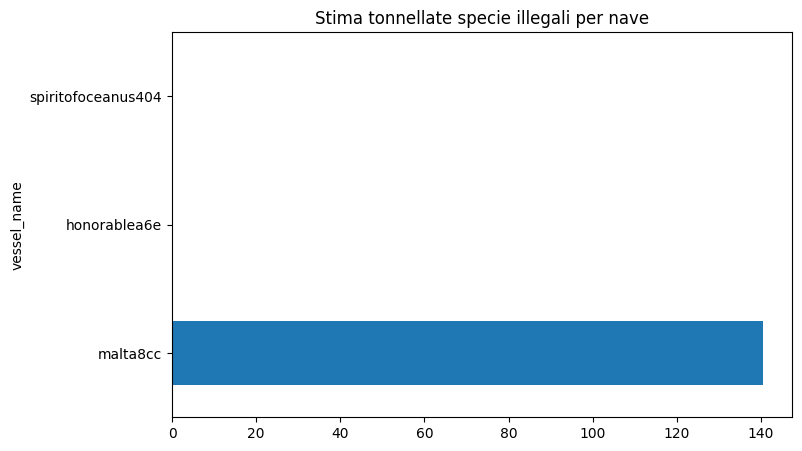

In [254]:
illegal_summary = illegal_catches.groupby("vessel_name")["estimated_tons"].sum().sort_values(ascending=False)

illegal_summary.plot(kind="barh", figsize=(8,5), title="Stima tonnellate specie illegali per nave")
